<center><h1>SEOUL BIKE TRIP DURATION PREDICTION</h1></center>
<center><img src="https://storage.googleapis.com/kaggle-datasets-images/1182717/1978889/22959fc75a57e2249067c80aba6b338c/dataset-cover.jpg?t=2021-02-26-19-04-48" /><center>

<b>Problem Statement: </b>The duration of a trip is the most crucial measure in all modes of transportation. Hence, it is crucial to predict the trip time precisely for the advancement of Intelligent Transport Systems (ITS) and traveler information systems. The prediction can be done using the Seoul Bike data and weather data. We need to use this combination of Seoul Bike data and weather data to do the trip duration prediction.​

## ABOUT DATASET 

- <b>Dataset File Name:</b> `for_modeling.csv`
- <b>Dataset Shape:</b> (9601139, 26)
- <b>Columns in the dataset:</b>
    - Unnamed: 0
    - Duration 
    - Distance
    - PLong
    - PLatd
    - DLong
    - DLatd
    - Haversine
    - Pmonth
    - Pday
    - Phour
    - Pmin
    - PDweek
    - Dmonth
    - Dday
    - Dhour
    - Dmin
    - DDweek
    - Temp
    - Precip
    - Wind
    - Humid
    - Solar
    - Snow
    - GroundTemp
    - Dust

### Importing required libraries

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import warnings

np.random.seed(24)
random.seed(24)
warnings.filterwarnings("ignore")

### Importing the dataset

In [ ]:
# Reading csv using pandas
seoul_df = pd.read_csv("For_modeling.csv")

In [ ]:
# checking the shape of the data
seoul_df.shape

(9601139, 26)

In [ ]:
# sample 100000 rows of data
df_sample = seoul_df.sample(n = 100000).reset_index().drop(columns = ['index'])

In [ ]:
# check the shape
df_sample.shape

(100000, 26)

In [ ]:
# check the top 5 rows
df_sample.head()

Unnamed: 0  Duration  Distance      PLong       PLatd      DLong  \
0     6176536        19      3720  37.613956  127.030251  37.638706   
1     8576807        16      2970  37.586388  126.935127  37.564541   
2     8714908         5       980  37.464550  126.883728  37.456841   
3     4599459         6       980  37.546307  127.049805  37.539654   
4     4460101        59      8880  37.556610  126.898018  37.556610   

        DLatd  Haversine  Pmonth  Pday  ...  Dmin  DDweek  Temp  Precip  Wind  \
0  127.015907   3.028153       9    13  ...    15       3  20.9     0.0   1.7   
1  126.927071   2.530896      11     5  ...     2       0  16.8     0.0   1.1   
2  126.888344   0.949100      11    10  ...    56       5   9.3     0.0   0.3   
3  127.052589   0.779438       8     1  ...    23       2  36.8     0.0   1.3   
4  126.898018   0.000000       7    27  ...    16       4  30.3     0.0   1.1   

   Humid  Solar  Snow  GroundTemp  Dust  
0   68.0   0.00   0.0        20.0  27.0  
1   46.0   1.71   0.0        23.2  58.0  
2   85.0   0.07   0.0         8.7  83.0  
3   39.0   2.80   0.0        54.9  37.0  
4   75.0   0.00   0.0        30.2  28.0  

[5 rows x 26 columns]

## Exploring the Data

In [ ]:
# Identifying the number of features or columns
df_sample.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

In [ ]:
# Dropping irrelevant column from the dataset i.e Unnamed: 0
df_sample.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
# Check which columns are having categorical, numerical or boolean values
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Duration    100000 non-null  int64  
 1   Distance    100000 non-null  int64  
 2   PLong       100000 non-null  float64
 3   PLatd       100000 non-null  float64
 4   DLong       100000 non-null  float64
 5   DLatd       100000 non-null  float64
 6   Haversine   100000 non-null  float64
 7   Pmonth      100000 non-null  int64  
 8   Pday        100000 non-null  int64  
 9   Phour       100000 non-null  int64  
 10  Pmin        100000 non-null  int64  
 11  PDweek      100000 non-null  int64  
 12  Dmonth      100000 non-null  int64  
 13  Dday        100000 non-null  int64  
 14  Dhour       100000 non-null  int64  
 15  Dmin        100000 non-null  int64  
 16  DDweek      100000 non-null  int64  
 17  Temp        100000 non-null  float64
 18  Precip      100000 non-null  float64
 19  Win

**After checking the Dtypes of all the columns**

**object - String values**

**float64 - Numerical values**

**Observation: There are no String values so there are no categorical data**

In [ ]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns 
df_sample.describe()

Duration       Distance          PLong          PLatd  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       25.812430    3727.548850      37.547560     126.990630   
std        25.034026    3967.620715       0.044456       0.082405   
min         1.000000       1.000000      37.437271     126.798599   
25%         8.000000    1230.000000      37.514240     126.920128   
50%        16.000000    2280.000000      37.546631     126.994263   
75%        36.000000    4660.000000      37.573242     127.061310   
max       119.000000   33060.000000      37.689720     127.180267   

               DLong          DLatd      Haversine         Pmonth  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       37.547776     126.990565       1.871322       7.576100   
std         0.044534       0.083138       1.993941       2.699422   
min        37.437271     126.798599       0.000000       1.000000   
25%        37.514240     126.919579       0.675867       6.000000   
50%        37.546631     126.994263       1.257811       8.000000   
75%        37.573277     127.062424       2.363247      10.000000   
max        37.689720     127.180267      23.805294      12.000000   

               Pday         Phour  ...          Dmin         DDweek  \
count  100000.00000  100000.00000  ...  100000.00000  100000.000000   
mean       15.76668      14.41262  ...      30.06493       2.945550   
std         8.75548       6.23785  ...      17.34080       1.978844   
min         1.00000       0.00000  ...       0.00000       0.000000   
25%         8.00000      10.00000  ...      15.00000       1.000000   
50%        16.00000      16.00000  ...      30.00000       3.000000   
75%        23.00000      19.00000  ...      45.00000       5.000000   
max        31.00000      23.00000  ...      59.00000       6.000000   

                Temp         Precip           Wind          Humid  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       18.576912       0.017616       1.823674      53.906410   
std         9.479924       0.338270       0.973055      17.355501   
min       -17.800000       0.000000       0.000000      10.000000   
25%        12.300000       0.000000       1.100000      41.000000   
50%        20.100000       0.000000       1.700000      53.000000   
75%        25.500000       0.000000       2.400000      67.000000   
max        39.400000      35.000000       7.400000      98.000000   

               Solar           Snow     GroundTemp           Dust  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.731978       0.009703      20.742799      32.597040  
std         0.920194       0.159363      12.629369      24.233386  
min         0.000000       0.000000     -13.600000       0.000000  
25%         0.000000       0.000000      11.600000      16.000000  
50%         0.270000       0.000000      21.100000      27.000000  
75%         1.260000       0.000000      28.500000      43.000000  
max         3.520000       8.800000      62.200000     304.000000  

[8 rows x 25 columns]

In [ ]:
# check length of dataset
len(df_sample)

100000

In [ ]:
# check for unique values in dataset
for x in df_sample.columns:
    print(x, ':', len(df_sample[x].unique()))

Duration : 119
Distance : 2563
PLong : 1468
PLatd : 1474
DLong : 1455
DLatd : 1462
Haversine : 35777
Pmonth : 12
Pday : 31
Phour : 24
Pmin : 60
PDweek : 7
Dmonth : 12
Dday : 31
Dhour : 24
Dmin : 60
DDweek : 7
Temp : 538
Precip : 42
Wind : 64
Humid : 89
Solar : 345
Snow : 40
GroundTemp : 692
Dust : 162


### Counting the total number of missing value

In [ ]:
df_sample.isnull().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

There is no missing values in this dataset

## Exploratory Data Analysis (EDA)

### CORRELATION MATRIX


Why ?

**A correlation matrix is a table showing correlation coefficients between variables**

There are three broad reasons for computing a correlation matrix:
1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.


In [ ]:
#correlation matrix Using pandas
corr_mat  =  df_sample.corr()
corr_mat.style.background_gradient(cmap = 'coolwarm').set_precision(2)

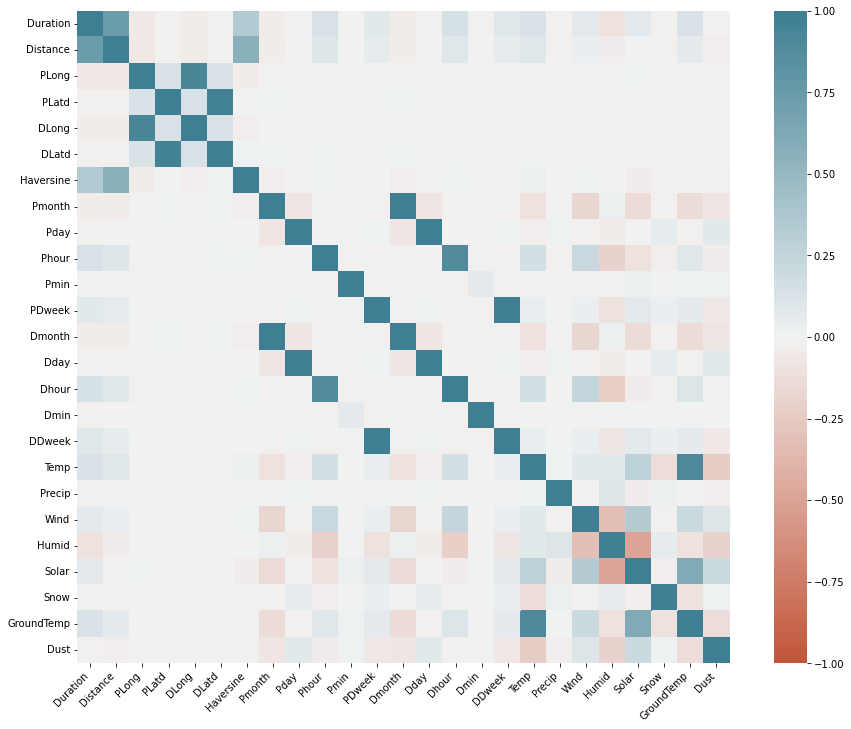

In [ ]:
# correlation matrix Using seaborn
plt.figure(figsize = (16, 12))

ax = sns.heatmap(corr_mat, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n=200), square = True)

ax.set_xticklabels( ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

**Observation from above correlation matrix**
1. distance and duration are strongly related
2. haversine and duration and correlated with each other
3. gound temperature and solar radiation are correlated
4. temperature and solar radiations are correlated
5. phour and dhour are not related to humidity

## SCATTER PLOT

1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.

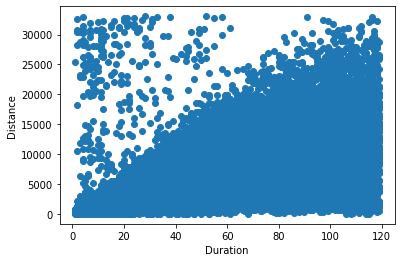

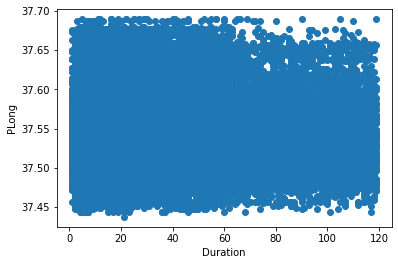

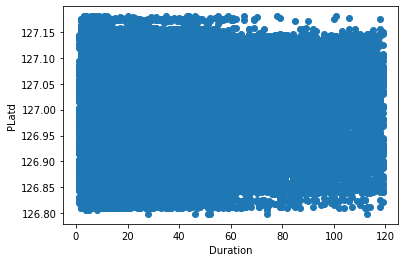

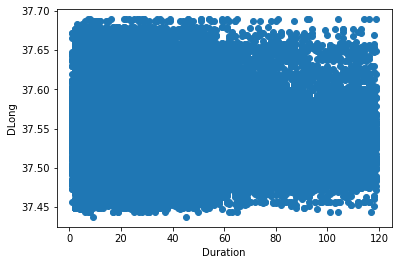

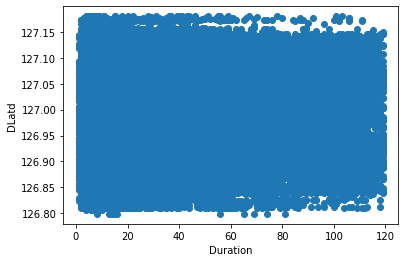

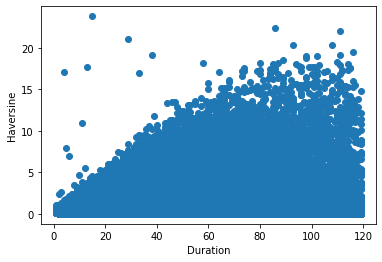

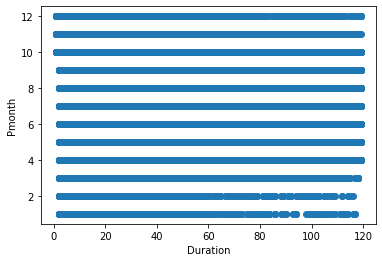

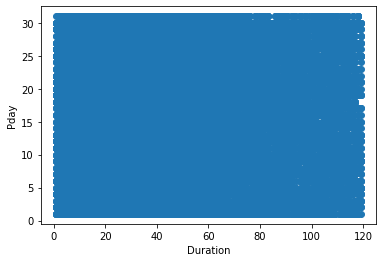

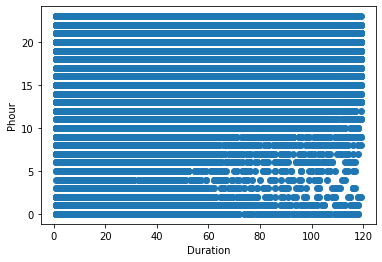

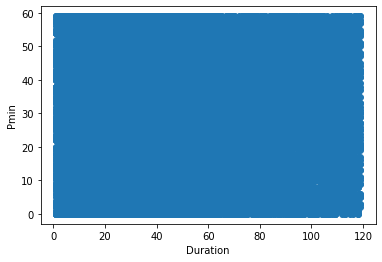

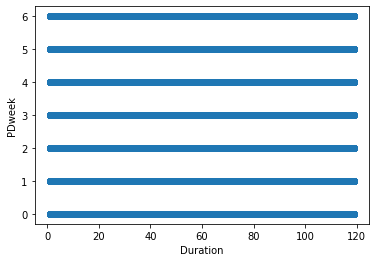

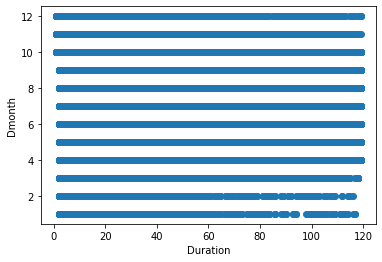

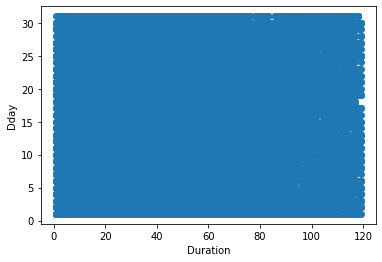

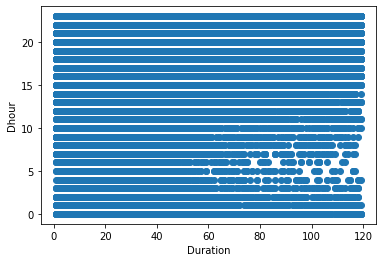

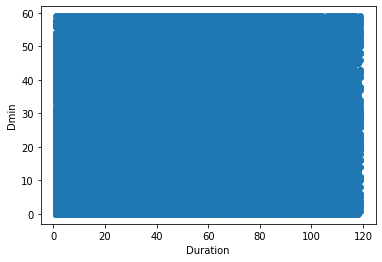

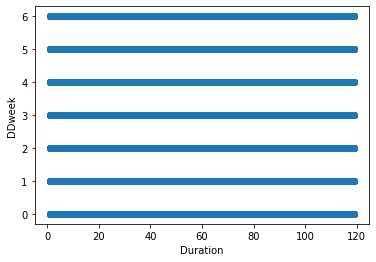

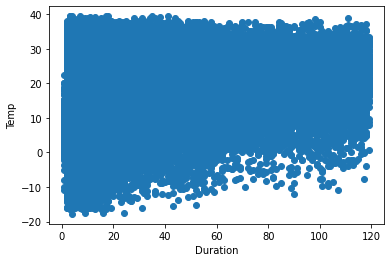

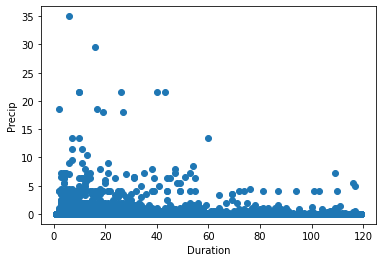

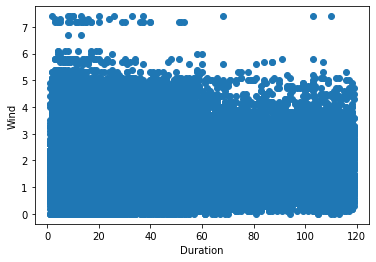

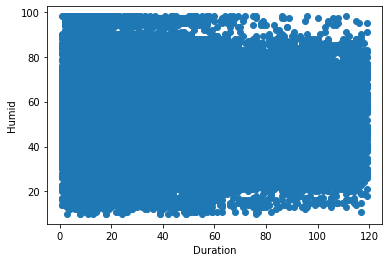

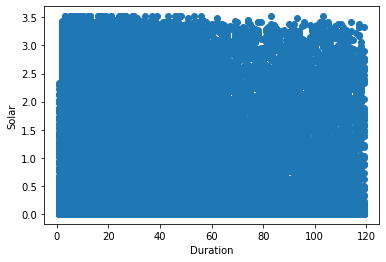

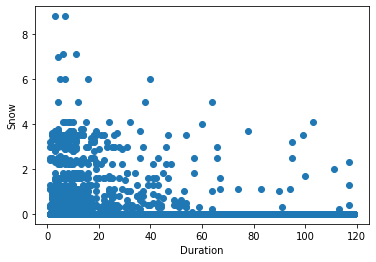

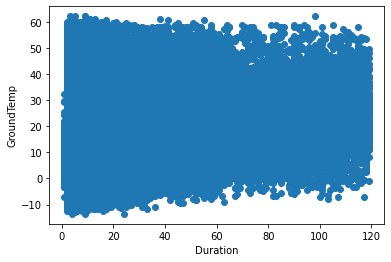

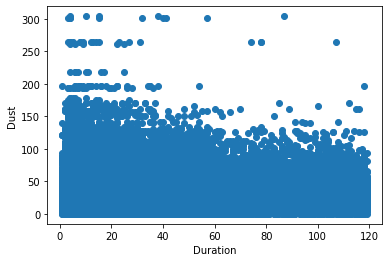

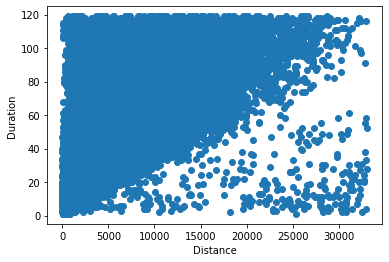

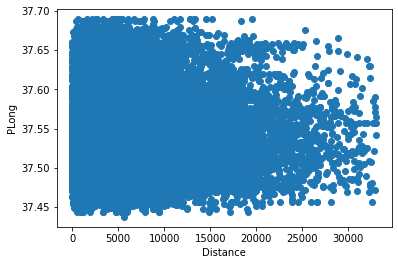

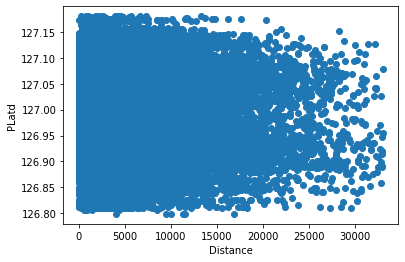

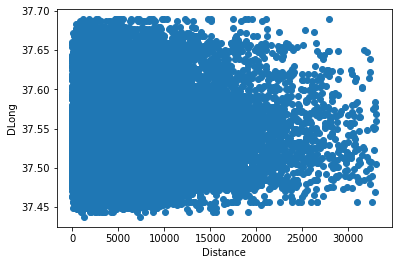

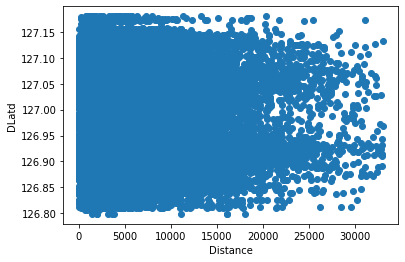

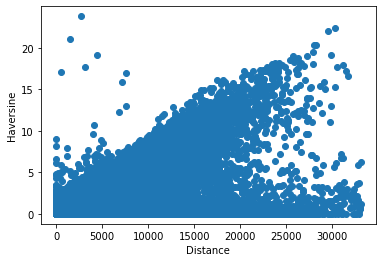

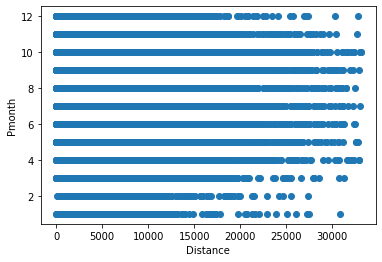

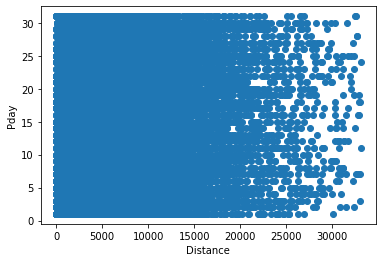

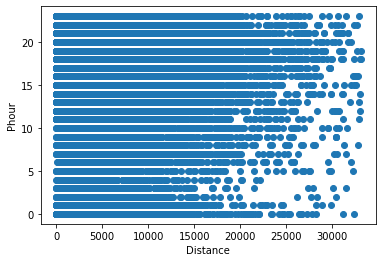

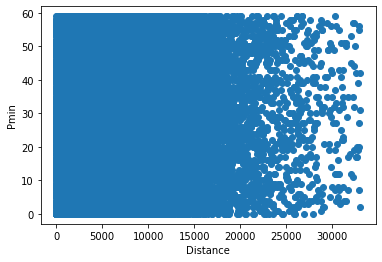

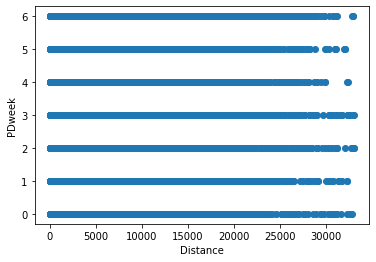

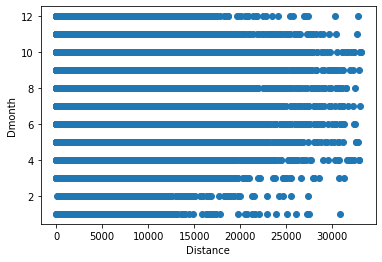

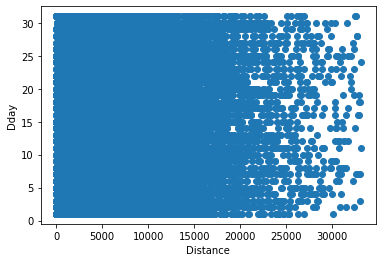

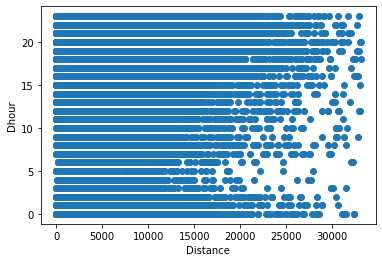

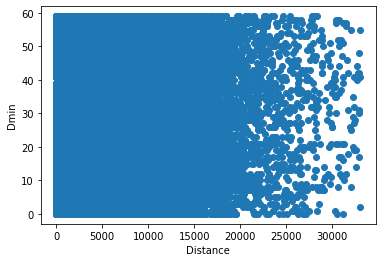

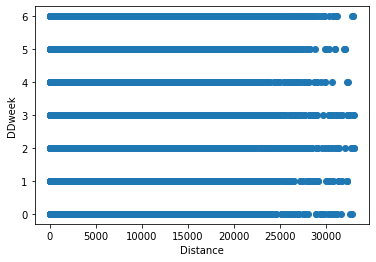

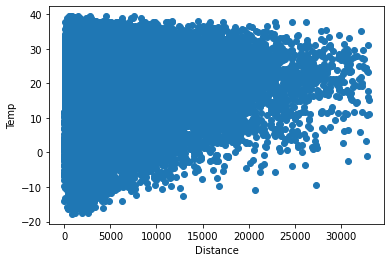

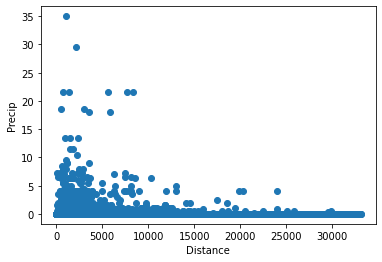

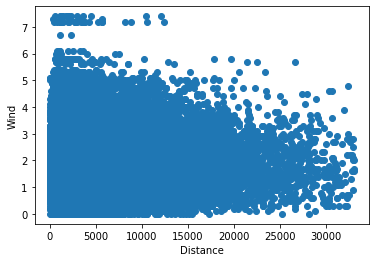

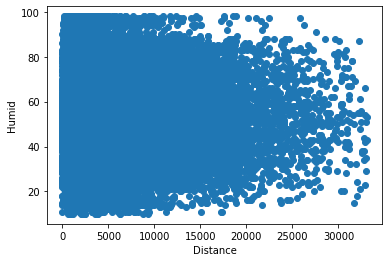

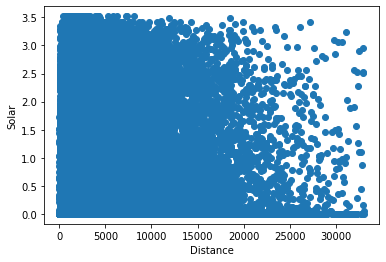

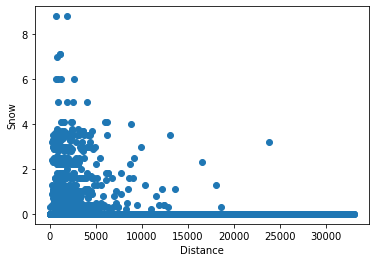

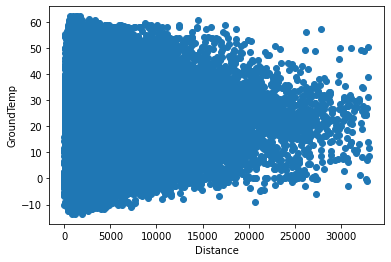

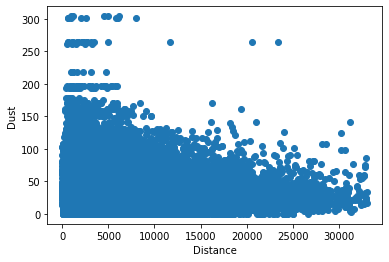

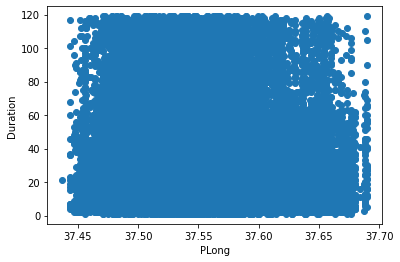

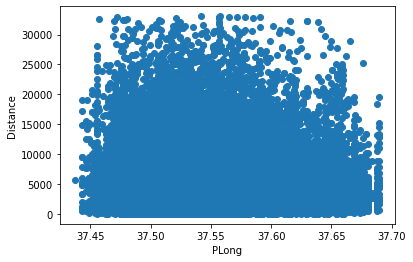

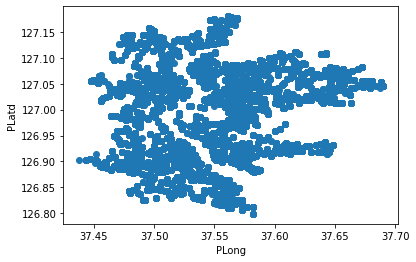

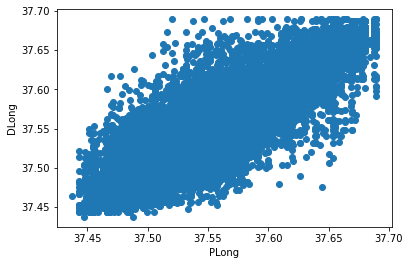

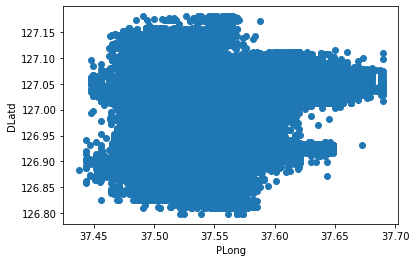

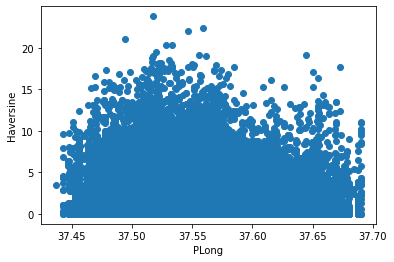

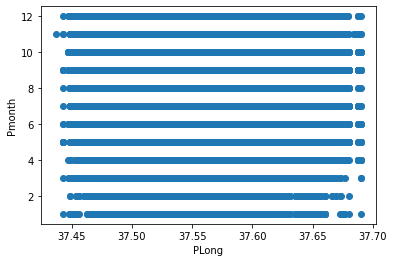

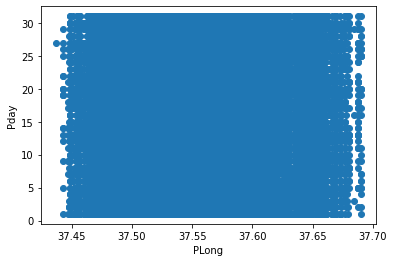

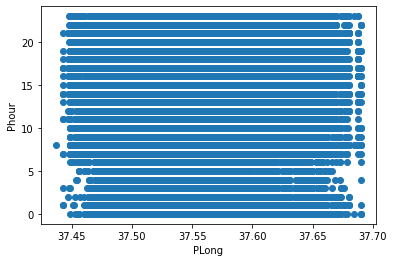

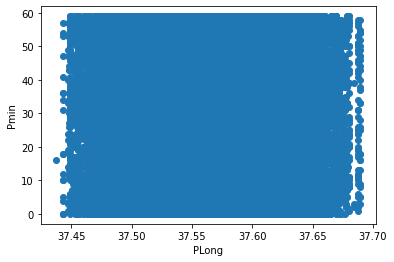

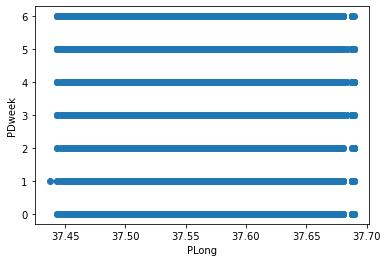

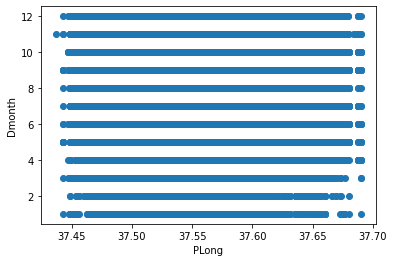

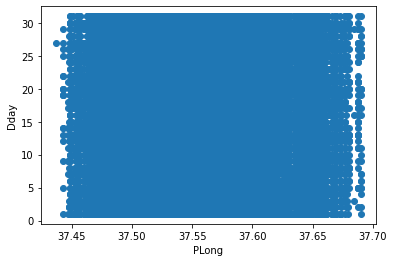

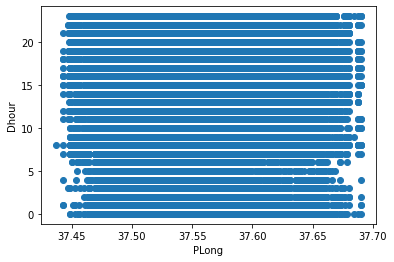

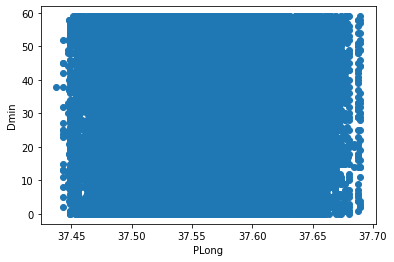

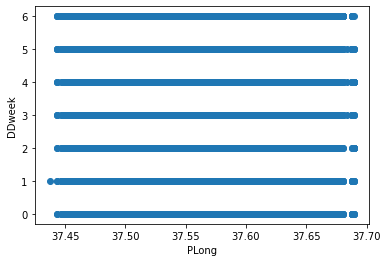

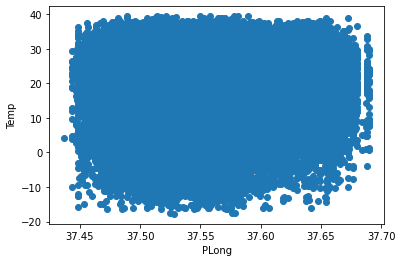

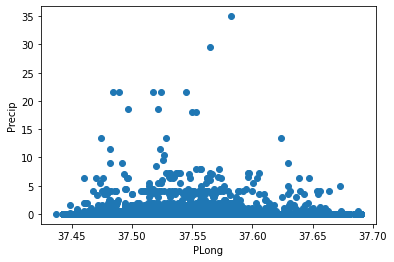

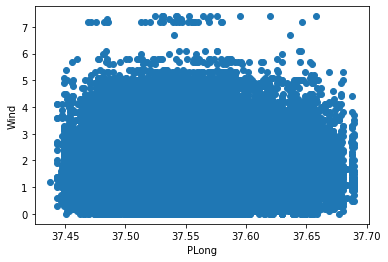

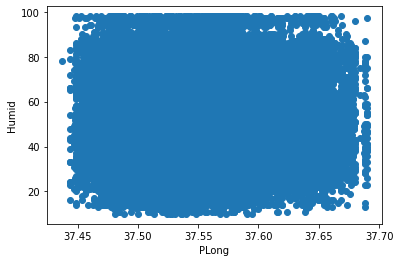

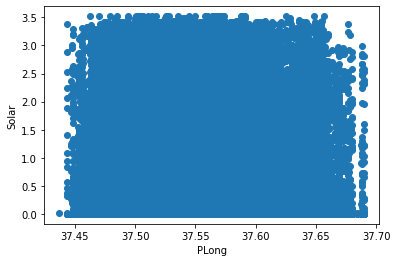

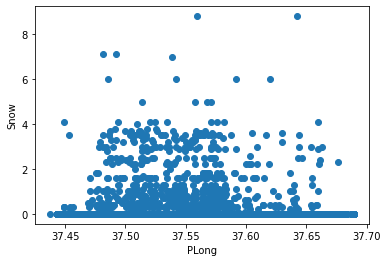

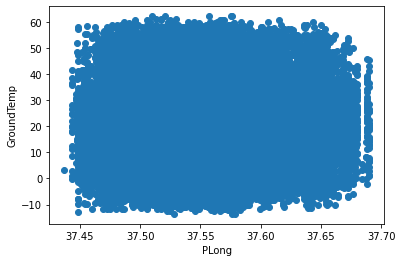

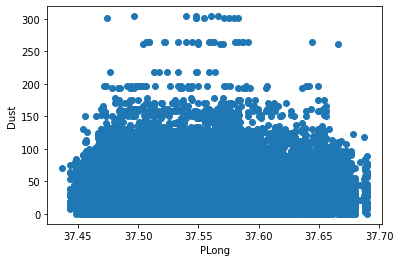

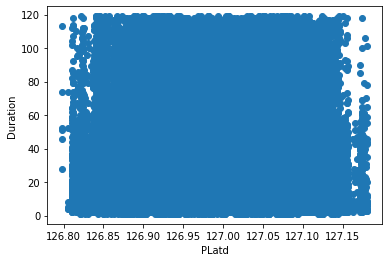

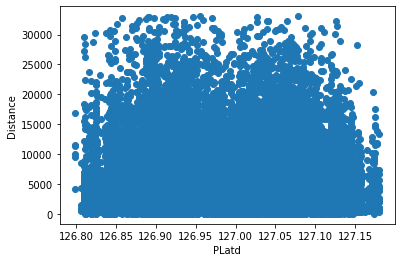

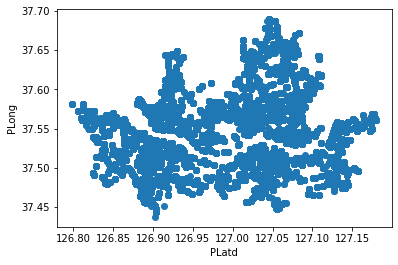

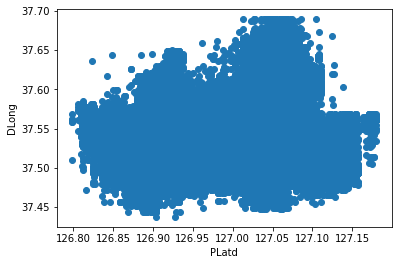

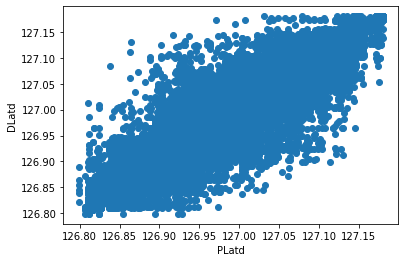

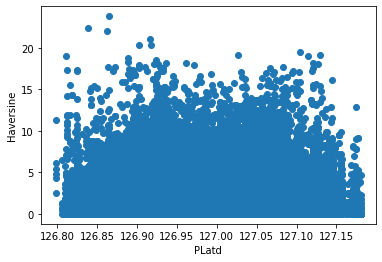

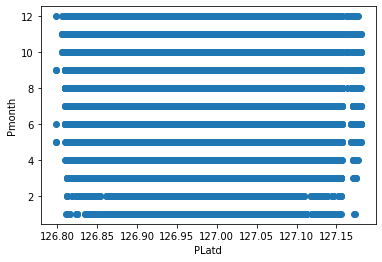

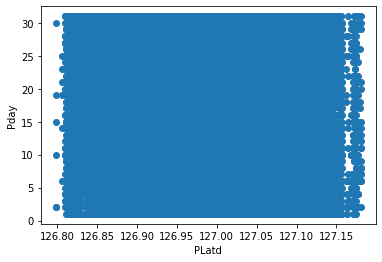

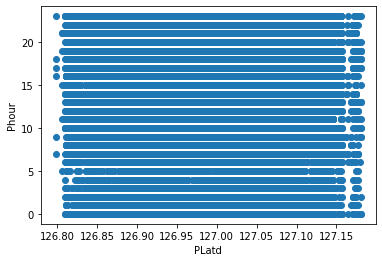

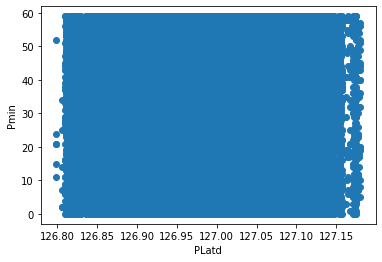

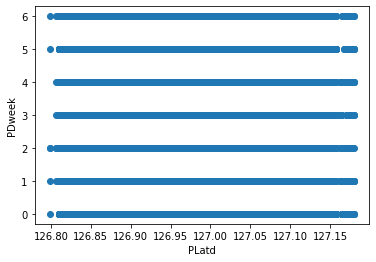

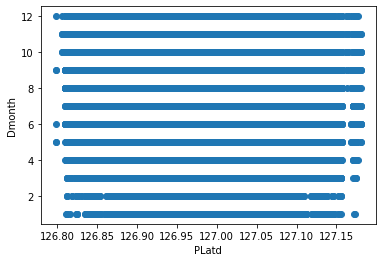

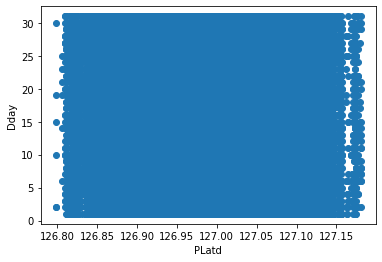

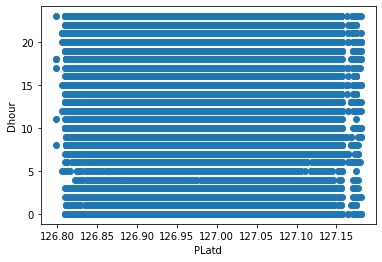

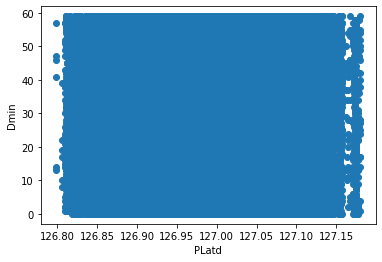

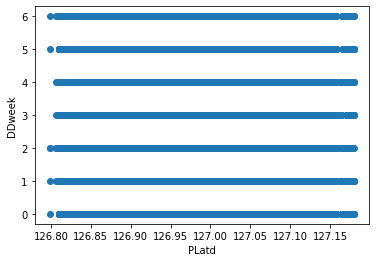

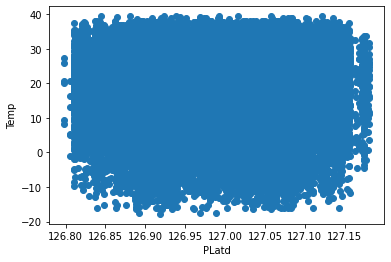

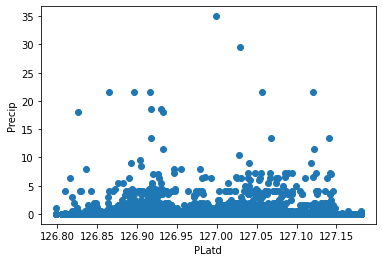

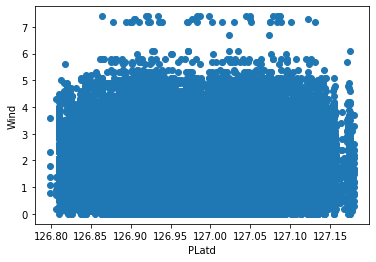

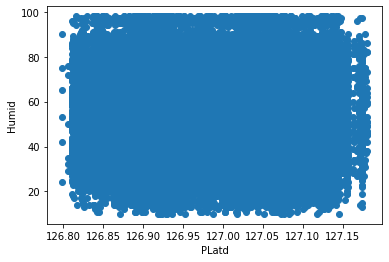

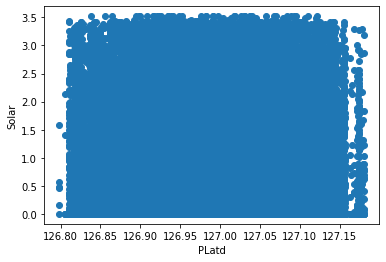

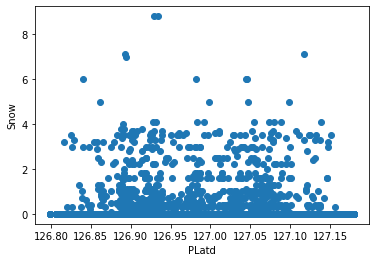

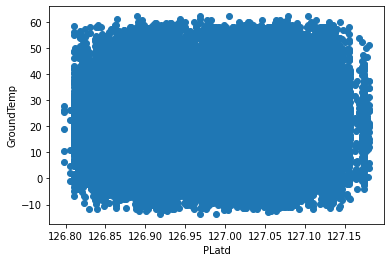

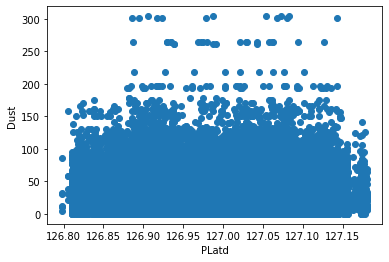

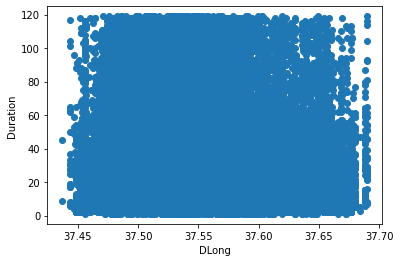

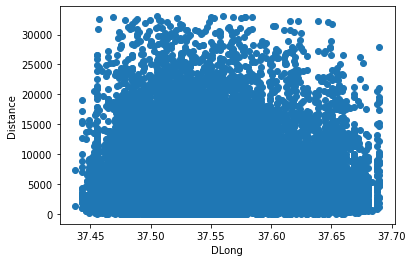

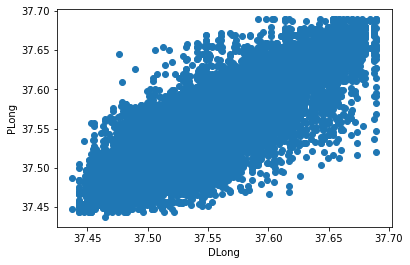

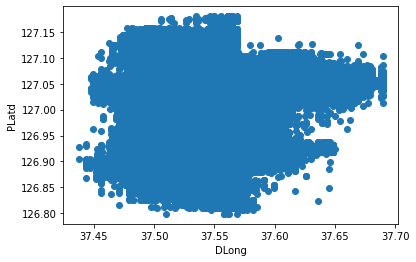

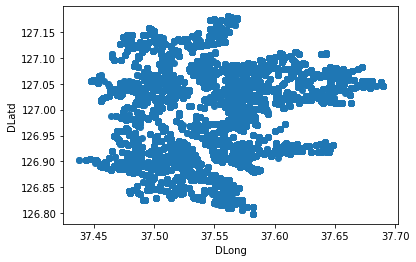

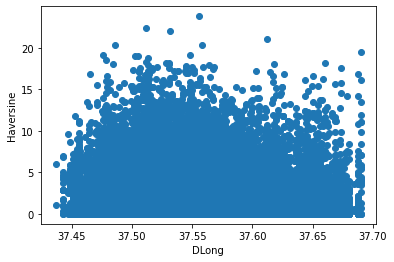

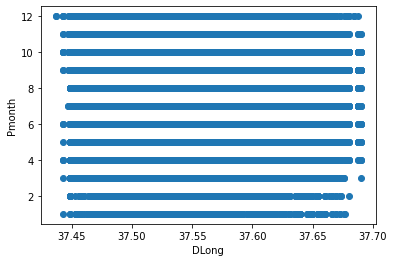

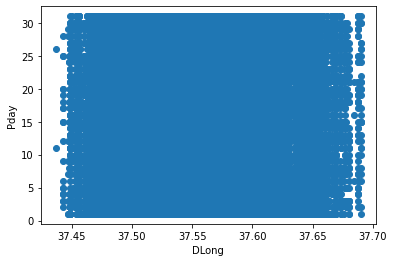

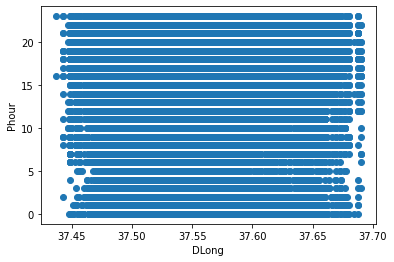

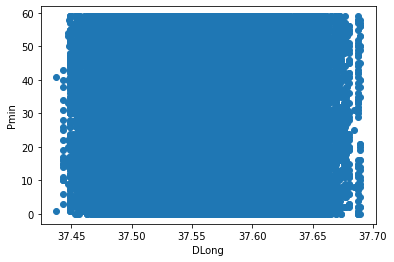

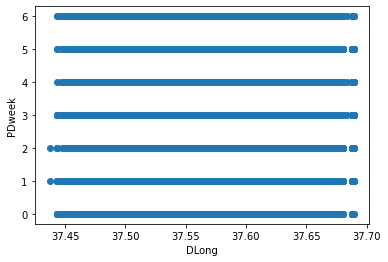

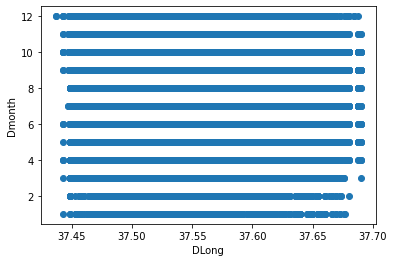

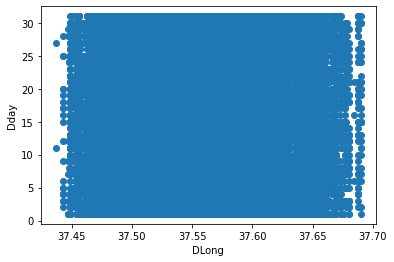

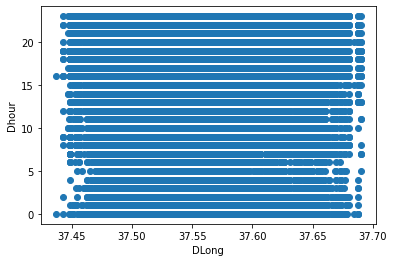

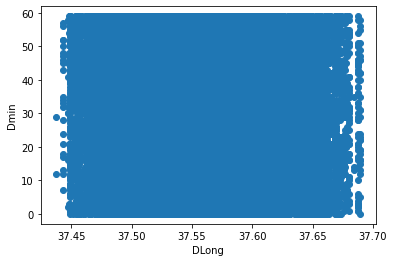

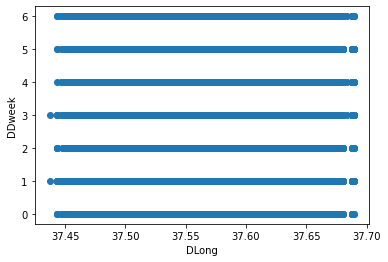

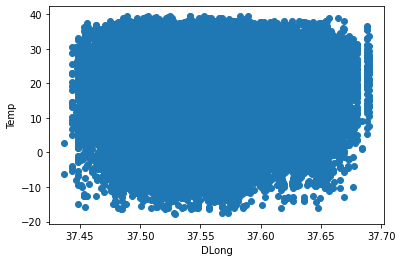

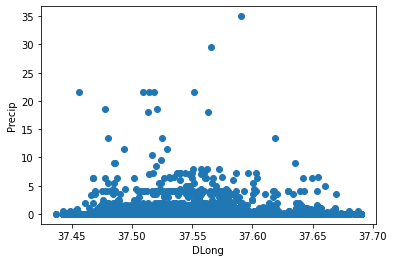

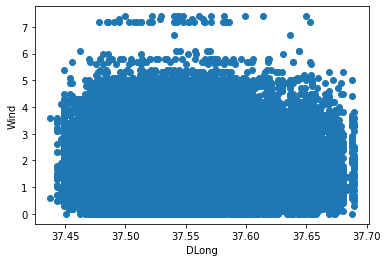

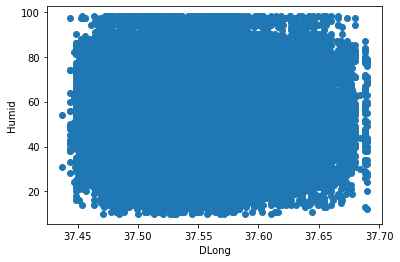

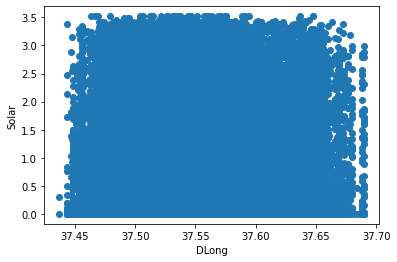

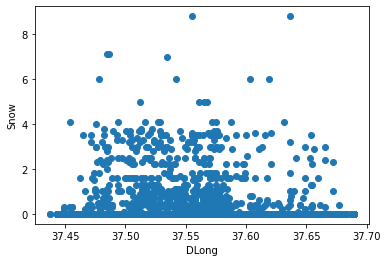

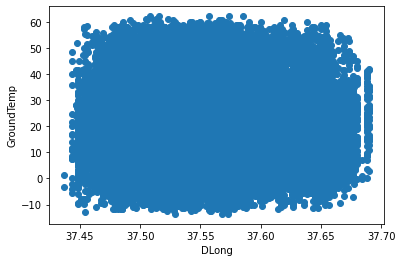

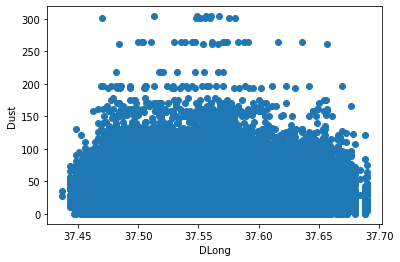

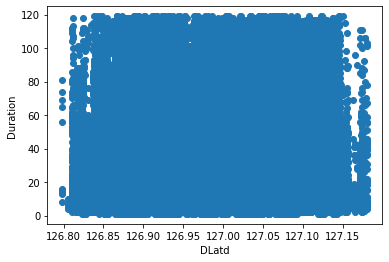

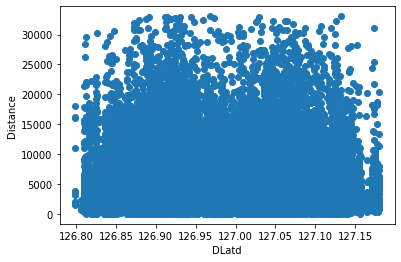

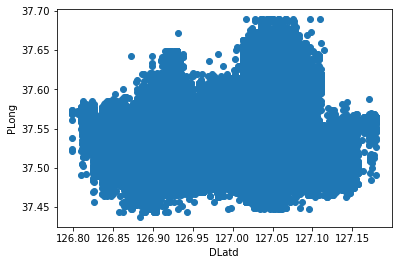

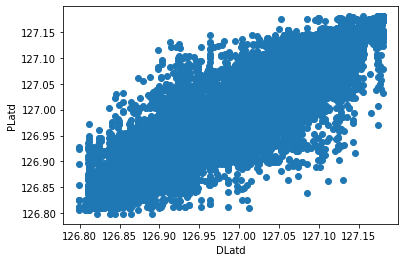

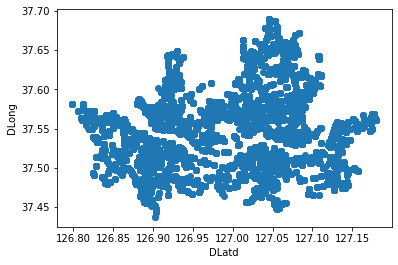

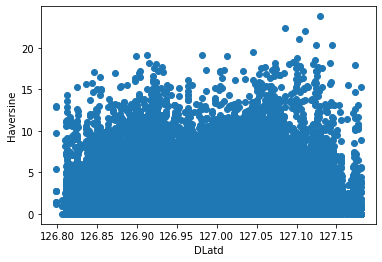

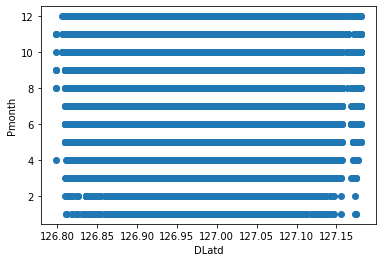

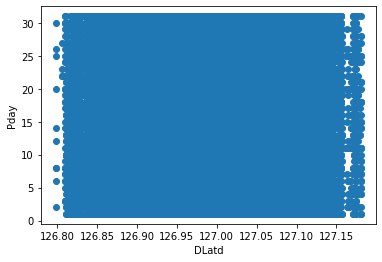

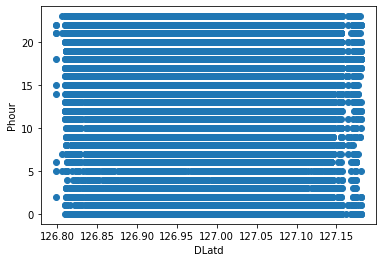

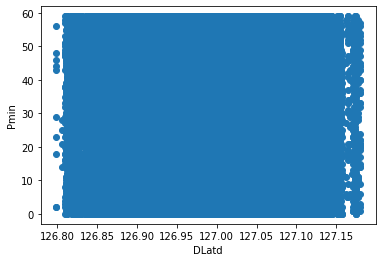

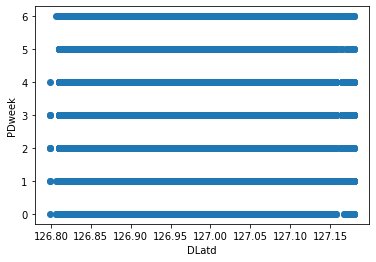

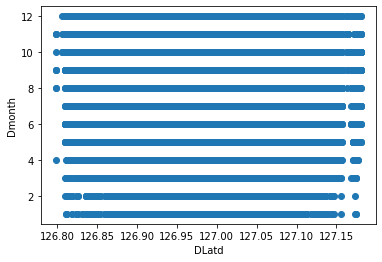

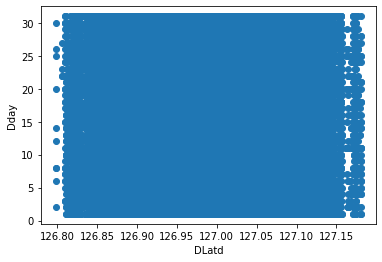

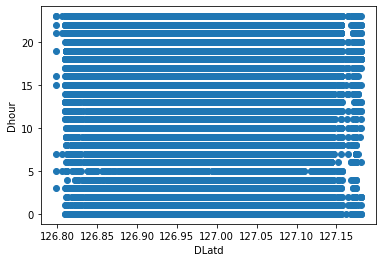

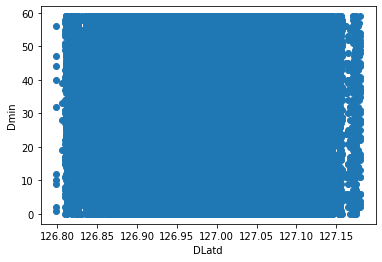

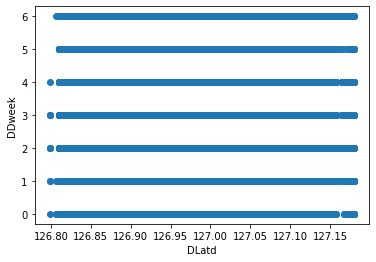

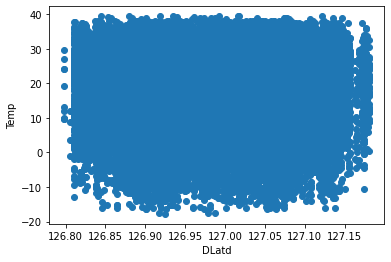

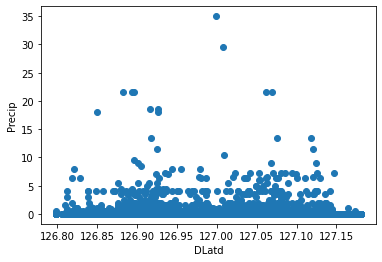

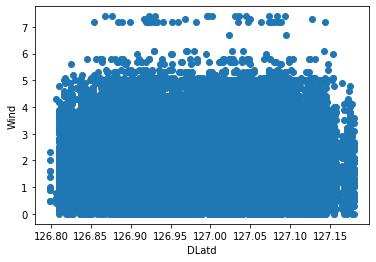

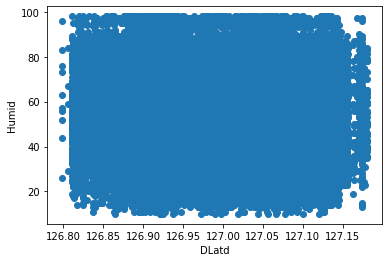

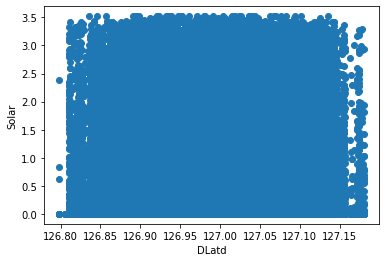

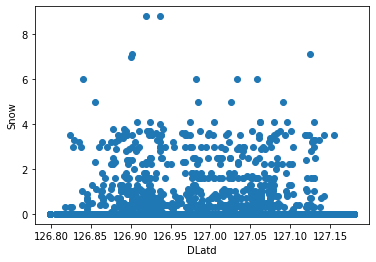

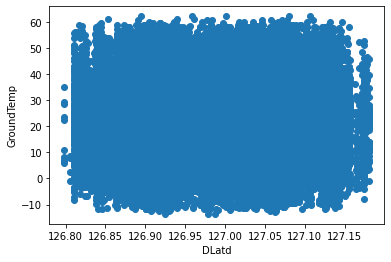

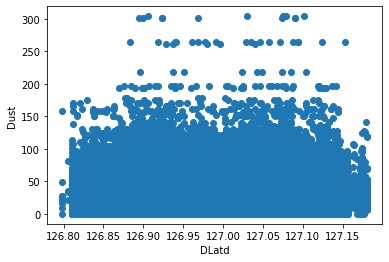

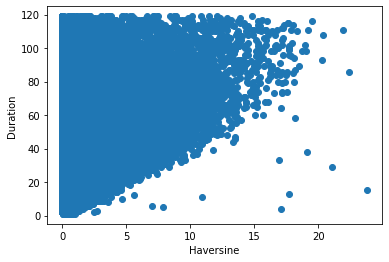

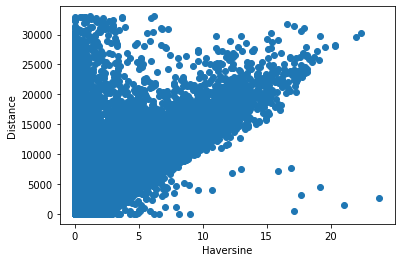

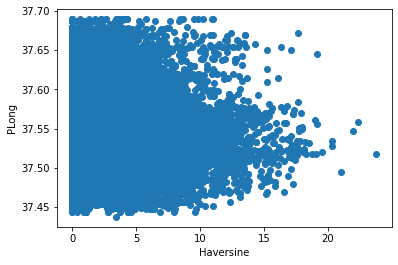

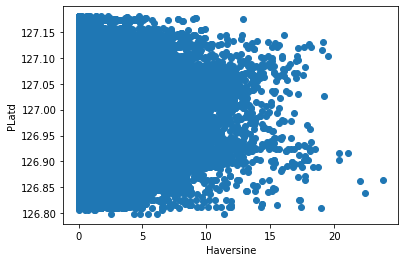

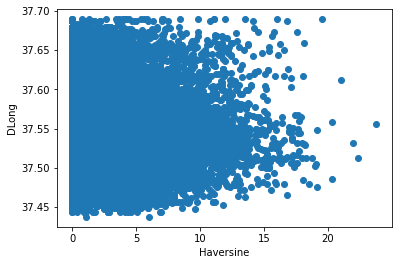

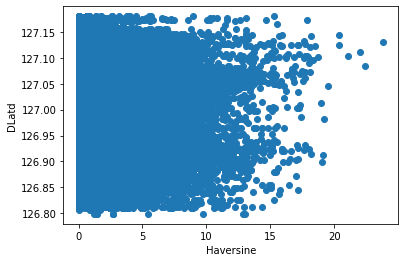

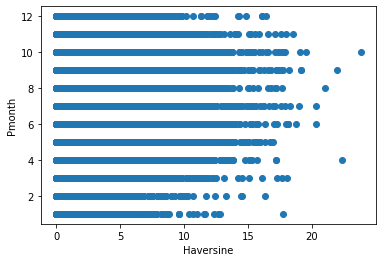

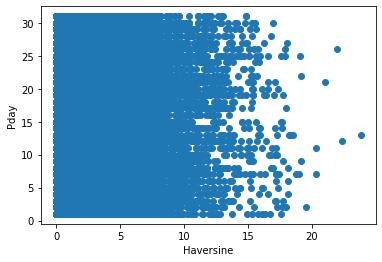

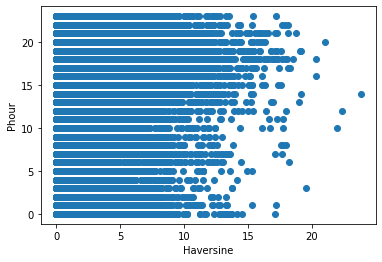

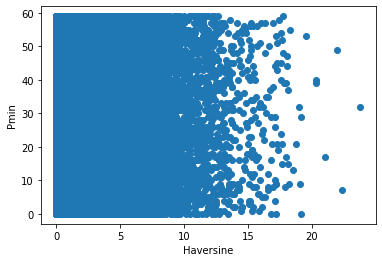

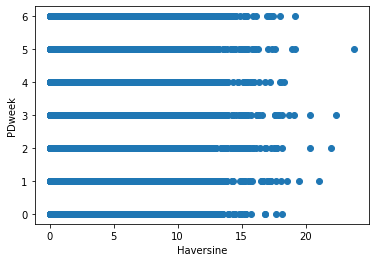

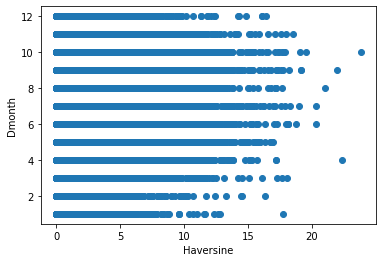

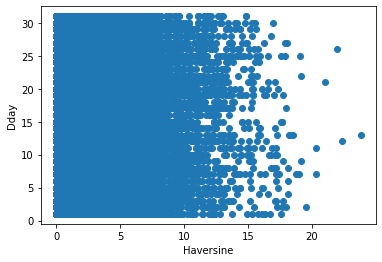

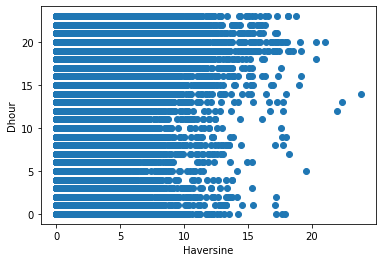

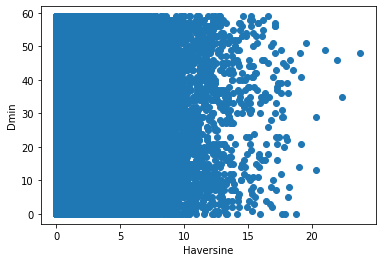

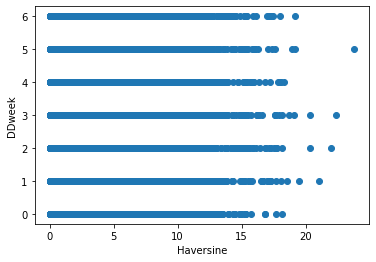

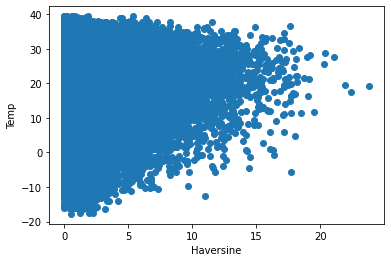

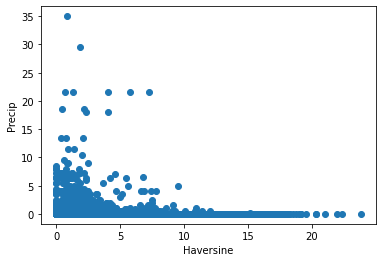

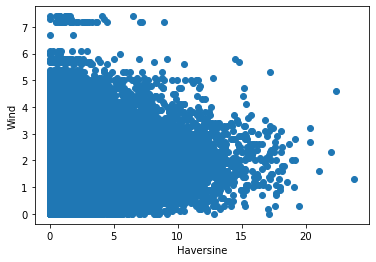

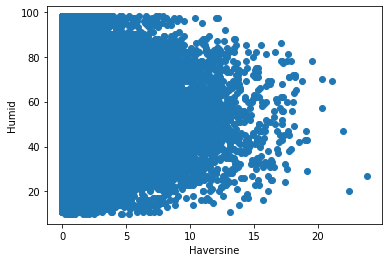

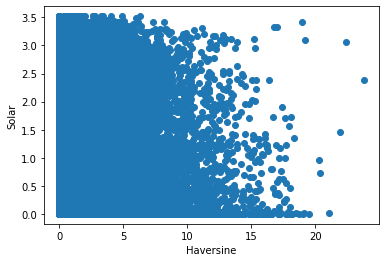

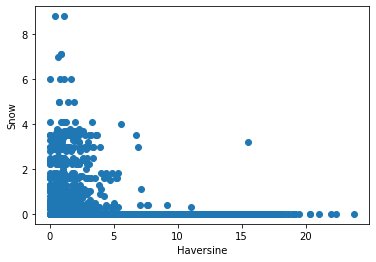

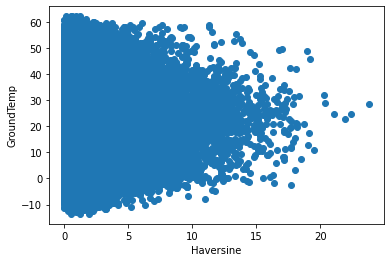

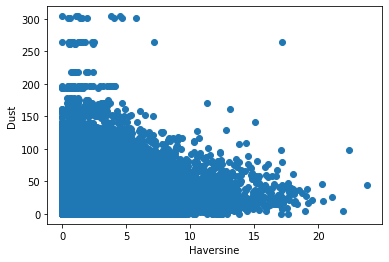

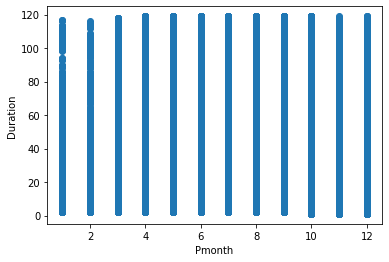

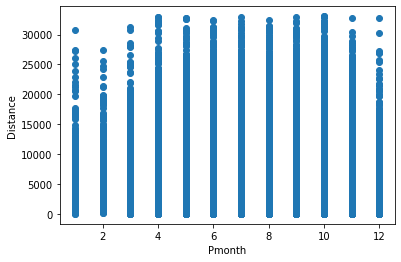

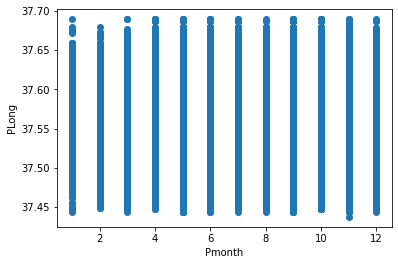

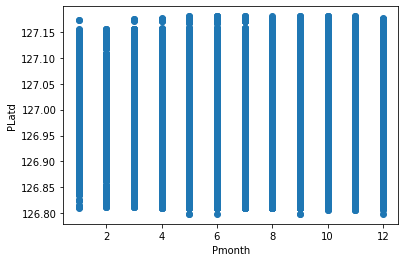

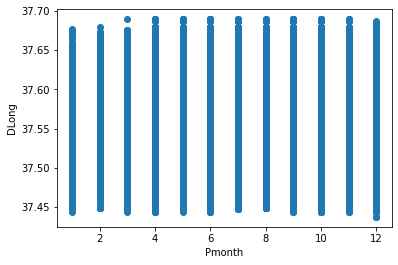

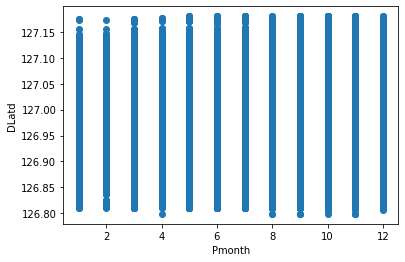

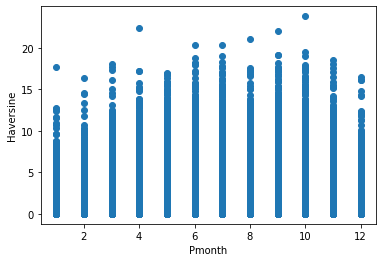

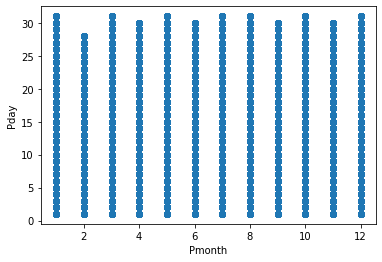

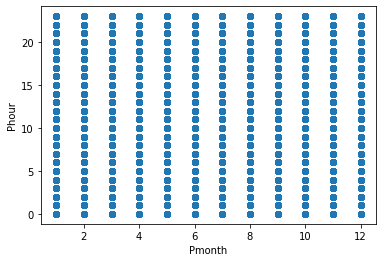

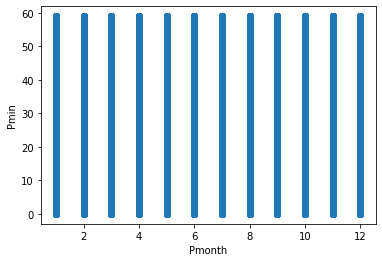

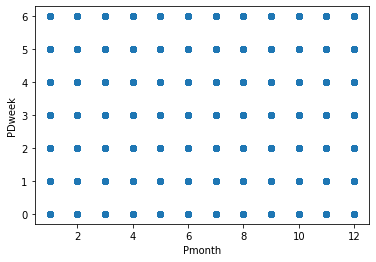

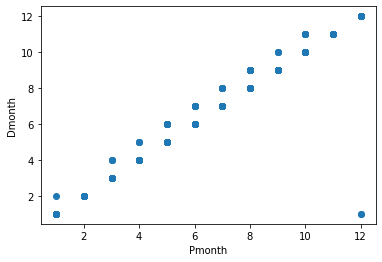

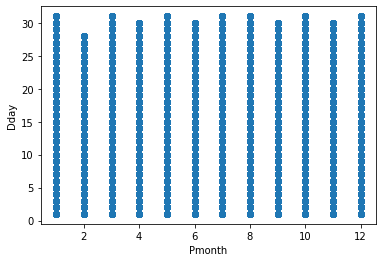

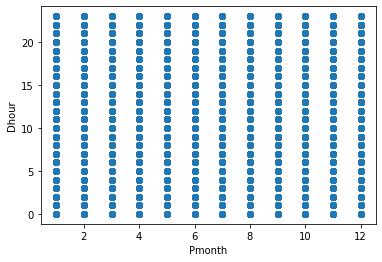

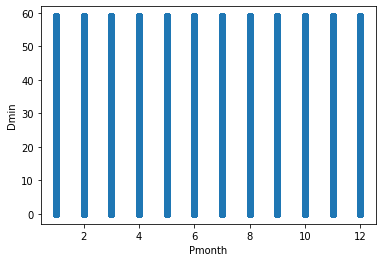

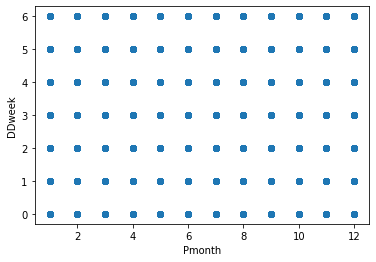

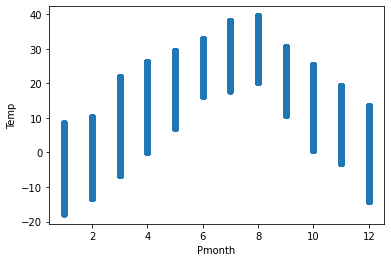

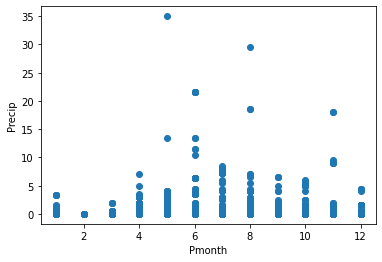

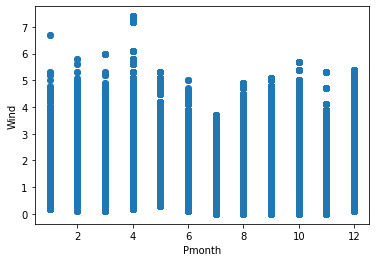

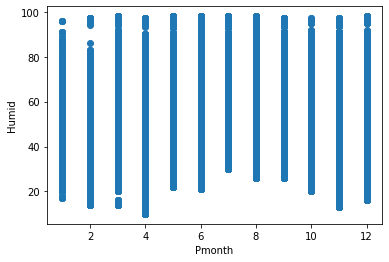

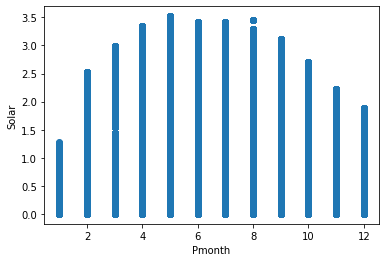

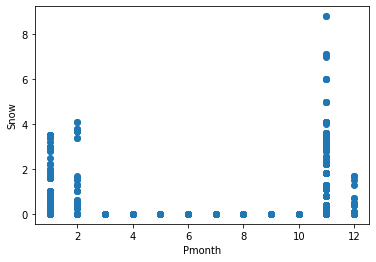

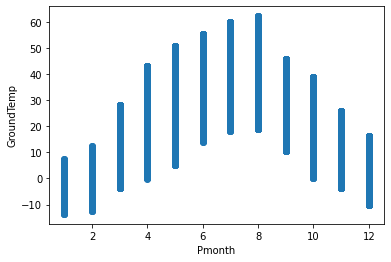

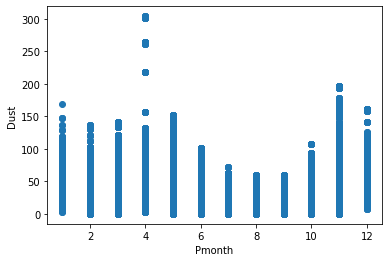

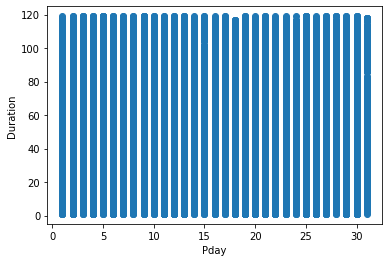

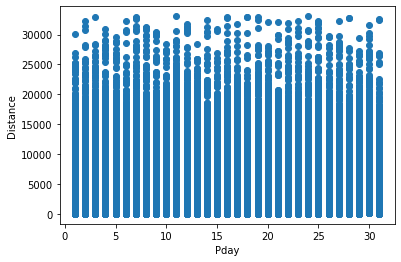

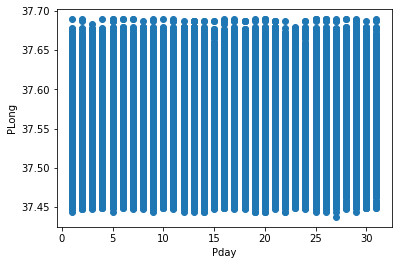

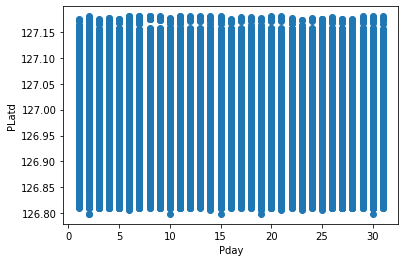

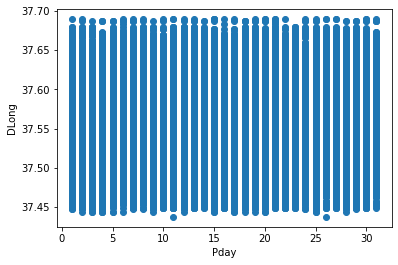

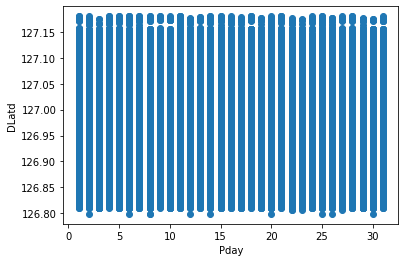

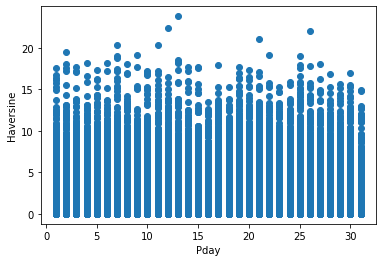

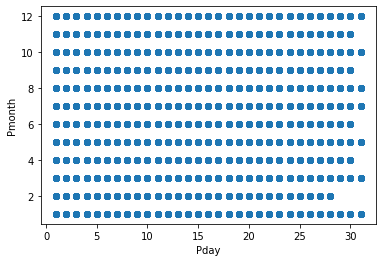

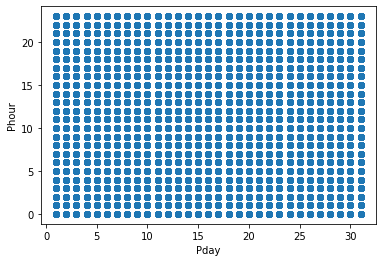

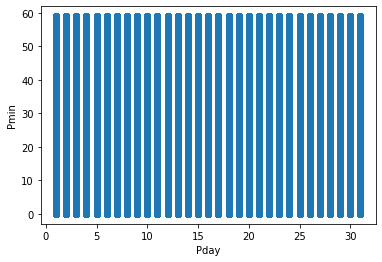

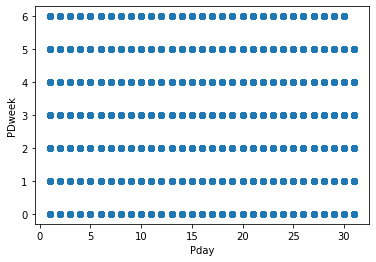

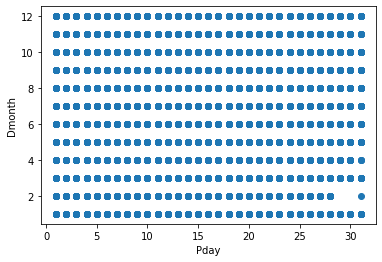

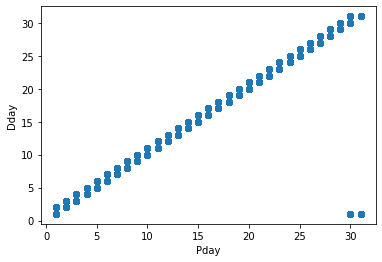

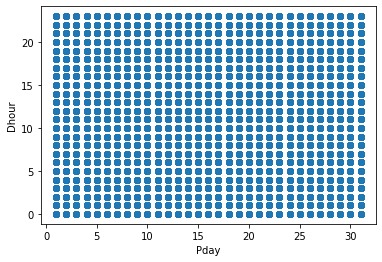

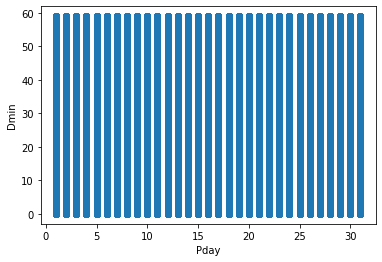

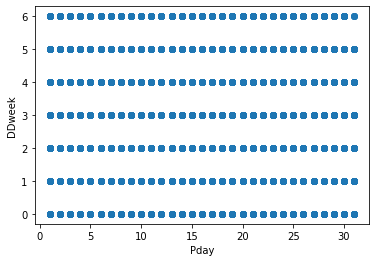

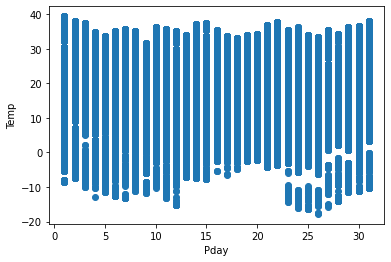

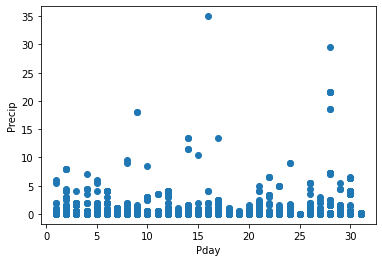

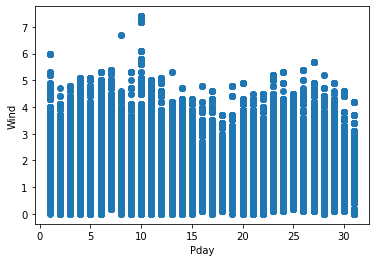

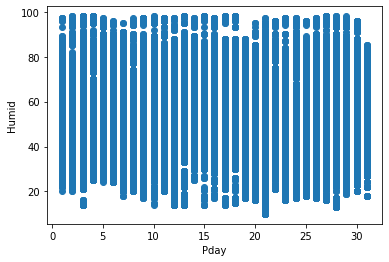

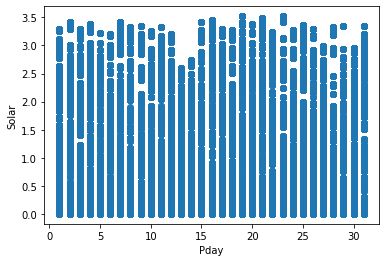

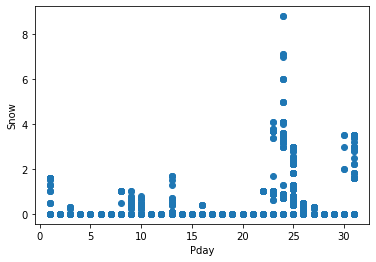

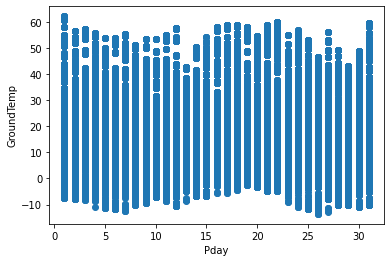

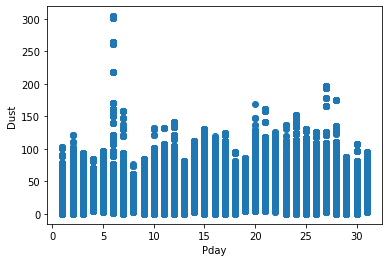

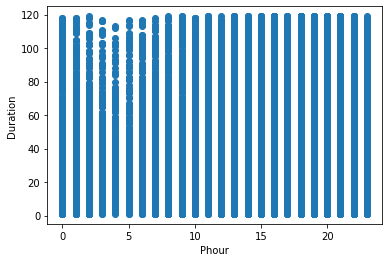

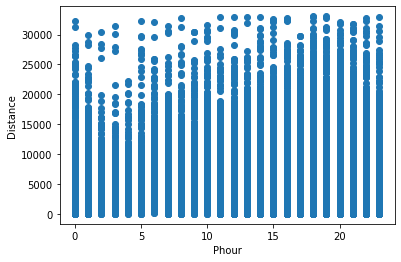

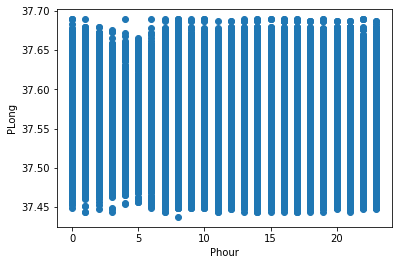

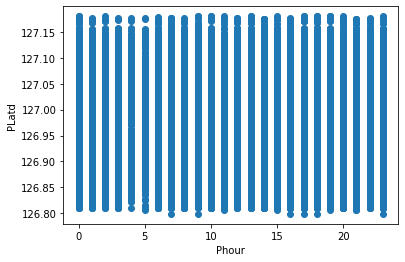

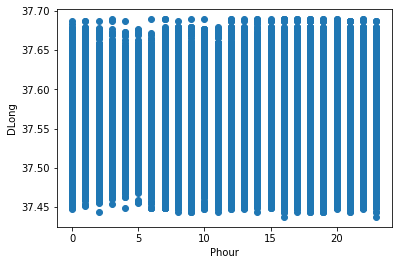

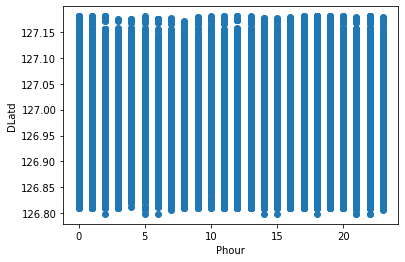

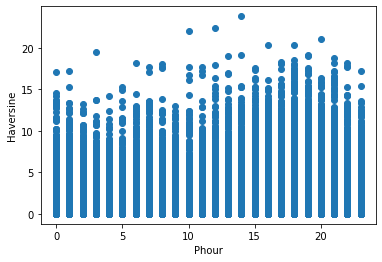

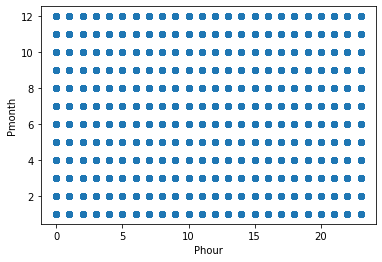

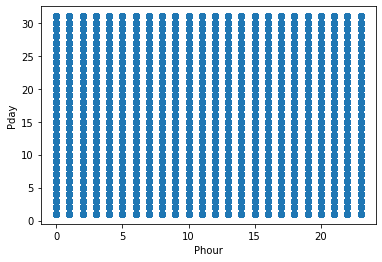

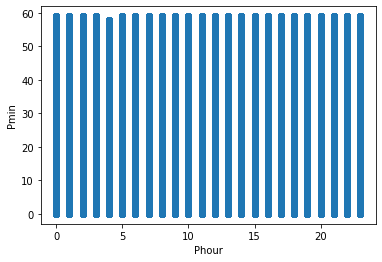

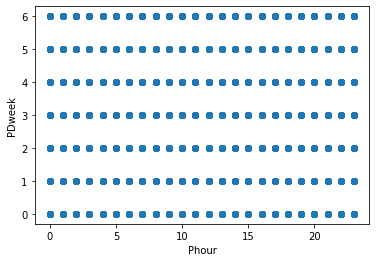

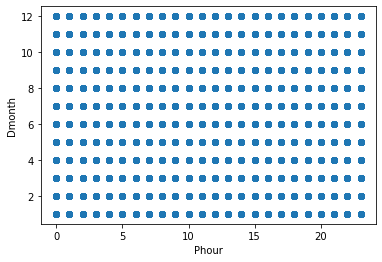

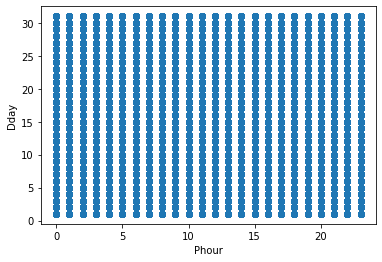

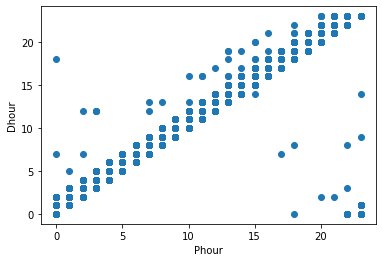

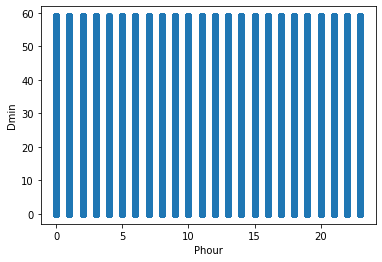

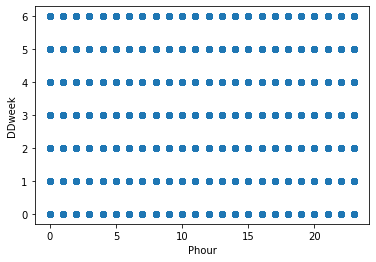

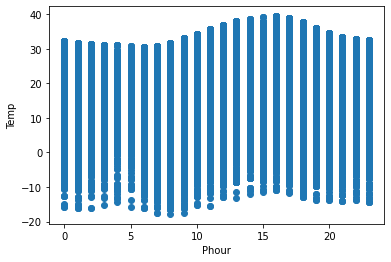

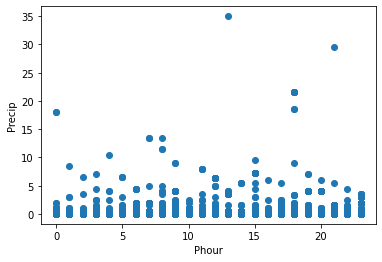

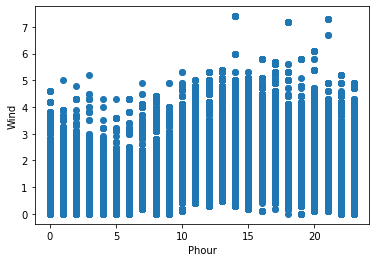

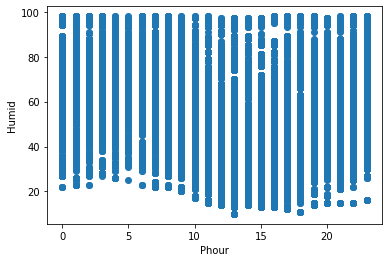

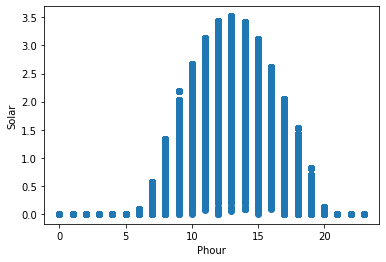

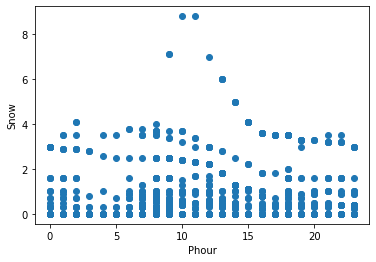

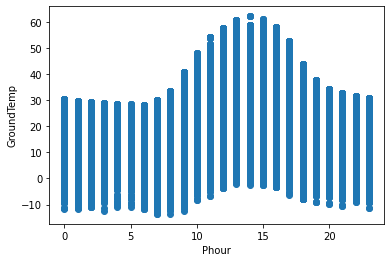

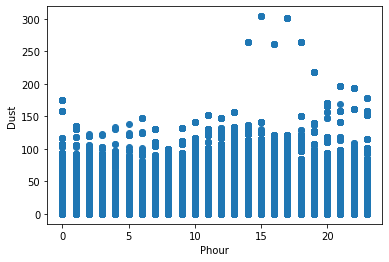

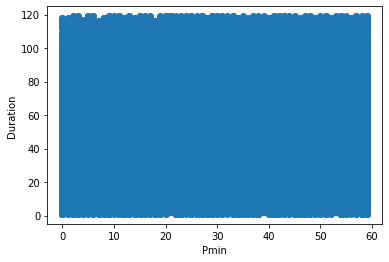

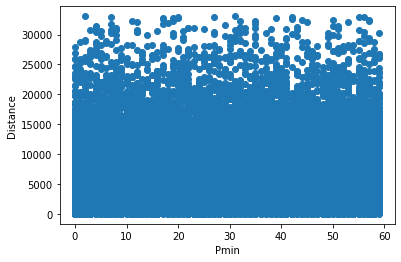

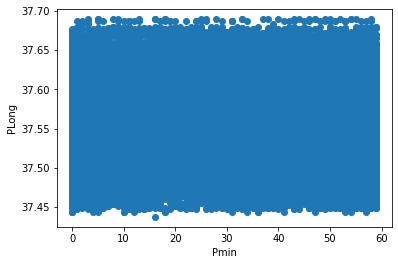

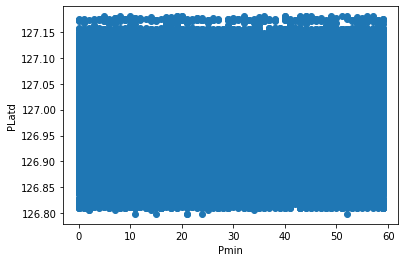

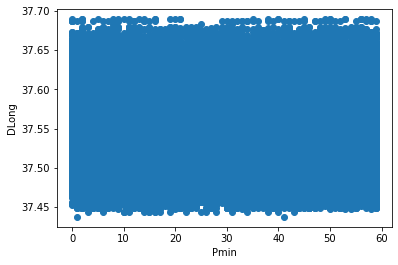

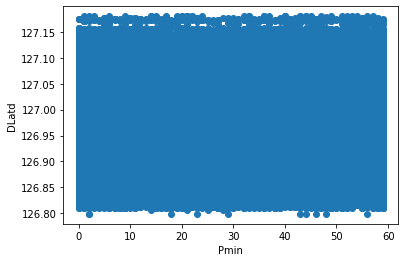

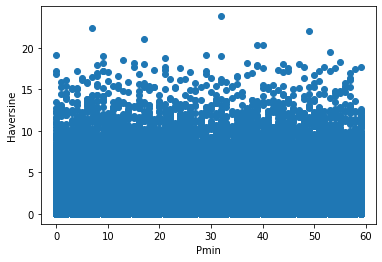

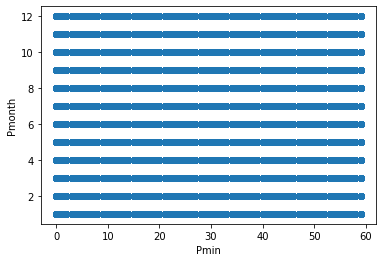

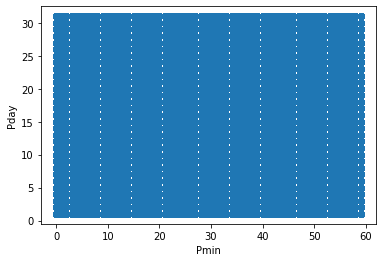

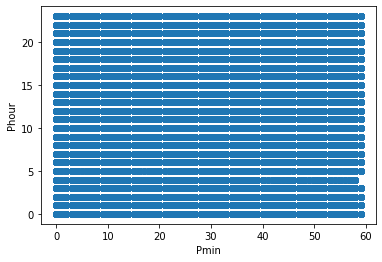

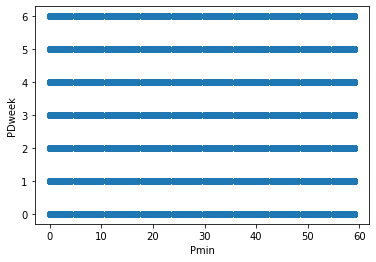

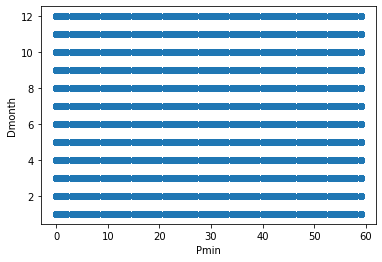

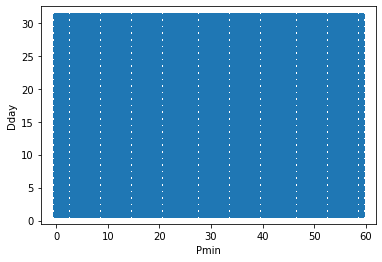

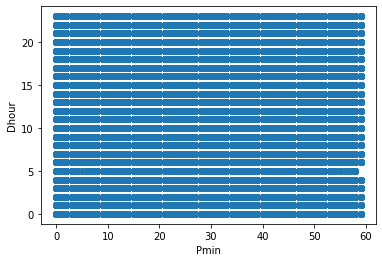

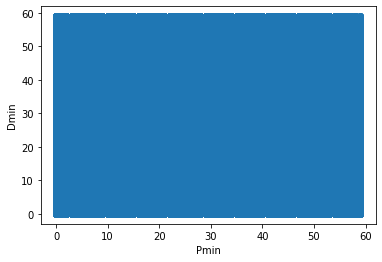

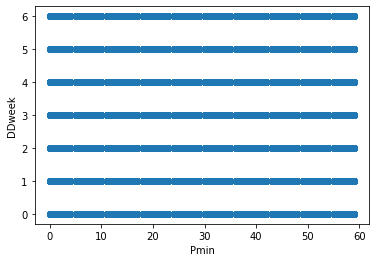

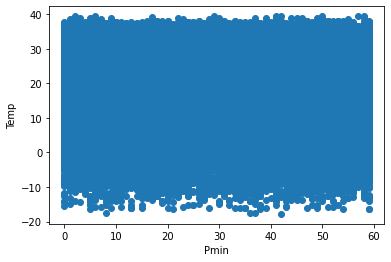

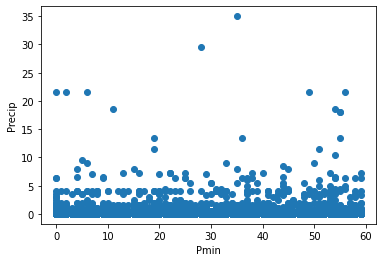

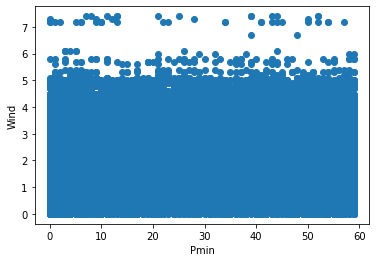

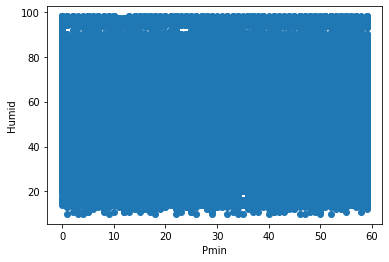

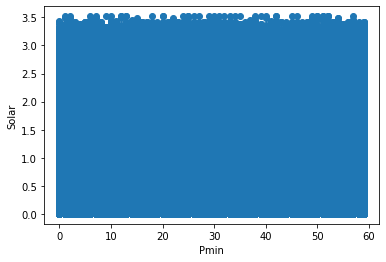

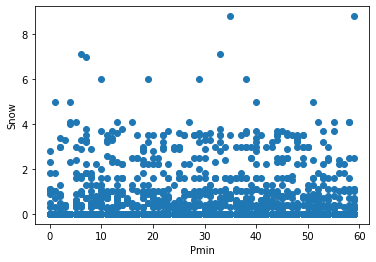

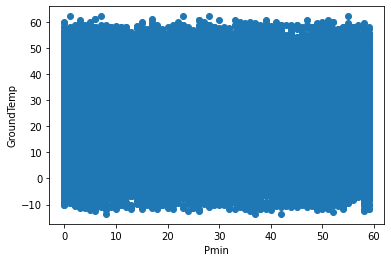

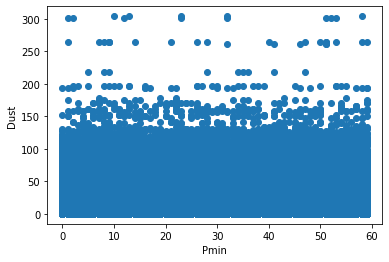

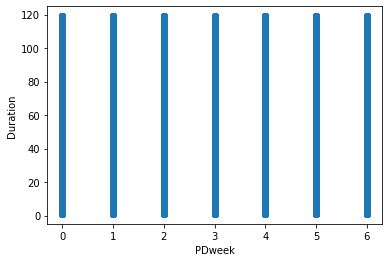

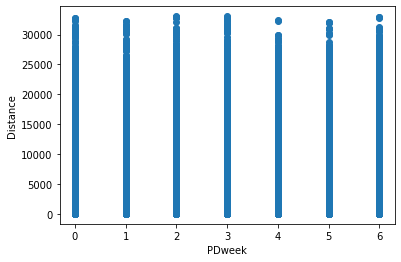

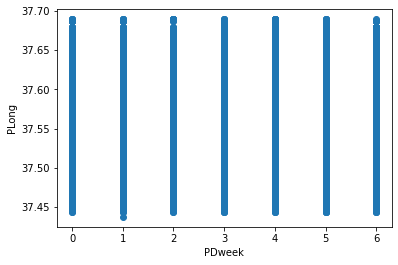

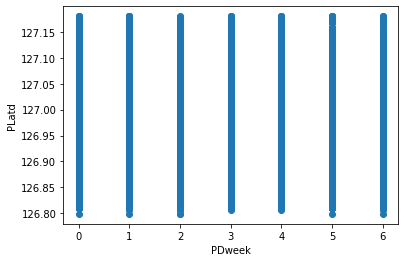

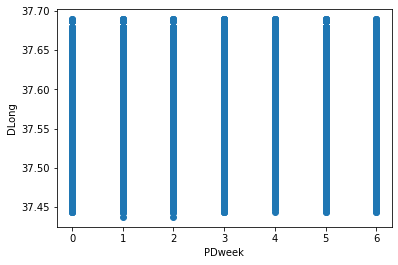

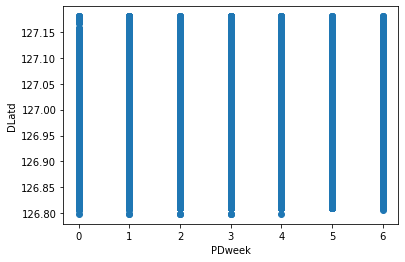

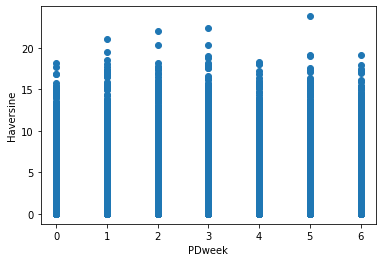

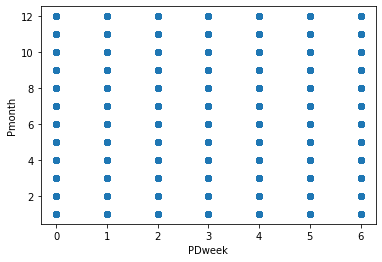

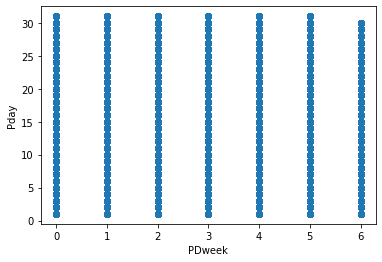

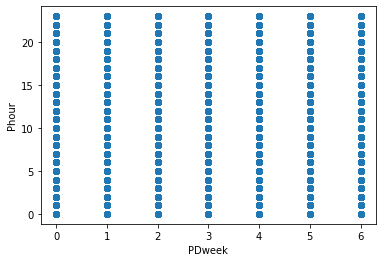

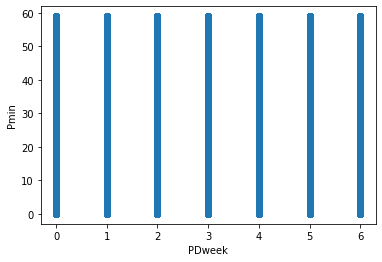

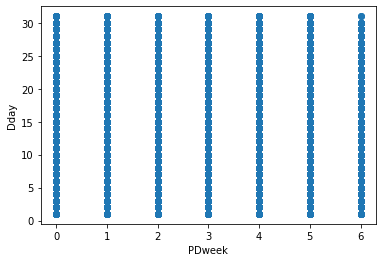

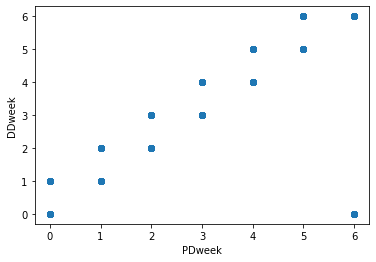

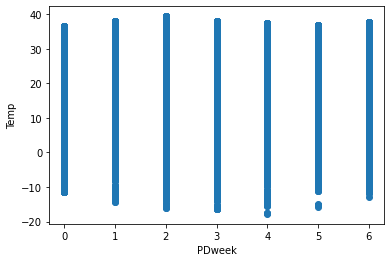

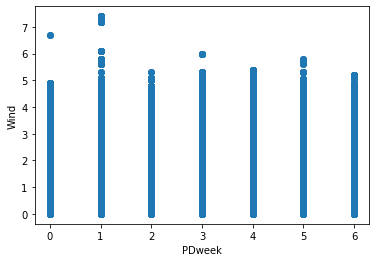

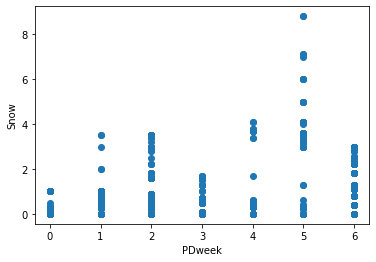

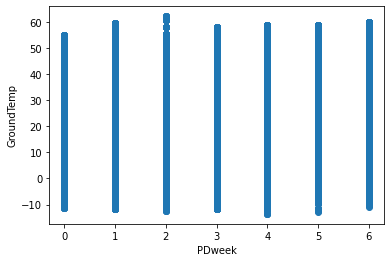

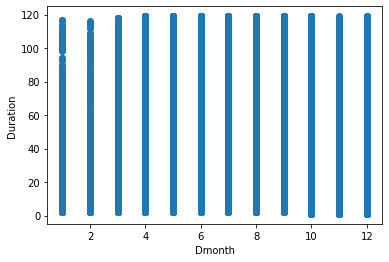

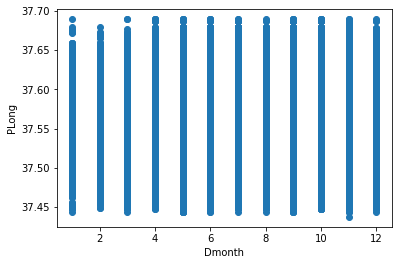

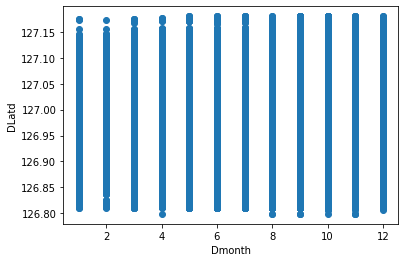

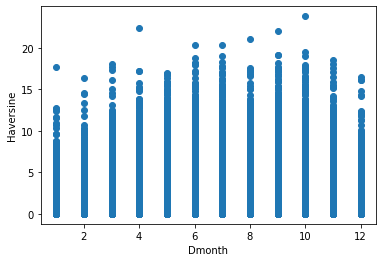

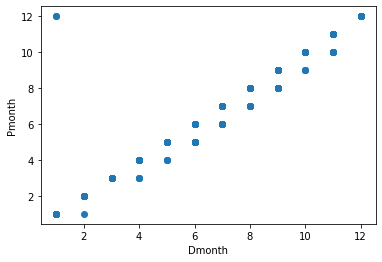

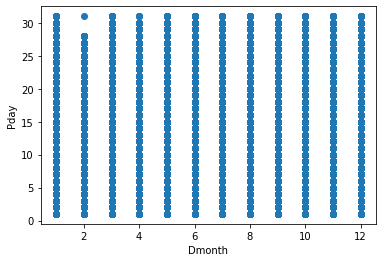

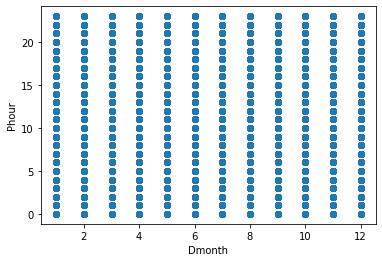

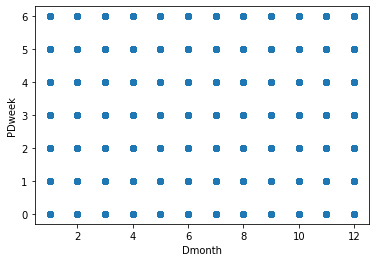

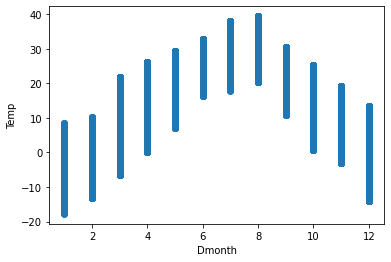

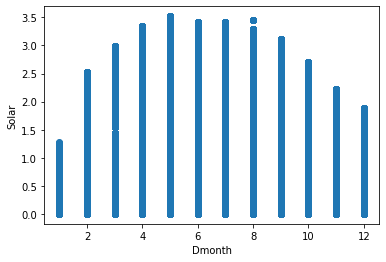

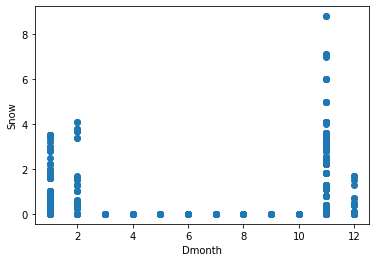

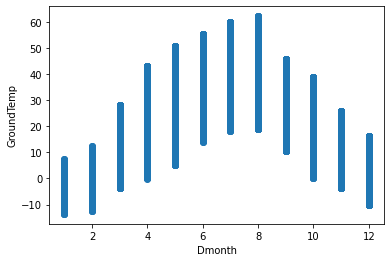

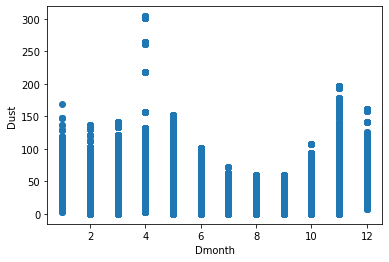

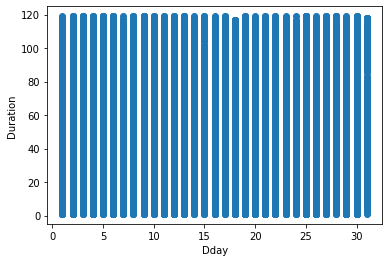

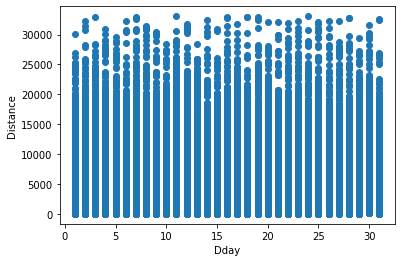

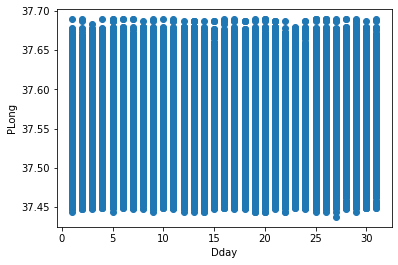

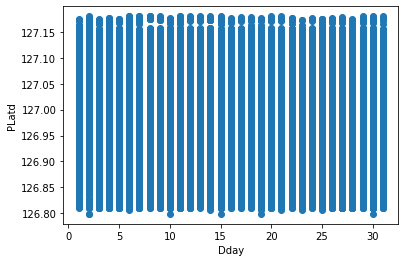

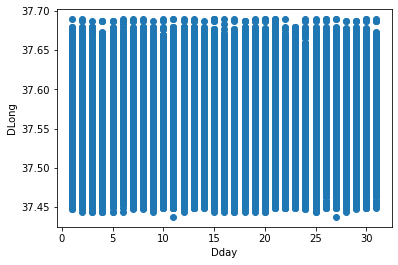

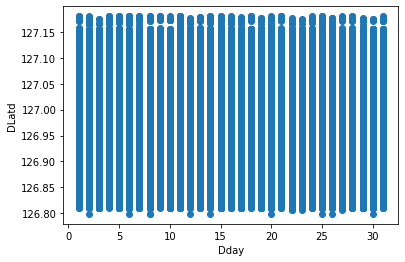

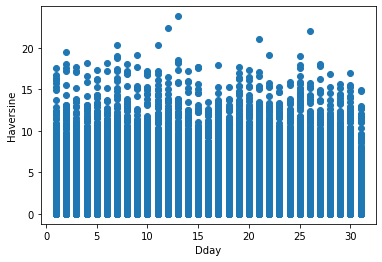

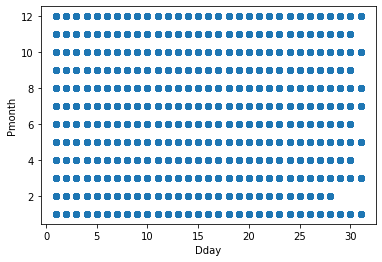

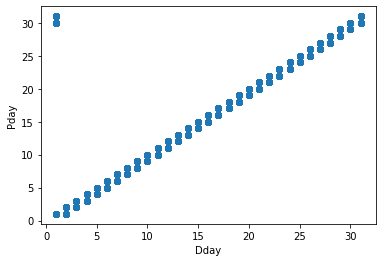

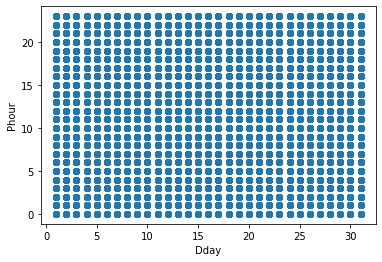

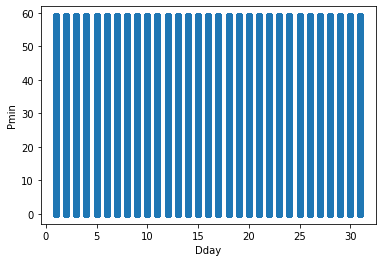

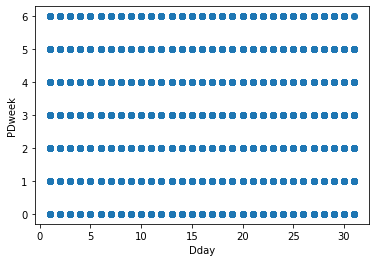

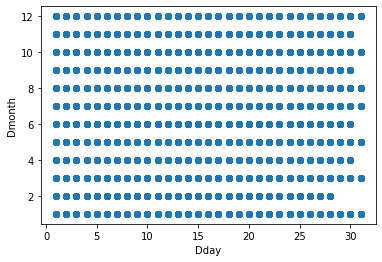

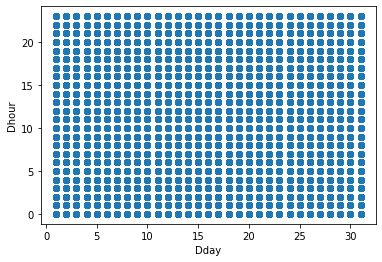

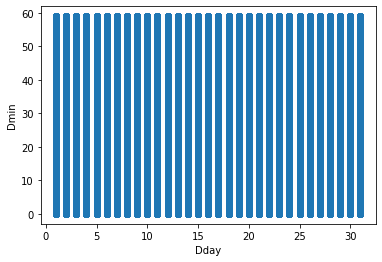

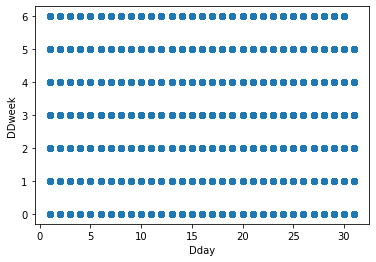

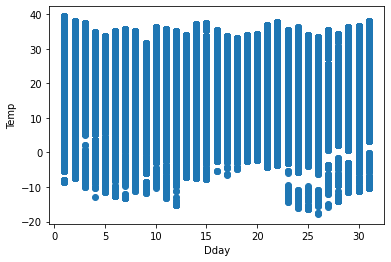

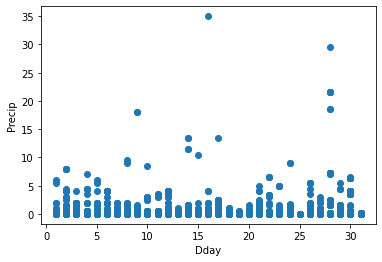

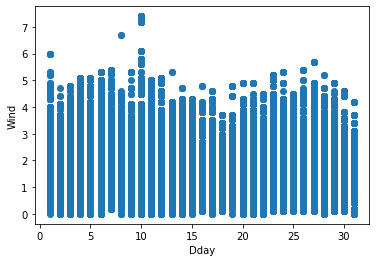

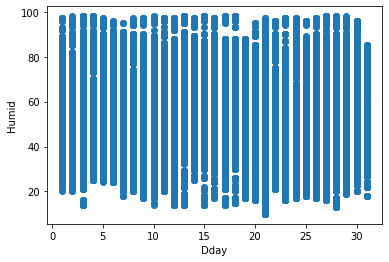

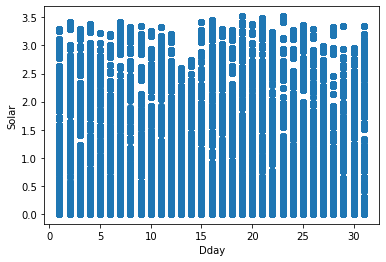

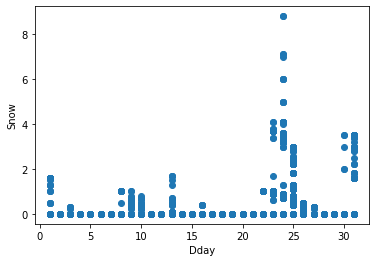

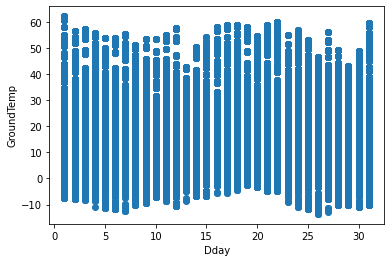

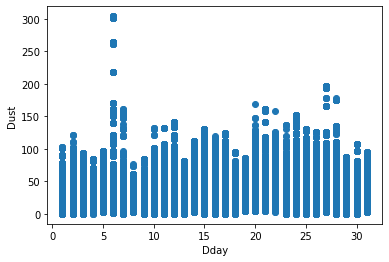

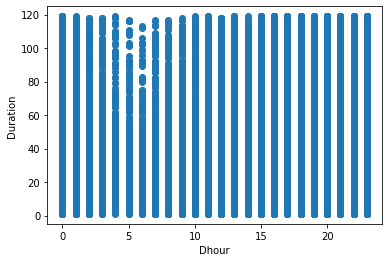

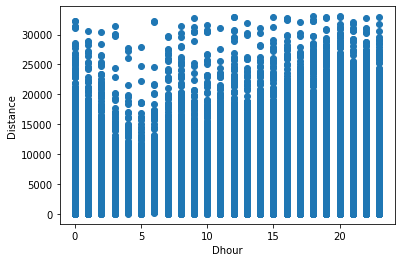

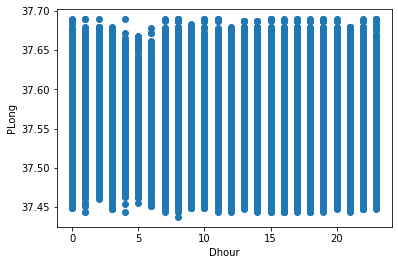

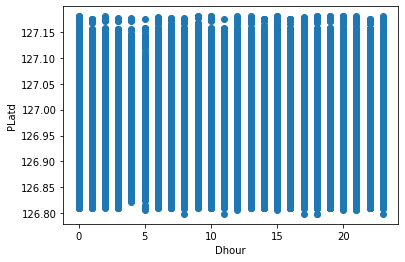

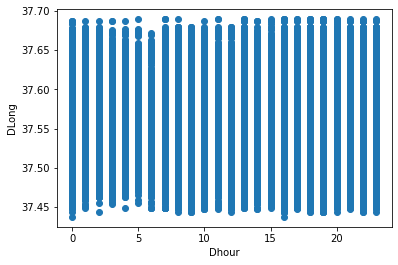

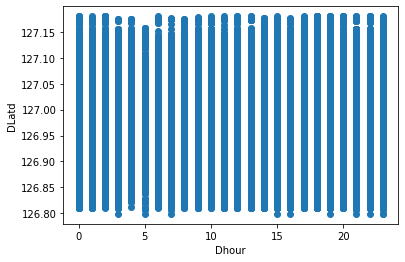

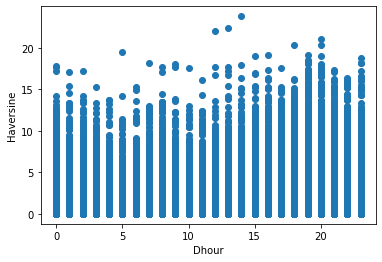

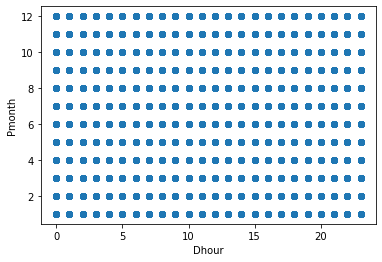

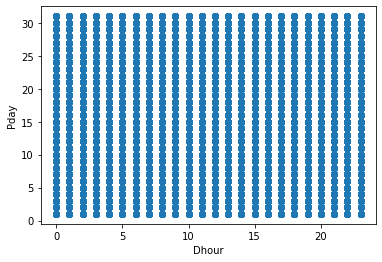

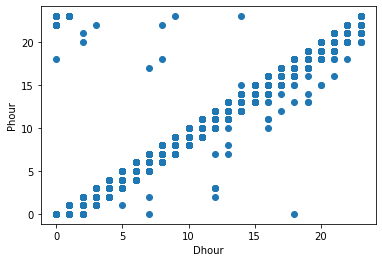

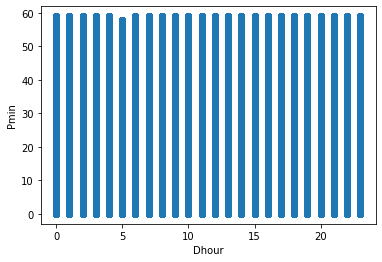

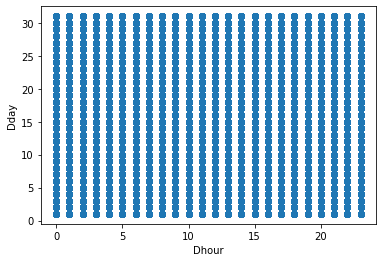

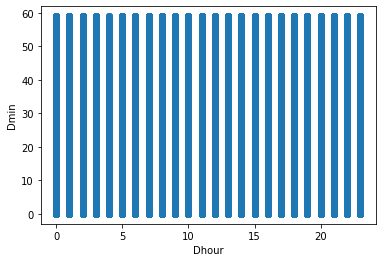

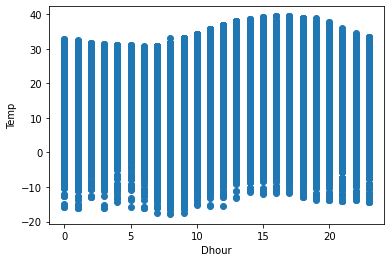

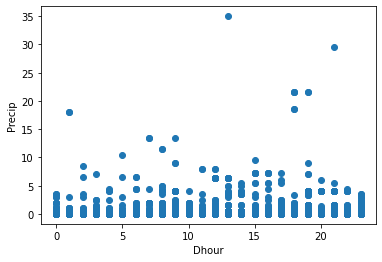

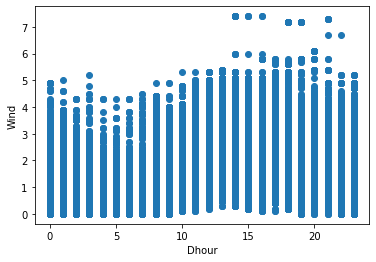

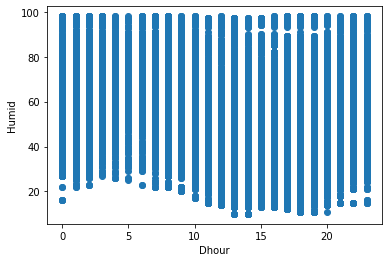

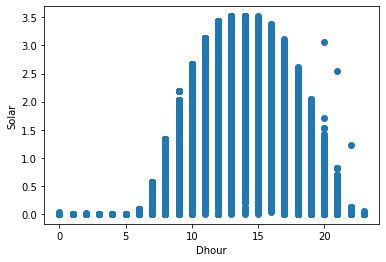

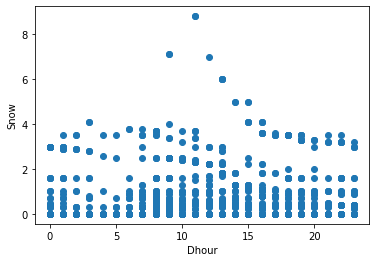

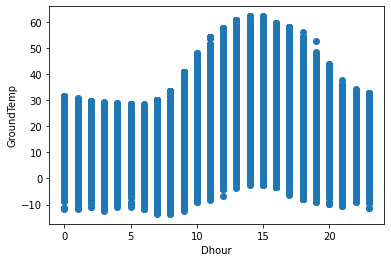

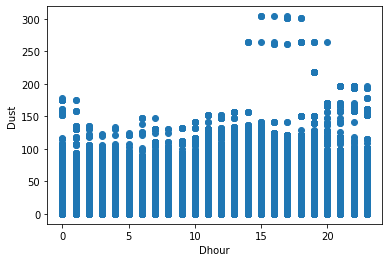

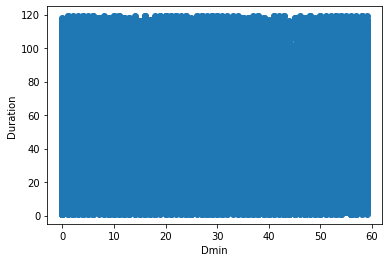

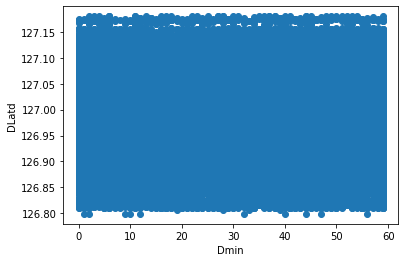

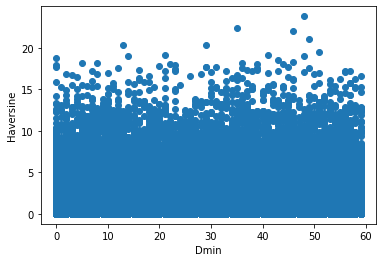

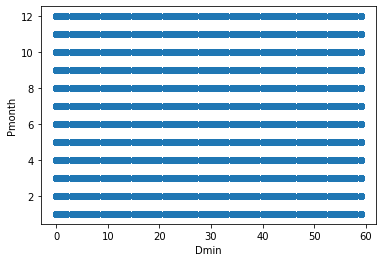

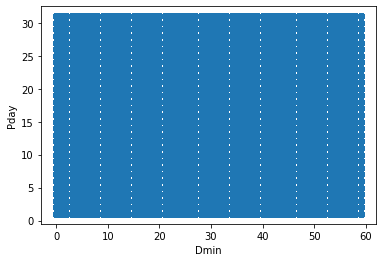

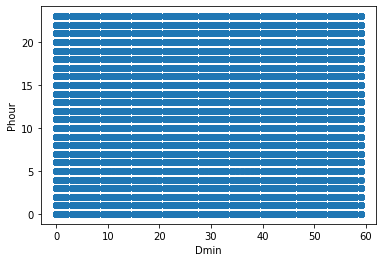

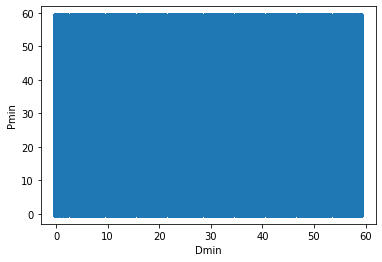

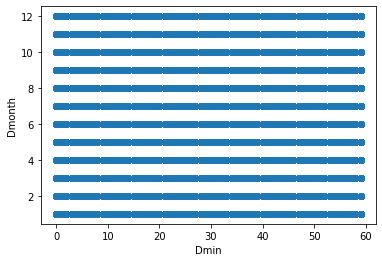

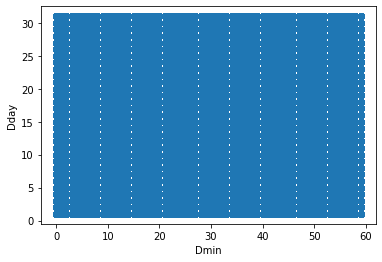

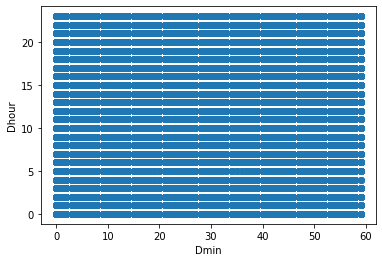

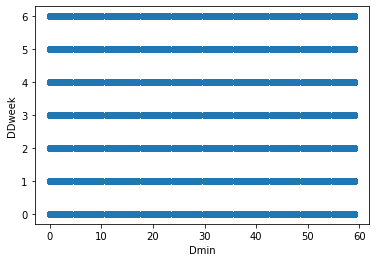

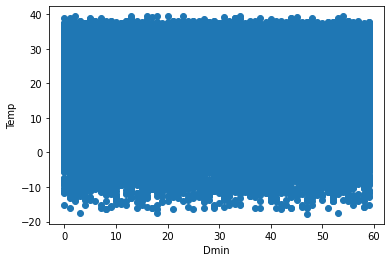

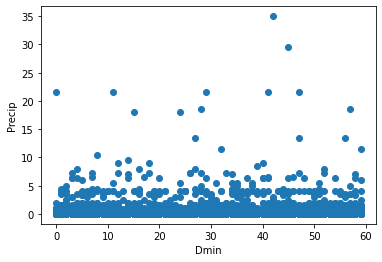

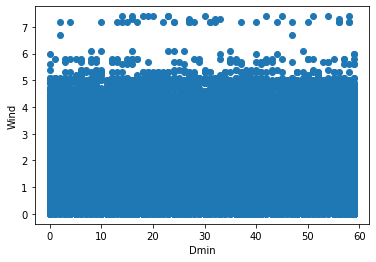

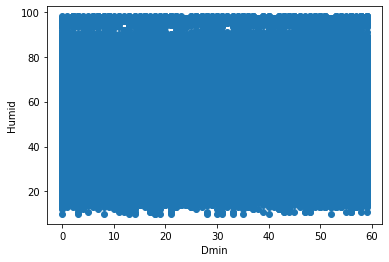

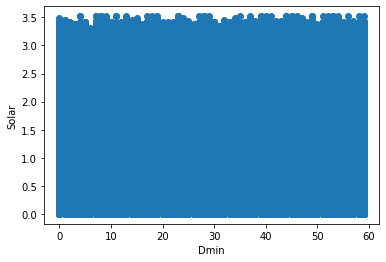

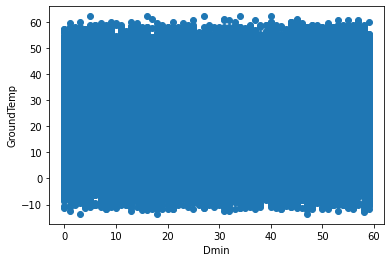

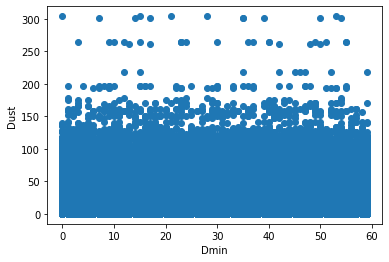

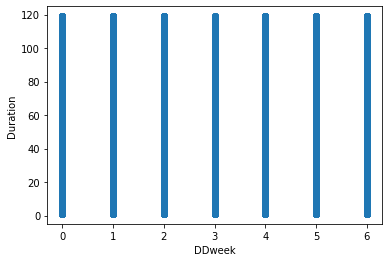

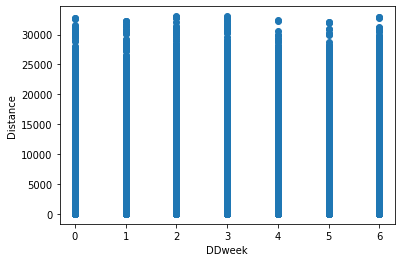

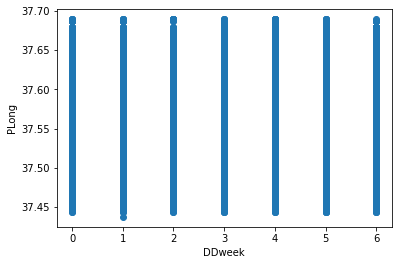

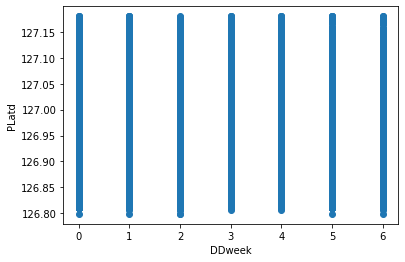

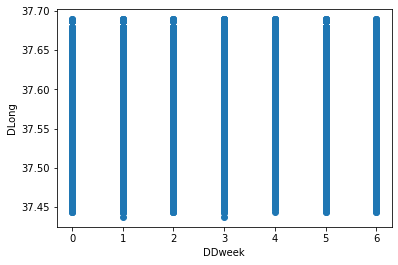

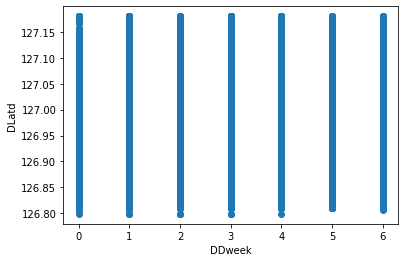

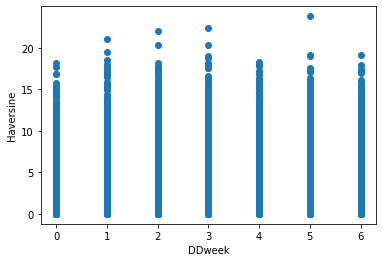

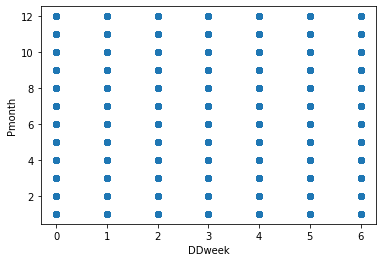

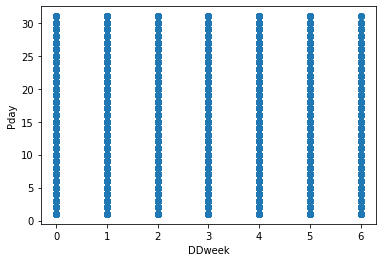

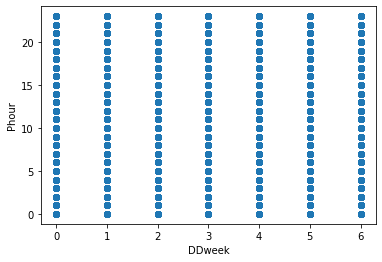

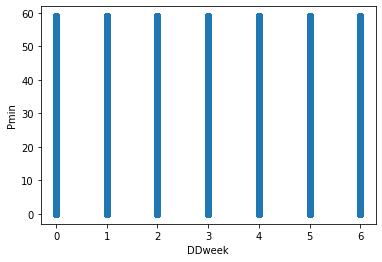

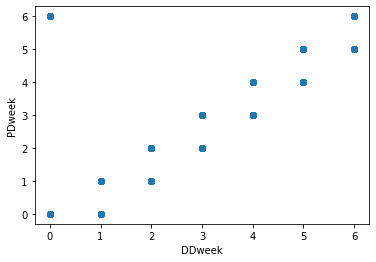

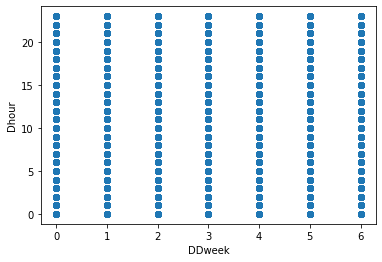

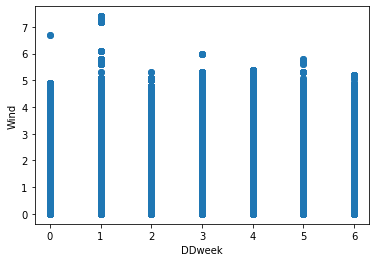

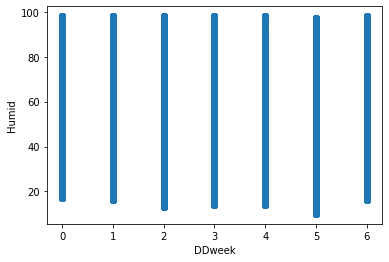

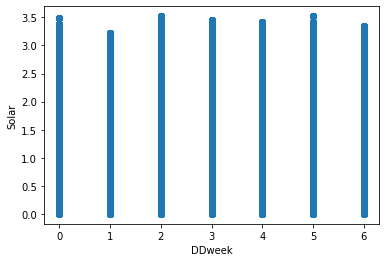

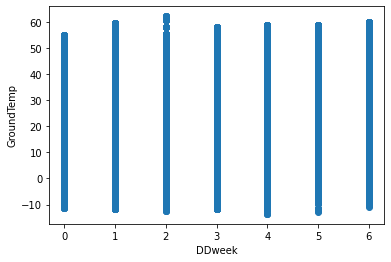

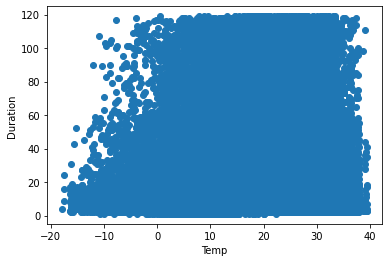

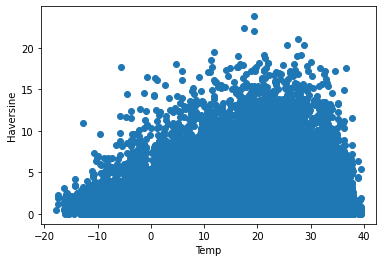

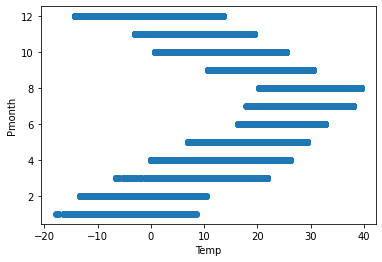

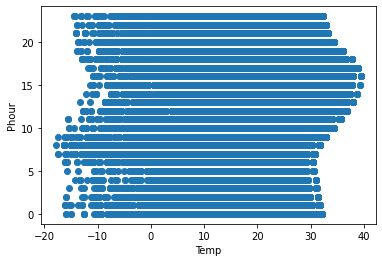

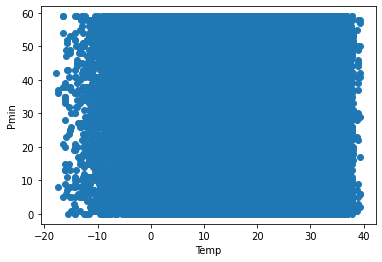

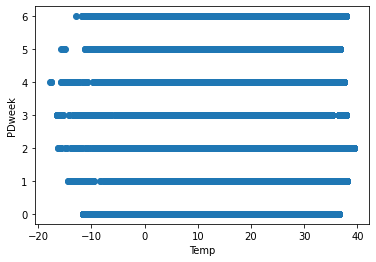

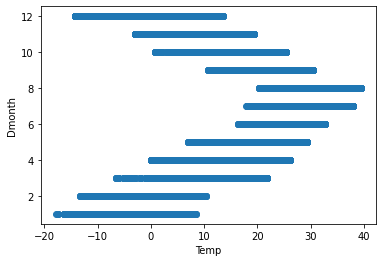

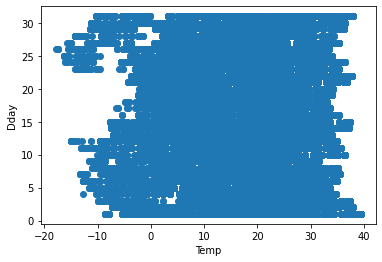

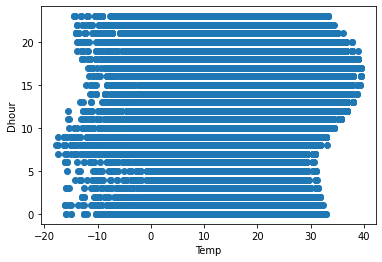

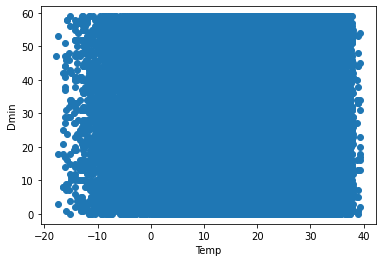

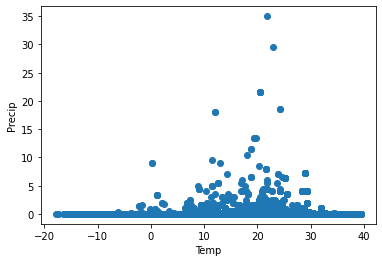

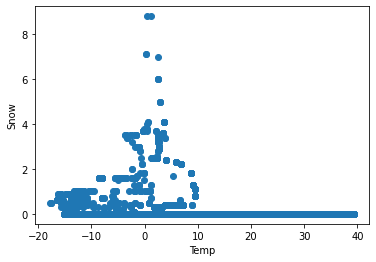

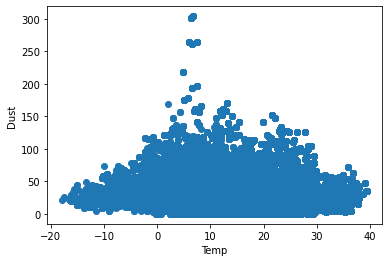

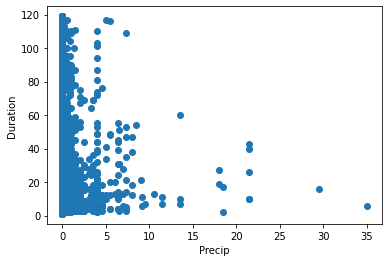

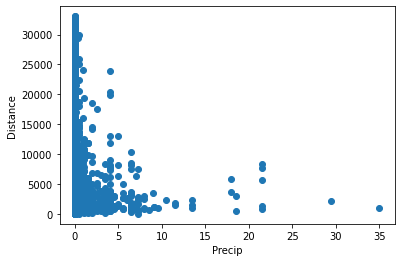

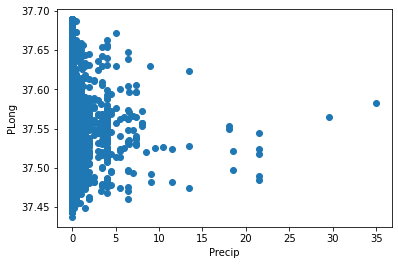

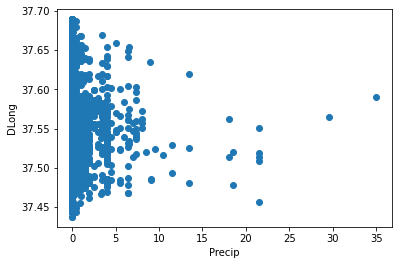

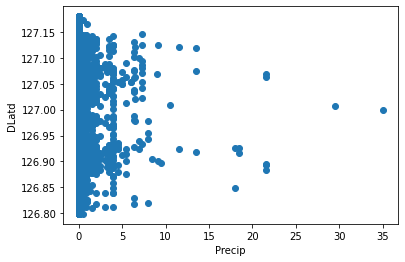

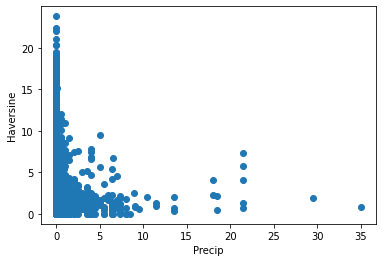

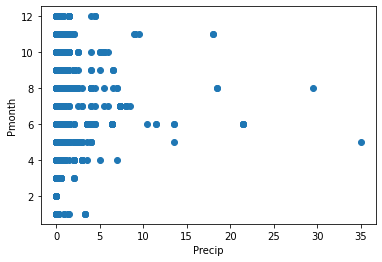

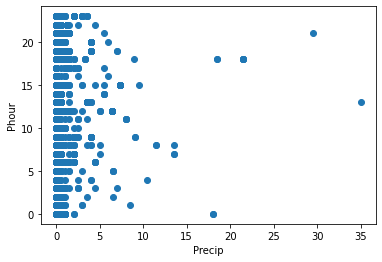

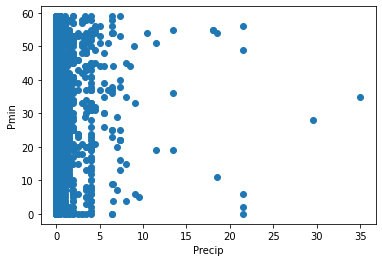

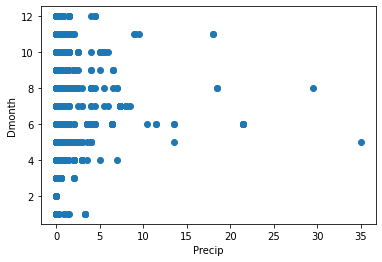

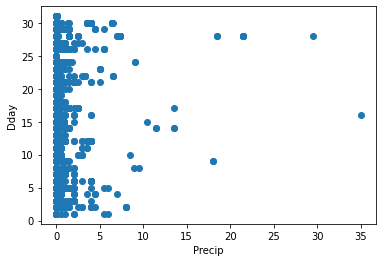

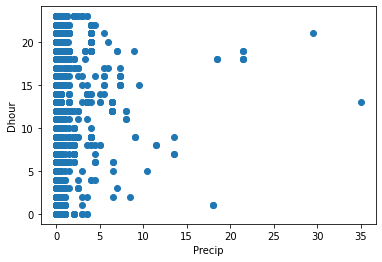

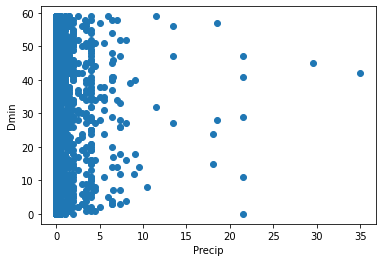

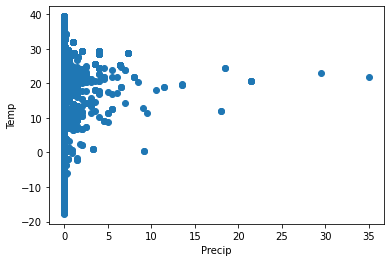

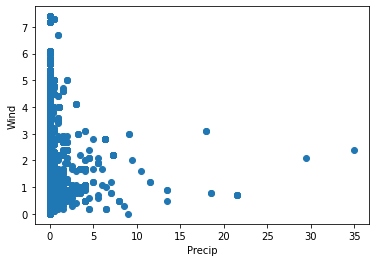

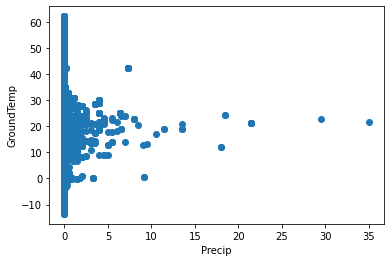

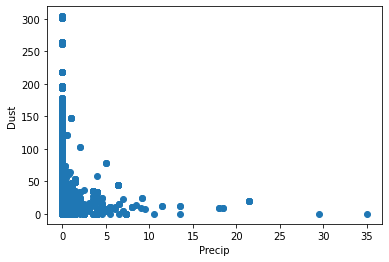

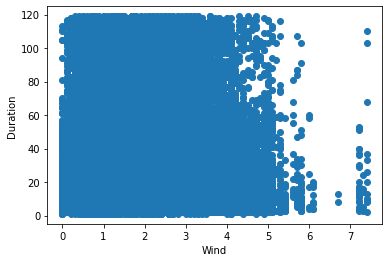

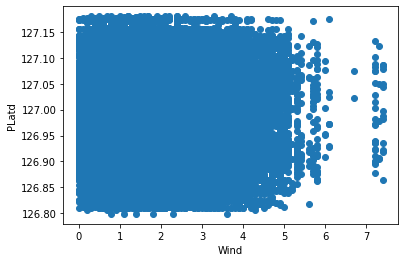

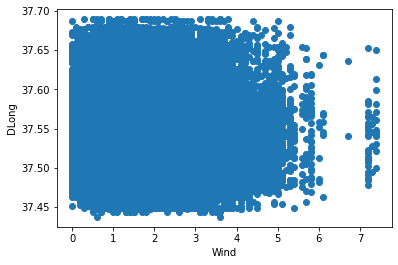

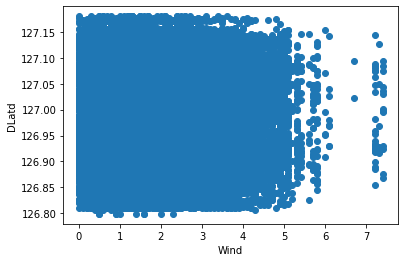

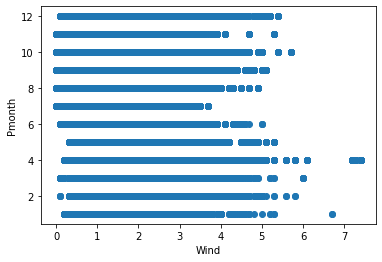

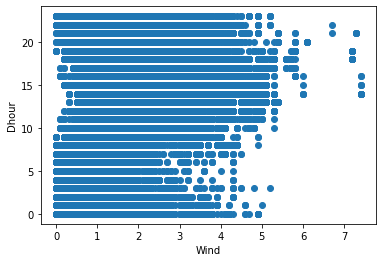

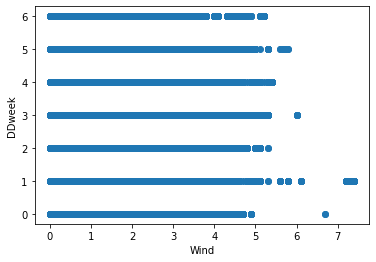

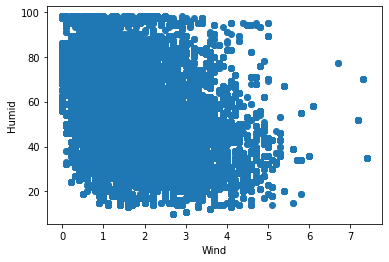

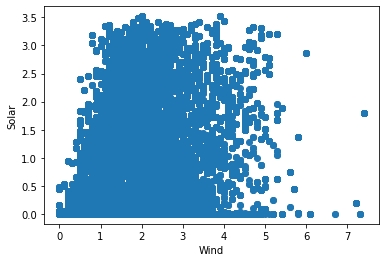

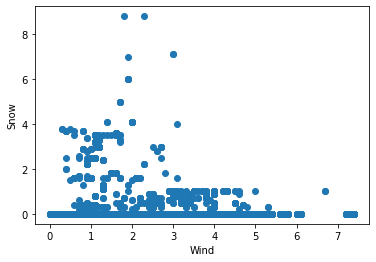

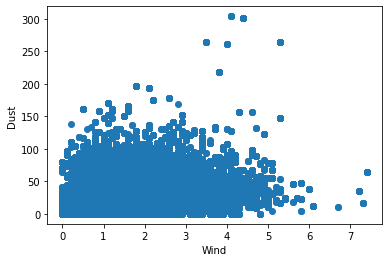

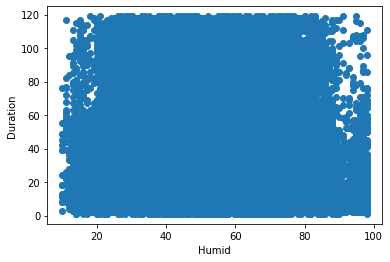

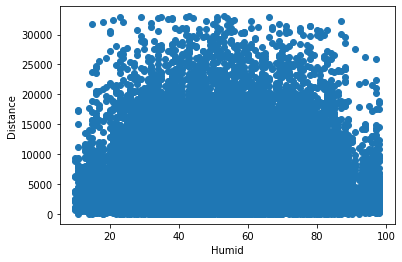

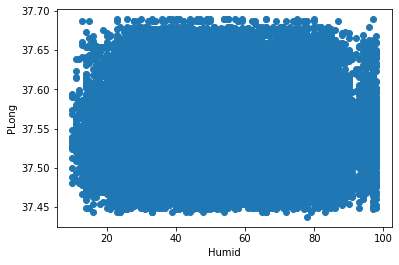

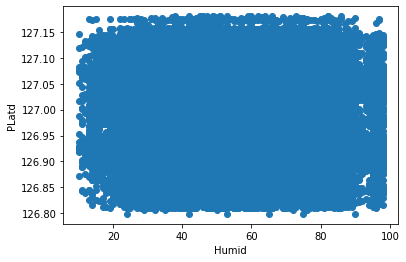

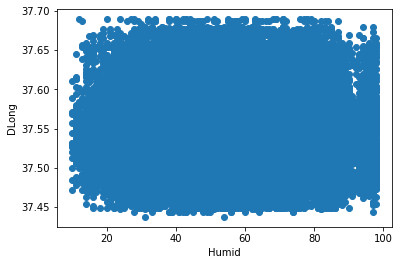

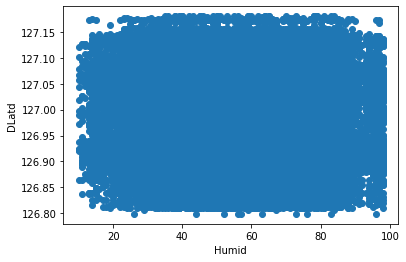

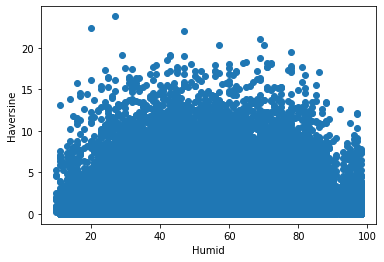

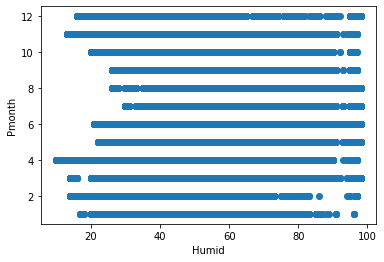

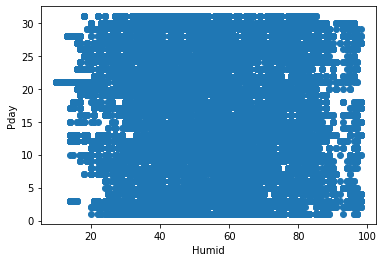

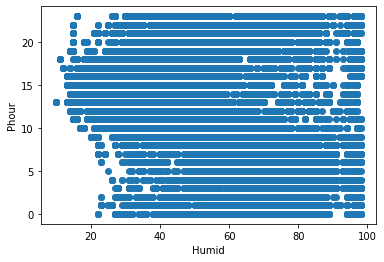

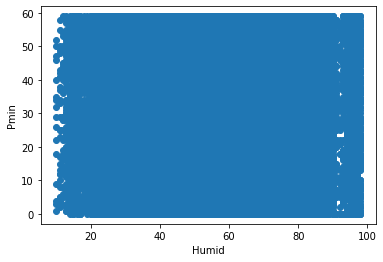

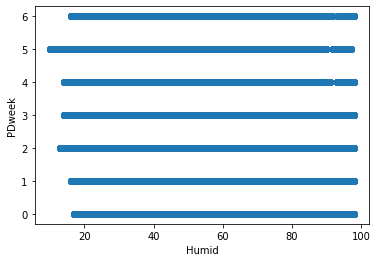

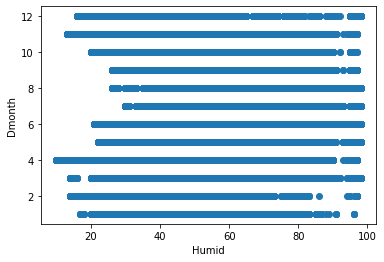

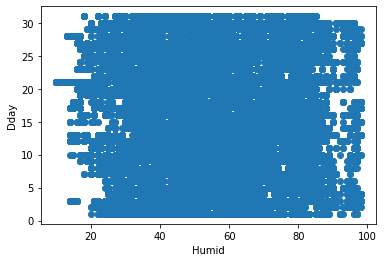

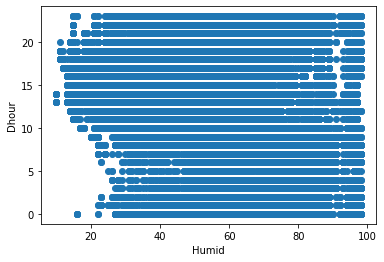

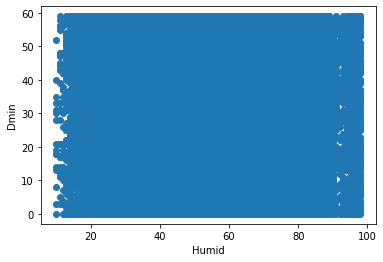

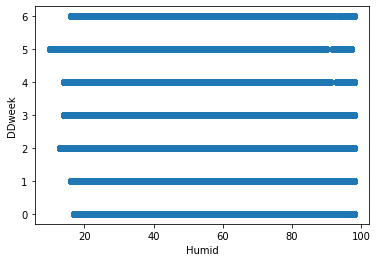

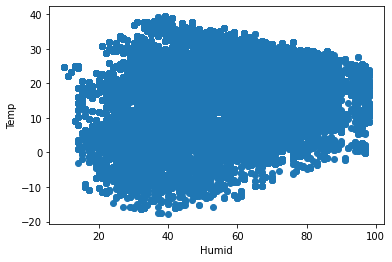

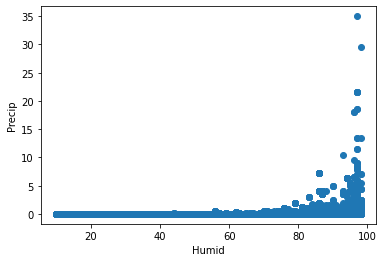

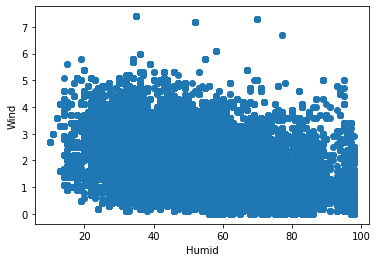

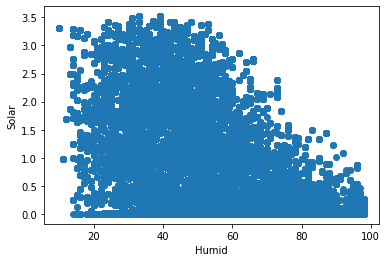

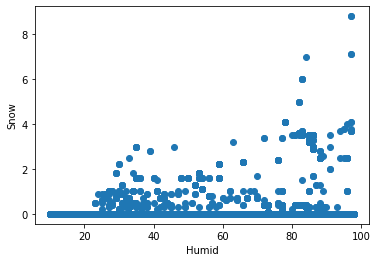

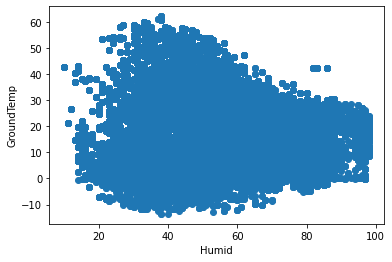

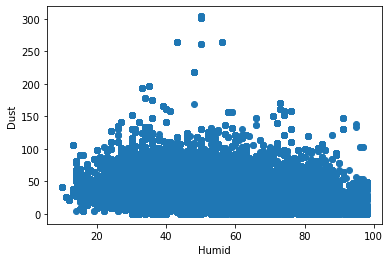

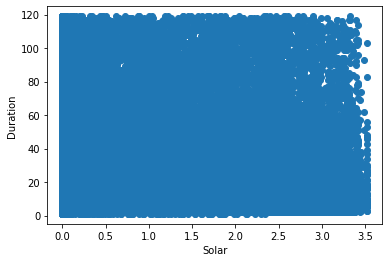

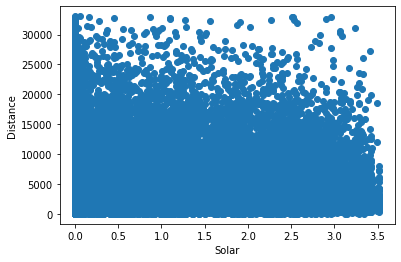

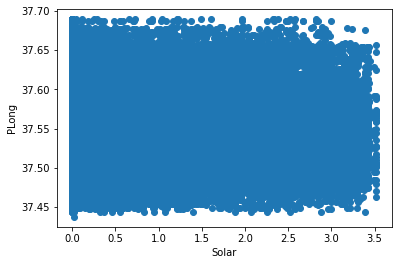

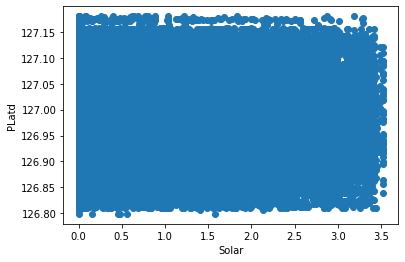

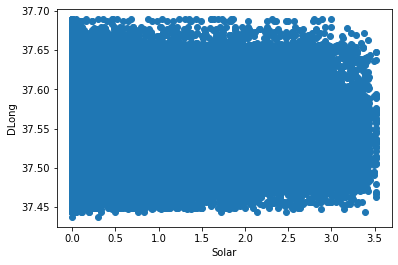

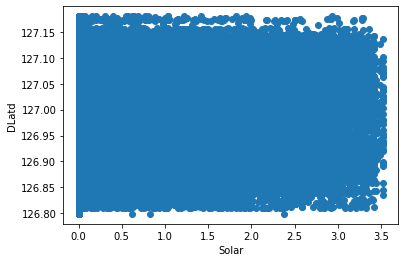

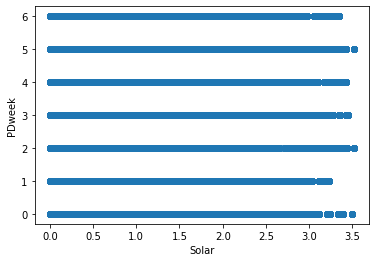

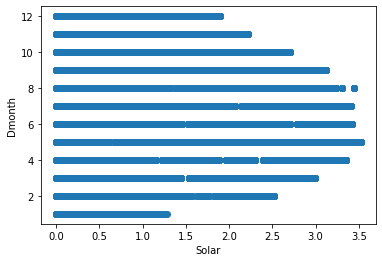

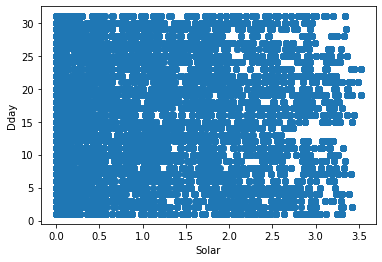

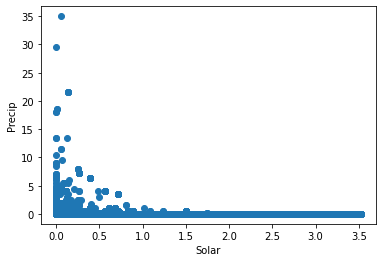

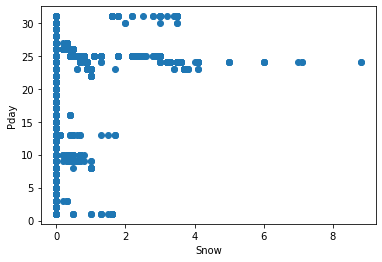

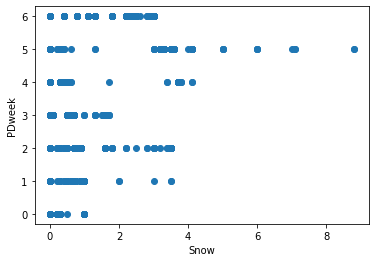

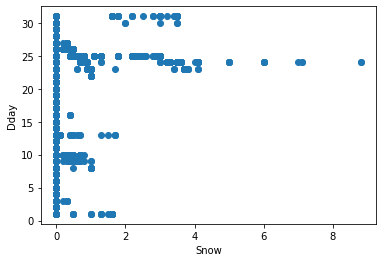

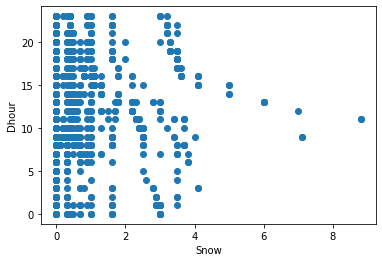

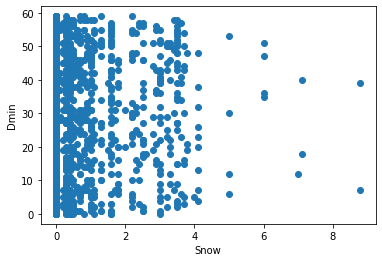

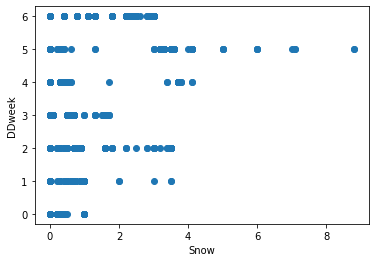

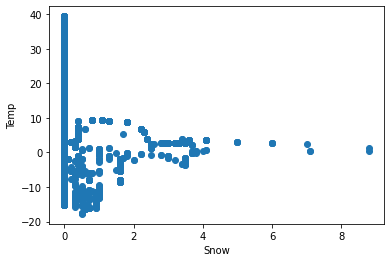

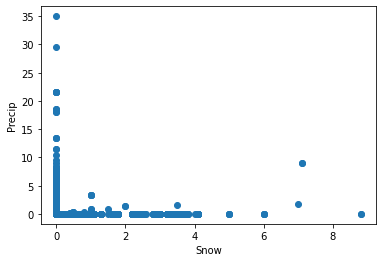

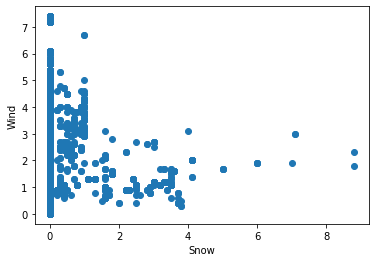

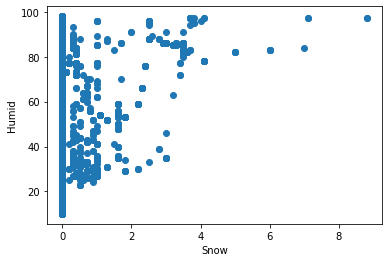

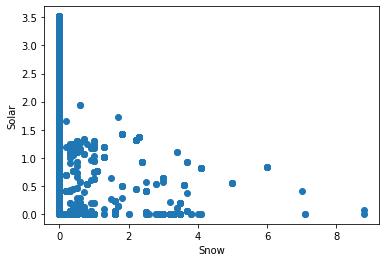

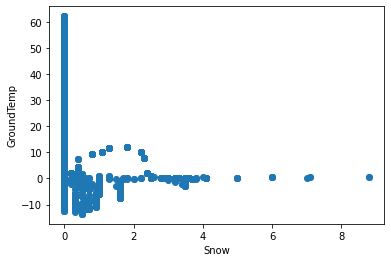

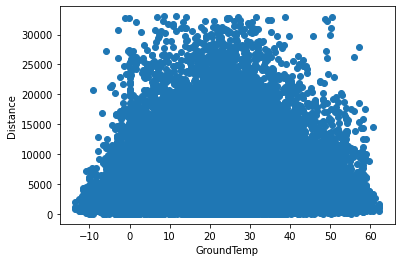

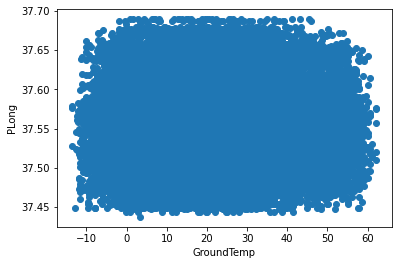

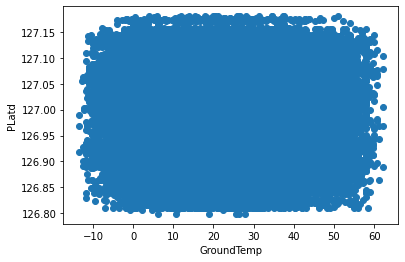

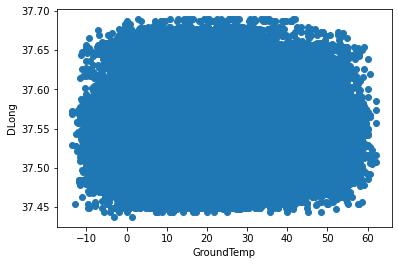

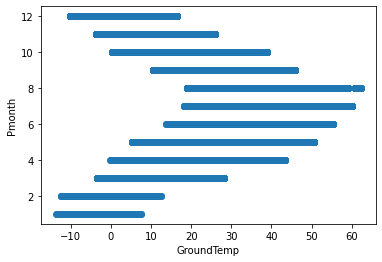

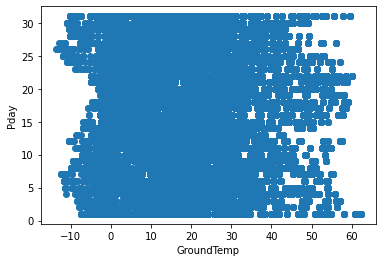

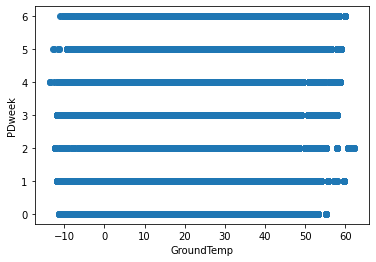

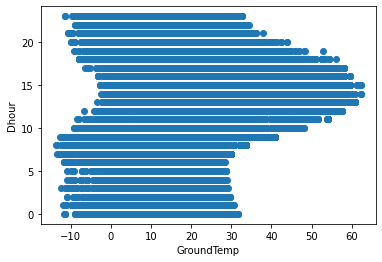

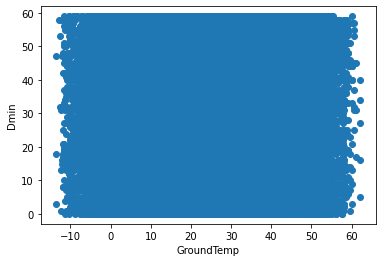

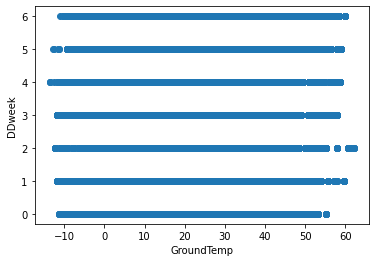

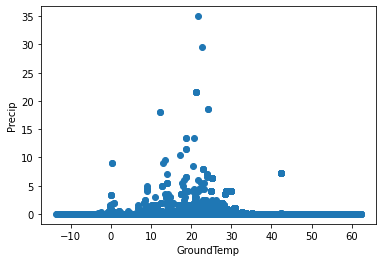

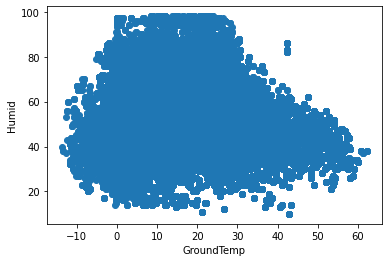

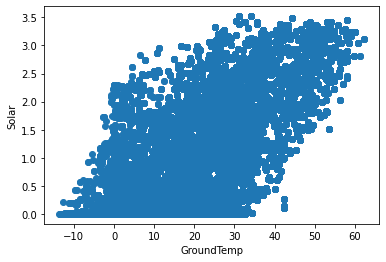

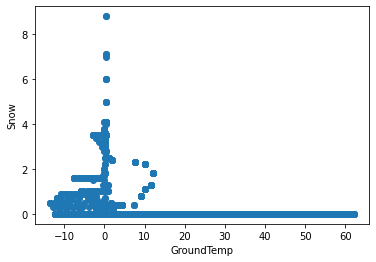

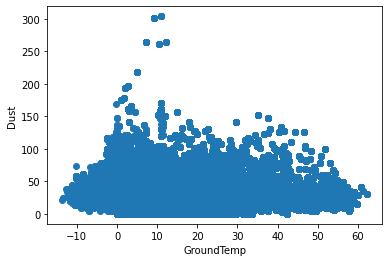

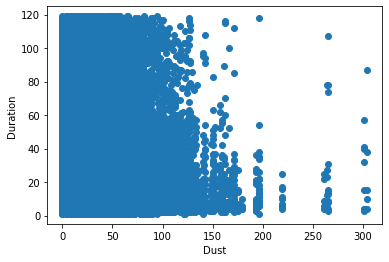

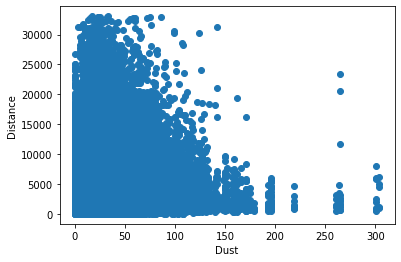

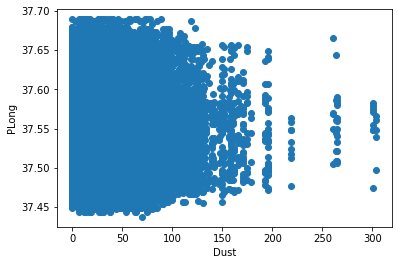

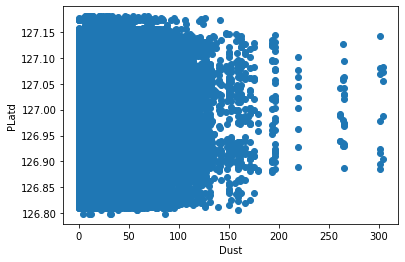

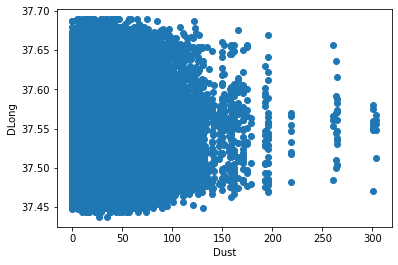

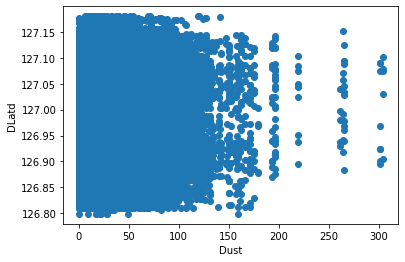

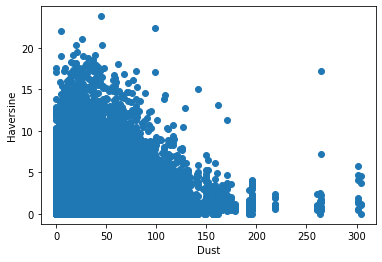

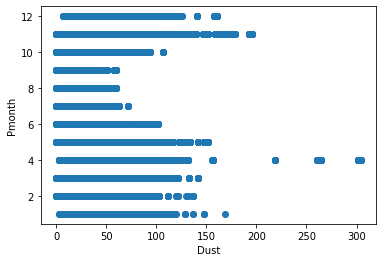

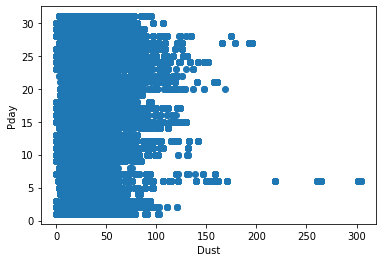

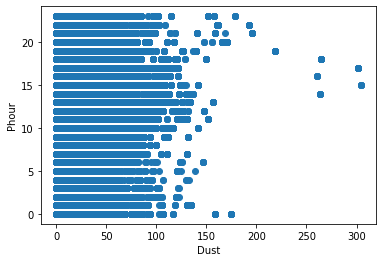

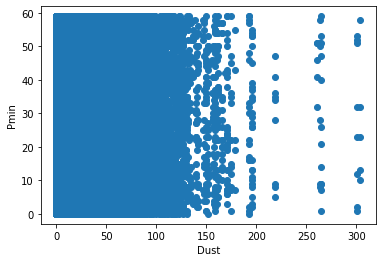

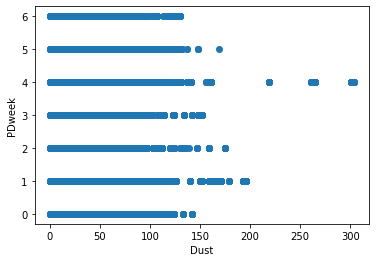

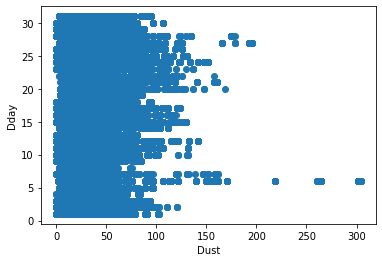

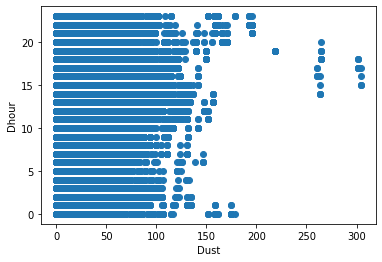

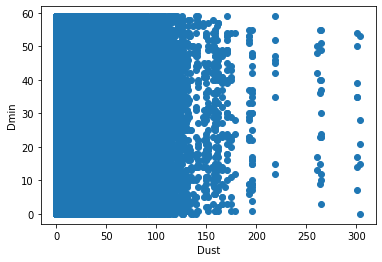

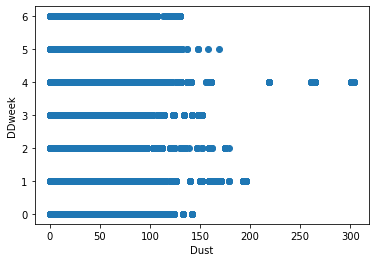

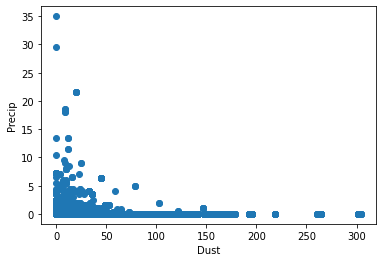

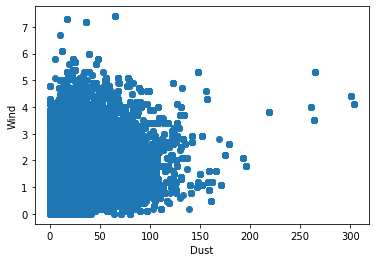

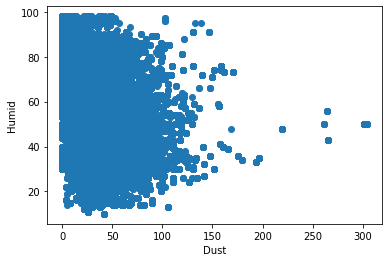

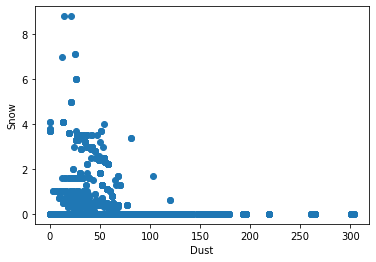

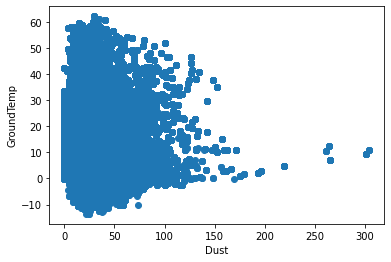

In [ ]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(df_sample[x], df_sample[y])
    plt.show()

# Loop through numerical data list and use function to scatter plot between two columns
column_list = df_sample.columns
for i in column_list:
    for j in column_list:
        if i != j :
            plot_scatter(i, j)

PLong and DLong are correlated

PLatd and DLatd are correlated

Pmonth and Dmonth are correlated

## HISTOGRAM

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

In [ ]:
#Histogram Using pandas 
df_sample.hist(figsize = (30, 16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe574d13f10>,
      dtype=object)

Observation -
2. data distribution of duration, distance, haversine, precipation, solar radiation, snow and dust are skewed right.
3. data distribution of humidity is symmetrical
4. data distribution of Pmin and Dmin is right skewed.
4. data distribution of Phour and Dhour is same.
4. data distribution of pday and Dday is same.
4. data distribution of Pmonth and Dmonth is same

## VIF - Variance inflation factor
1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model.
2. It is used for diagnosing collinearity/multicollinearity.
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [ ]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [ ]:
# creating a dataframe of just numerical values
train_for_vif = df_sample.drop('Duration', axis = 1)

# target values
target = df_sample['Duration']

# numerical values column names
names = [ 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
          'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 
          'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']

names

['Distance',
 'PLong',
 'PLatd',
 'DLong',
 'DLatd',
 'Haversine',
 'Pmonth',
 'Pday',
 'Phour',
 'Pmin',
 'PDweek',
 'Dmonth',
 'Dday',
 'Dhour',
 'Dmin',
 'DDweek',
 'Temp',
 'Precip',
 'Wind',
 'Humid',
 'Solar',
 'Snow',
 'GroundTemp',
 'Dust']

In [ ]:
# droping rows with empty cells
train_for_vif.columns

Index(['Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmonth',
       'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'Dmin',
       'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [ ]:
# droping rows with empty cells
train_for_vif.columns == names[1]

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
train_for_vif

Distance      PLong       PLatd      DLong       DLatd  Haversine  \
0          3720  37.613956  127.030251  37.638706  127.015907   3.028153   
1          2970  37.586388  126.935127  37.564541  126.927071   2.530896   
2           980  37.464550  126.883728  37.456841  126.888344   0.949100   
3           980  37.546307  127.049805  37.539654  127.052589   0.779438   
4          8880  37.556610  126.898018  37.556610  126.898018   0.000000   
...         ...        ...         ...        ...         ...        ...   
99995       650  37.528263  126.896629  37.532101  126.894440   0.468391   
99996      2480  37.564674  126.976738  37.544460  126.972389   2.280158   
99997      6750  37.484257  126.954697  37.512959  126.952072   3.199912   
99998      2180  37.600975  126.926956  37.583698  126.924965   1.929110   
99999      9980  37.569805  127.016953  37.638805  127.028358   7.737964   

       Pmonth  Pday  Phour  Pmin  ...  Dmin  DDweek  Temp  Precip  Wind  \
0           9    13      3    54  ...    15       3  20.9     0.0   1.7   
1          11     5     13    45  ...     2       0  16.8     0.0   1.1   
2          11    10      8    50  ...    56       5   9.3     0.0   0.3   
3           8     1     12    17  ...    23       2  36.8     0.0   1.3   
4           7    27     21    17  ...    16       4  30.3     0.0   1.1   
...       ...   ...    ...   ...  ...   ...     ...   ...     ...   ...   
99995      10    23     23    21  ...    26       1  11.2     0.0   0.5   
99996      10     7     18    45  ...    54       6  17.9     0.0   2.8   
99997       5     7     14    52  ...     1       0  24.1     0.0   1.2   
99998       6    10     15    23  ...    38       6  24.8     0.0   1.2   
99999      11    10      5    10  ...    52       5   9.4     0.0   0.8   

       Humid  Solar  Snow  GroundTemp  Dust  
0       68.0   0.00   0.0        20.0  27.0  
1       46.0   1.71   0.0        23.2  58.0  
2       85.0   0.07   0.0         8.7  83.0  
3       39.0   2.80   0.0        54.9  37.0  
4       75.0   0.00   0.0        30.2  28.0  
...      ...    ...   ...         ...   ...  
99995   78.0   0.00   0.0         9.0  21.0  
99996   29.0   0.16   0.0        14.0  25.0  
99997   42.0   1.93   0.0        27.0  67.0  
99998   49.0   1.34   0.0        36.6   8.0  
99999   87.0   0.00   0.0         8.2  70.0  

[100000 rows x 24 columns]

In [ ]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
    y = train_for_vif.loc[:, train_for_vif.columns == names[i]]
    x = train_for_vif.loc[:, train_for_vif.columns != names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1-rsq), 2)
    print("R Square value of {} columns is {} keeping all other columns as features".format(names[i], round(rsq, 2)))
    print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of Distance columns is 0.65 keeping all other columns as features
Variance inflation Factor of Distance columns is 2.88 

R Square value of PLong columns is 1.0 keeping all other columns as features
Variance inflation Factor of PLong columns is 5251100.32 

R Square value of PLatd columns is 1.0 keeping all other columns as features
Variance inflation Factor of PLatd columns is 31246008.28 

R Square value of DLong columns is 1.0 keeping all other columns as features
Variance inflation Factor of DLong columns is 5246653.72 

R Square value of DLatd columns is 1.0 keeping all other columns as features
Variance inflation Factor of DLatd columns is 31196054.28 

R Square value of Haversine columns is 0.65 keeping all other columns as features
Variance inflation Factor of Haversine columns is 2.83 

R Square value of Pmonth columns is 1.0 keeping all other columns as features
Variance inflation Factor of Pmonth columns is 23388.64 

R Square value of Pday columns is 1.0 keep

there is colinearity/multicolinearity between variables as the VIF value is almost upto 2.5

Distance', 'PLong', 'PLatd', 'DLong','DLatd',  'Phour',  'PDweek', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Humid', 'Solar', 'Snow', 'GroundTemp',  have colinearity with all the variables.

## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

In [ ]:
# Perform boxplot on Duration column of the dataset
df_sample.boxplot(column = 'Duration', figsize = (15, 10))

from above box plot graph:

duration

25% of duration have value between range 0 to 8

25% of duration have value between range 8 to 18

25% of duration have value between range 18 to 35

25% of duration have value between range 35 to 77

The mean duration is around 18

**Mostly the duration are on the lower side of the spectrum. Means small duration trips are the common trips**


In [ ]:
# Perform boxplot on Distance column of the dataset
df_sample.boxplot(column = 'Distance', figsize = (15, 10))

from above box plot graph:

distance

25% of distance have value between range 0 to 1000

25% of distance have value between range 1000 to 2500

25% of distance have value between range 2500 to 4900

25% of distance have value between range 4900 to 9900

The mean distance is around 2500

 Mostly the distance are on the lower side of the spectrum. Means small distance trips are the common trips



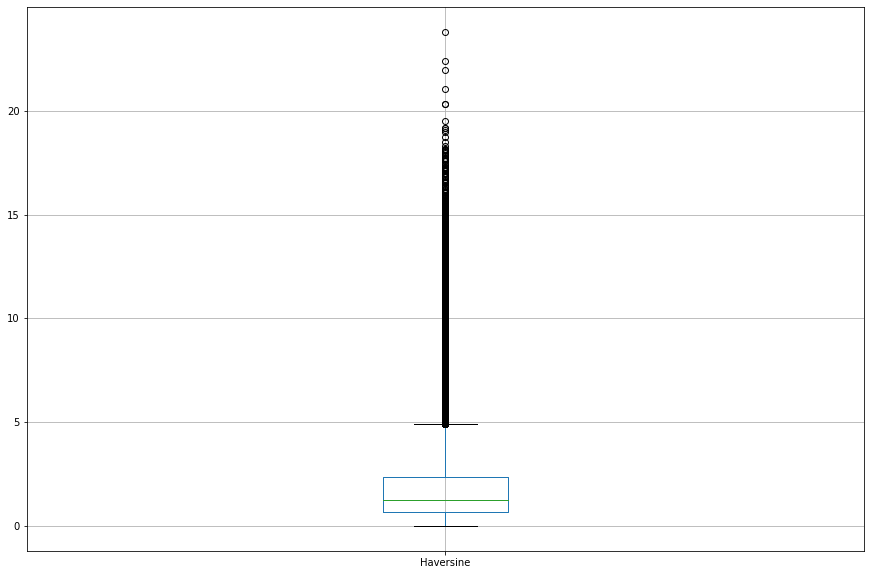

In [ ]:
# Perform boxplot on Haversine column of the dataset
df_sample.boxplot(column = 'Haversine', figsize = (15, 10))

from above box plot graph:

haversine

25% of haversine have value between range 0 to 0.25

25% of haversine have value between range 0.25 to 1

25% of haversine have value between range 1 to 2.5

25% of haversine have value between range 2.5 to 5

The mean haversine is around 1

Observation: Mostly the haversine are on the lower side of the spectrum. Means small distance trips are the common trips

In [ ]:
# Perform boxplot on Temp column of the dataset
df_sample.boxplot(column = 'Temp', figsize = (15, 10))

from above box plot graph:

temperature

25% of temperature have value between range -8 to 2

25% of temperature have value between range 2 to 20

25% of temperature have value between range 20 to 26

25% of temperature have value between range 26 to 40

The mean temperature is around 20

trips are planned in slightly high temperature

In [ ]:
# Perform boxplot on Precip column of the dataset
# Using pandas 
df_sample.boxplot(column = 'Precip', figsize = (15, 10))

from above box plot graph:

precip

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

The mean precip is around 0

more trips are planned when there is no rain or snow fall

In [ ]:
# Perform boxplot on wind column of the dataset
df_sample.boxplot(column = 'Wind', figsize = (15, 10))

from above box plot graph:

wind

25% of wind have value between range 0 to 1.1

25% of wind have value between range 1.1 to 1.8

25% of wind have value between range 1.8 to 2.5

25% of wind have value between range 2.5 to 4.2

The mean wind is around 1.8

more trips are during less windy wheather

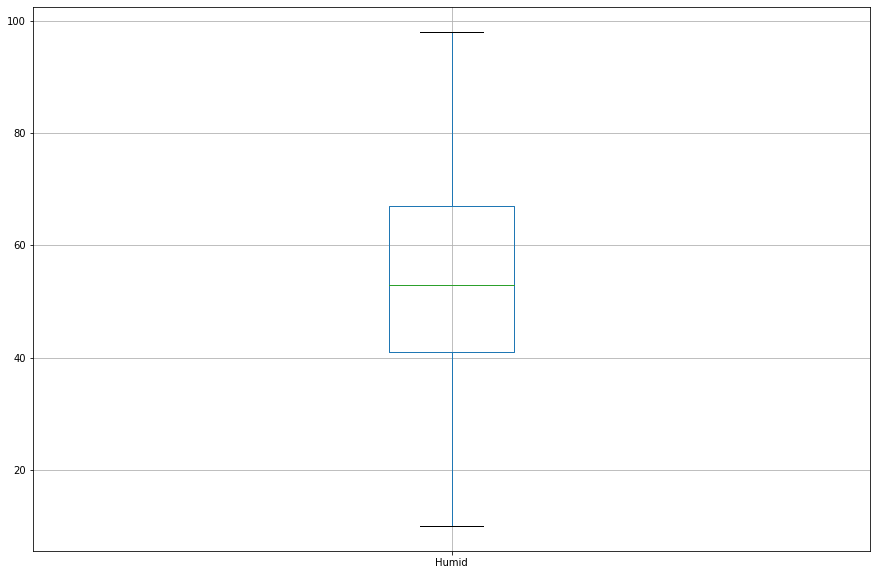

In [ ]:
# Perform boxplot on humid column of the dataset
df_sample.boxplot(column = 'Humid', figsize = (15, 10))

from above box plot graph:

humid

25% of humid have value between range 10 to 41

25% of humid have value between range 41 to 56

25% of humid have value between range 56 to 64

25% of humid have value between range 64 to 99

The mean humid is around 56

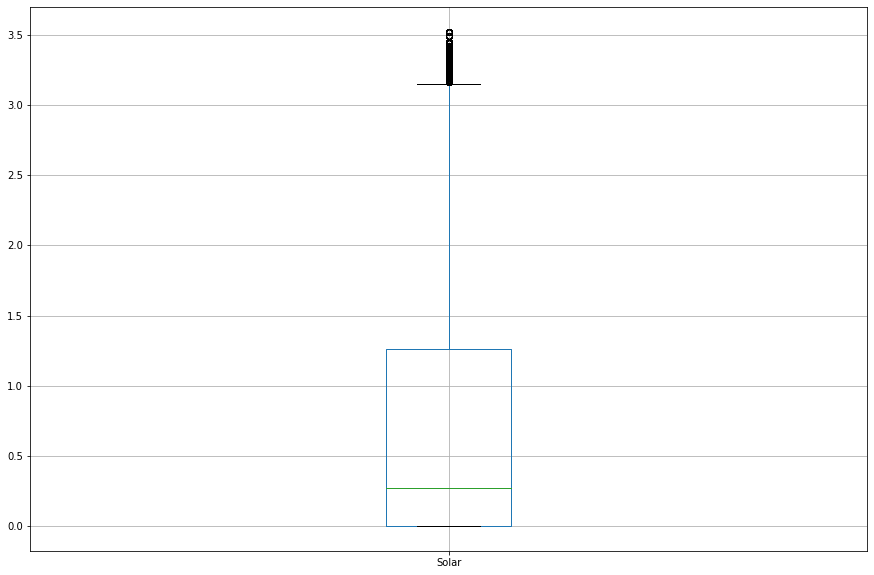

In [ ]:
# Perform boxplot on solar column of the dataset 
df_sample.boxplot(column = 'Solar', figsize = (15, 10))

from above box plot graph:

solar

25% of solar have value between range 0 to 0

25% of solar have value between range 0 to 0.25

25% of solar have value between range 0.25 to 1.25

25% of solar have value between range 1.25 to 3.1

The mean solar is around 0.25

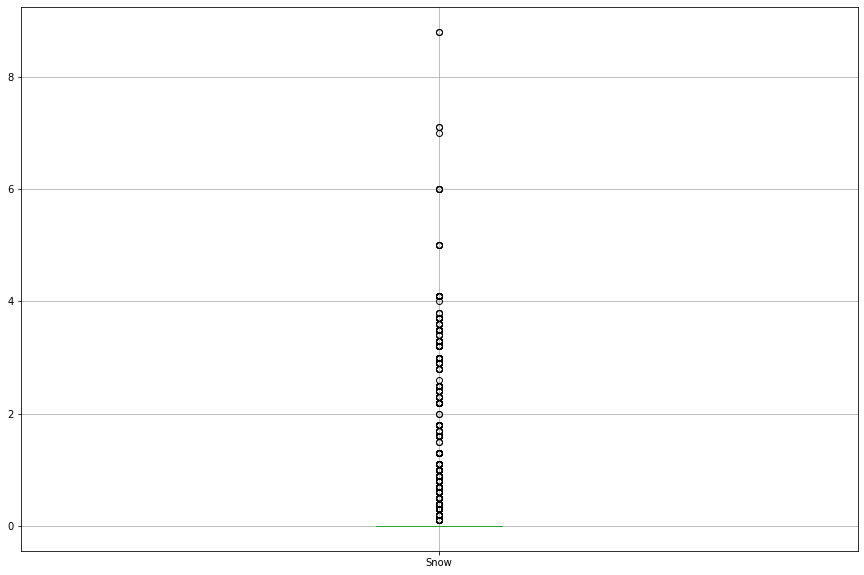

In [ ]:
# Perform boxplot on snow column of the dataset 
df_sample.boxplot(column = 'Snow', figsize = (15, 10))

from above box plot graph:

snow

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

The mean snow is around 0

more trips are during when there is no snow fall

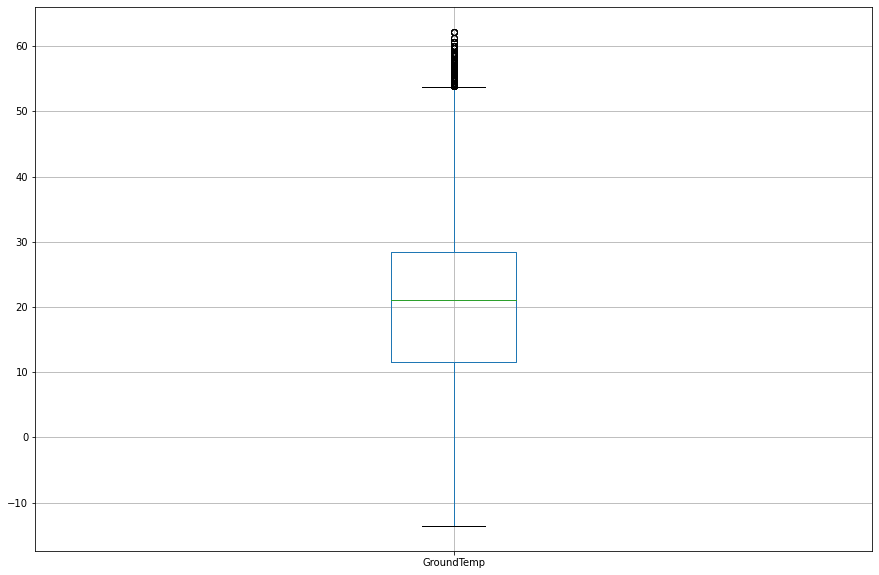

In [ ]:
# Perform boxplot on GroundTemp column of the dataset
df_sample.boxplot(column = 'GroundTemp', figsize = (15, 10))

from above box plot graph:

groundtemperature

25% of groundtemperature have value between range -12 to 11

25% of groundtemperature have value between range 11 to 21

25% of groundtemperature have value between range 21 to 29

25% of groundtemperature have value between range 29 to 52

The mean groundtemperature is around 21

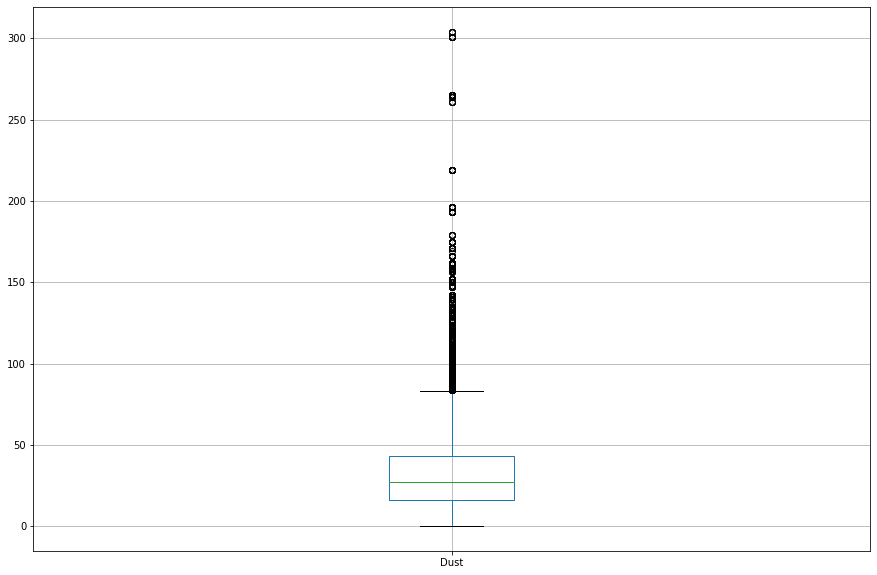

In [ ]:
# Perform boxplot on dust column of the dataset
df_sample.boxplot(column = 'Dust', figsize = (15, 10))

from above box plot graph:

dust

25% of dust have value between range 0 to 20

25% of dust have value between range 20 to 30

25% of dust have value between range 30 to 45

25% of dust have value between range 45 to 80

The mean dust is around 30

Observation: Mostly the dust are on the lower side of the spectrum. Means people preffer to travel in less dust concentration

## COUNT PLOT

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


Text(0.5, 1.0, 'PICKUP HOURS DISTRIBUTION')

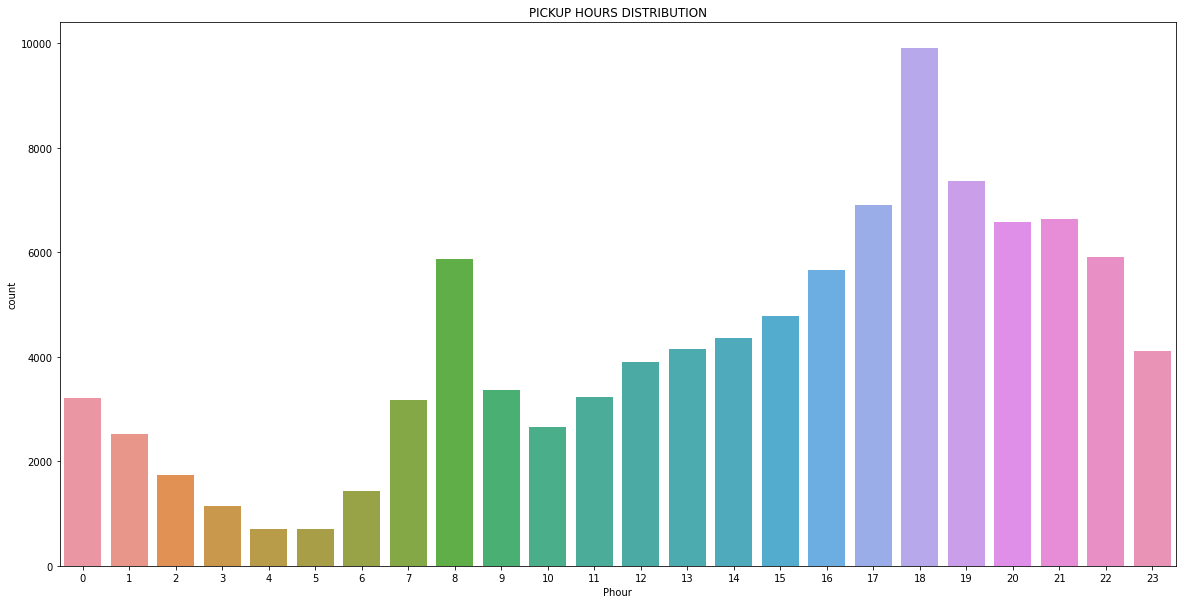

In [ ]:
# Perform the countplot on the pickup hour data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Phour']).set_title("PICKUP HOURS DISTRIBUTION")

more pickups are on morning and evening 

Text(0.5, 1.0, 'DROP HOURS DISTRIBUTION')

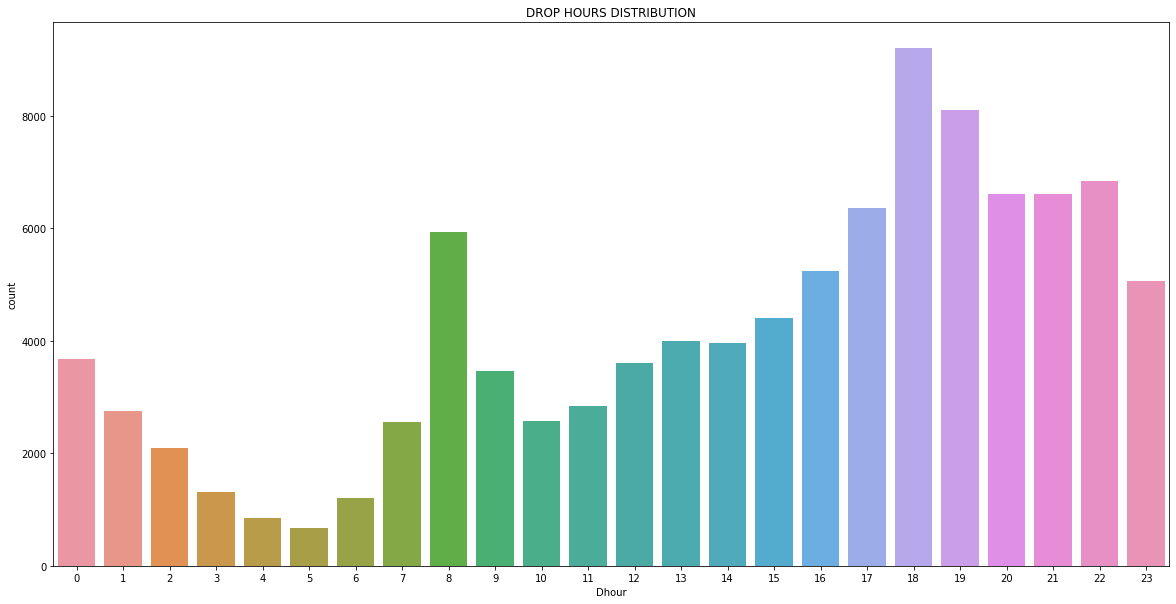

In [ ]:
# Perform the countplot on the drop hour data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Dhour']).set_title("DROP HOURS DISTRIBUTION")

Observation:  Dropoff hour are high at the office hours both at morning and evening



Text(0.5, 1.0, 'DURATION DISTRIBUTION')

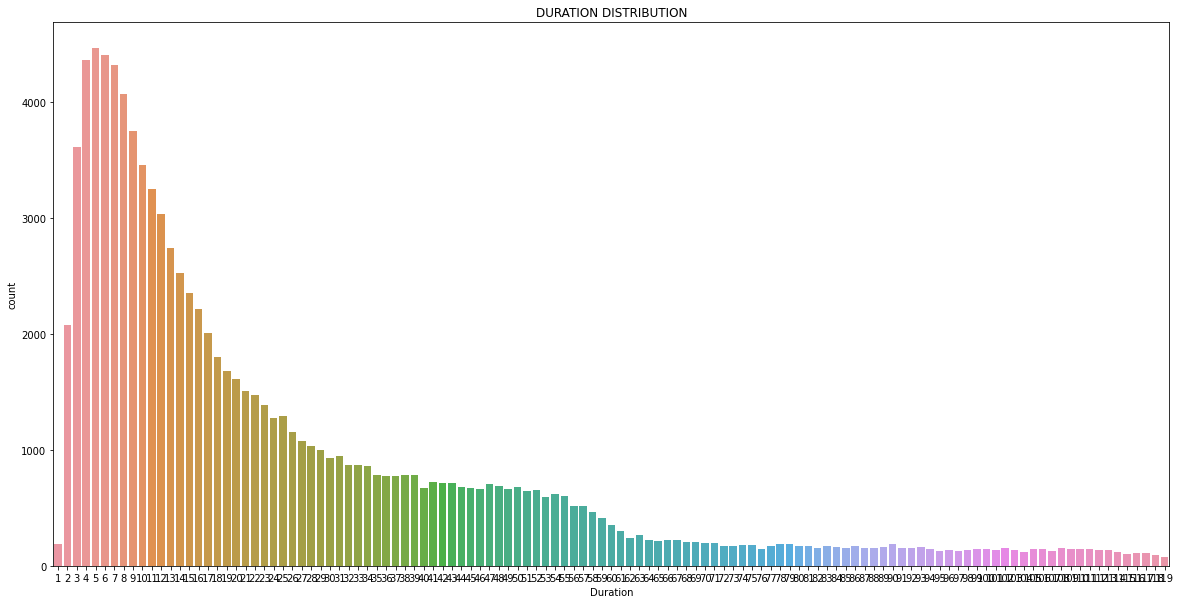

In [ ]:
# Perform the countplot on the duration data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Duration']).set_title("DURATION DISTRIBUTION")

distribution of duration is skewed left side



short duration trips are common

Text(0.5, 1.0, 'DISTANCE DISTRIBUTION')

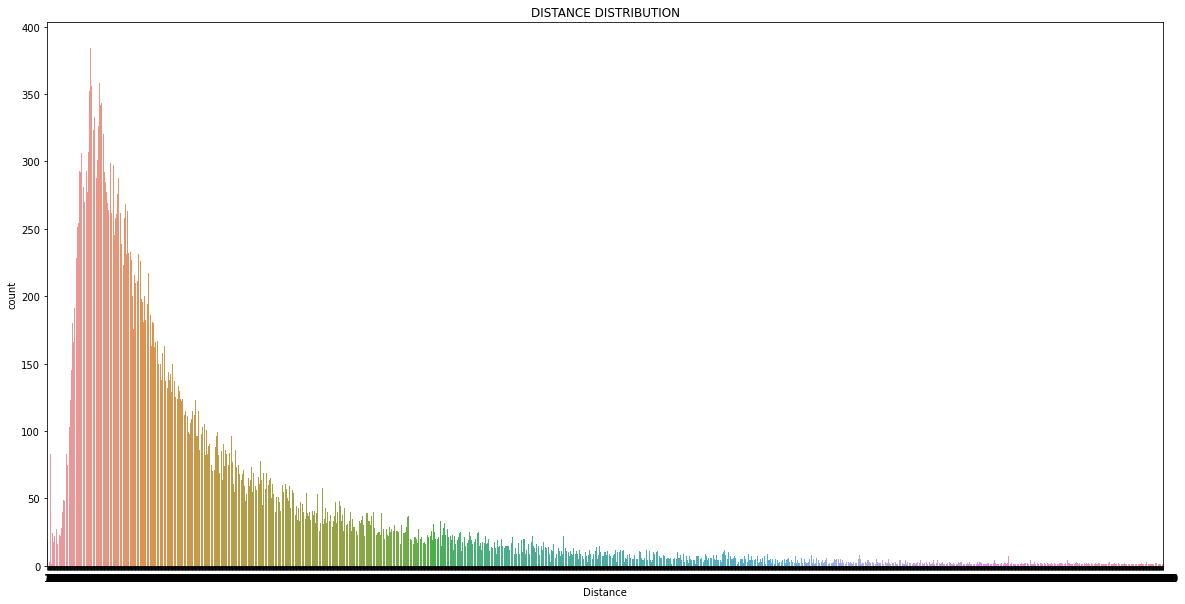

In [ ]:
# Perform the countplot on the distance data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Distance']).set_title("DISTANCE DISTRIBUTION")

distribution of data is skewed towards left 

short distance trips are common

distribution of data is multimodal

In [ ]:
# Perform the countplot on the Pmonth data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Pmonth']).set_title("Pmonth DISTRIBUTION")

Text(0.5, 1.0, 'Pmonth DISTRIBUTION')

more picks are on end of the year

Text(0.5, 1.0, 'Pmin DISTRIBUTION')

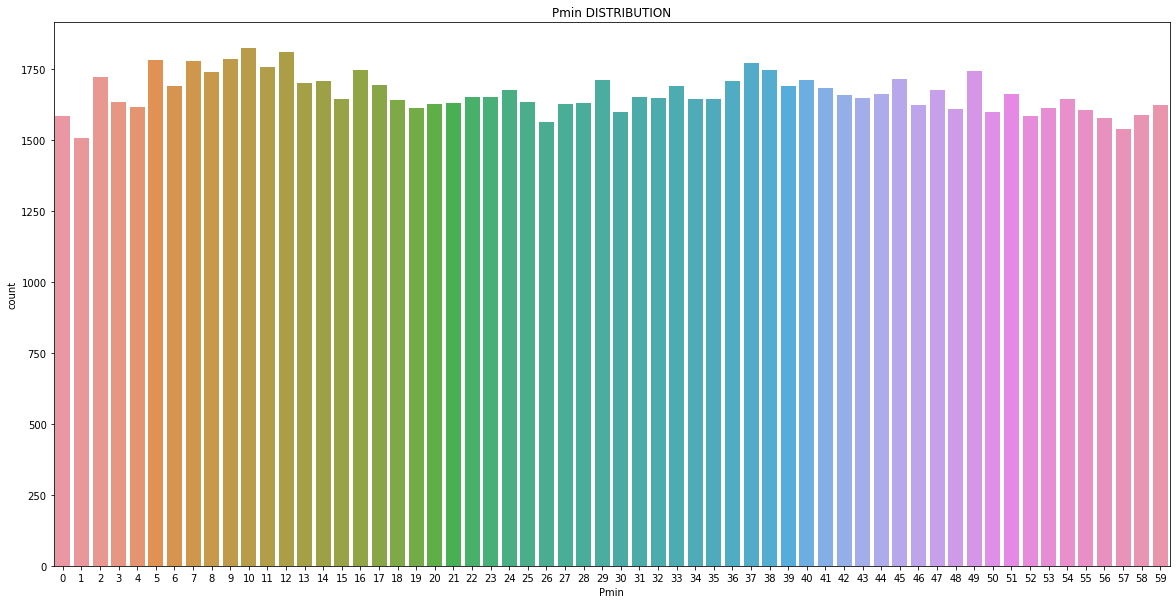

In [ ]:
# Perform the countplot on the pmin data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Pmin']).set_title("Pmin DISTRIBUTION")

data is distributed equally

In [ ]:
# Perform the countplot on the PDweek data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['PDweek']).set_title("PDweek DISTRIBUTION")

Text(0.5, 1.0, 'PDweek DISTRIBUTION')

data is distributed equally

In [ ]:
# Perform the countplot on the Dday data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Dday']).set_title("Dday DISTRIBUTION")

Text(0.5, 1.0, 'Dday DISTRIBUTION')

distribution of data is similar

drop-offs are almost similar on every day of a month

Text(0.5, 1.0, 'DDweek DISTRIBUTION')

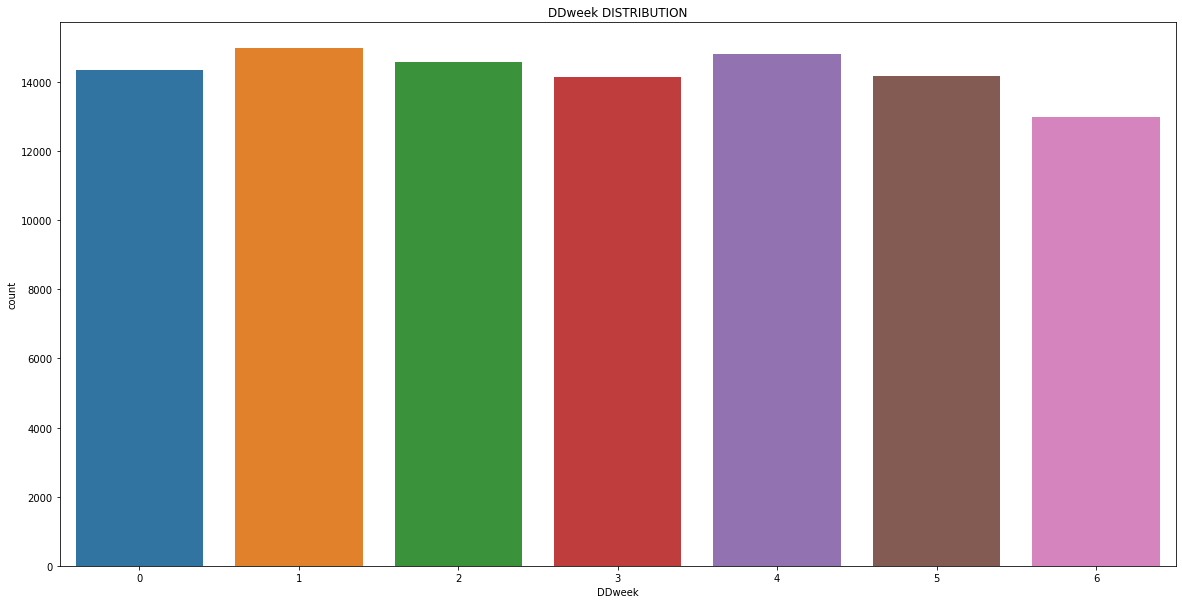

In [ ]:
# Perform the countplot on the DDweek data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['DDweek']).set_title("DDweek DISTRIBUTION")

drop offs on every day of a week are almost similar

Text(0.5, 1.0, 'Temp DISTRIBUTION')

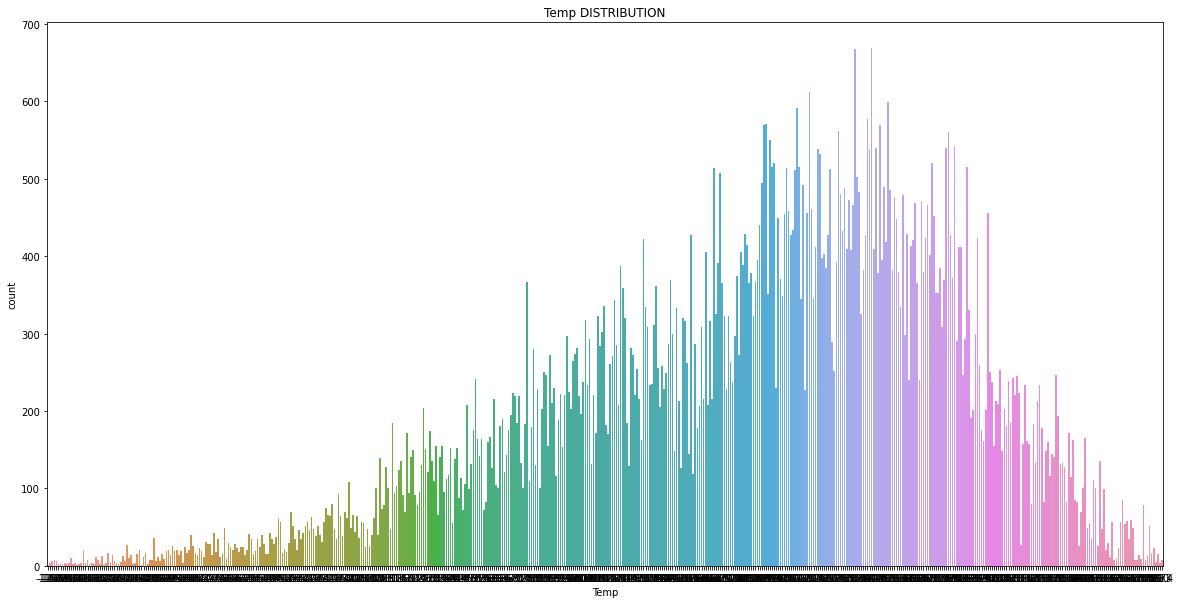

In [ ]:
# Perform the countplot on the Temp data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Temp']).set_title("Temp DISTRIBUTION")

the distribution of data is skewed toward right

trips are avoided in less temperature

Text(0.5, 1.0, 'Precip DISTRIBUTION')

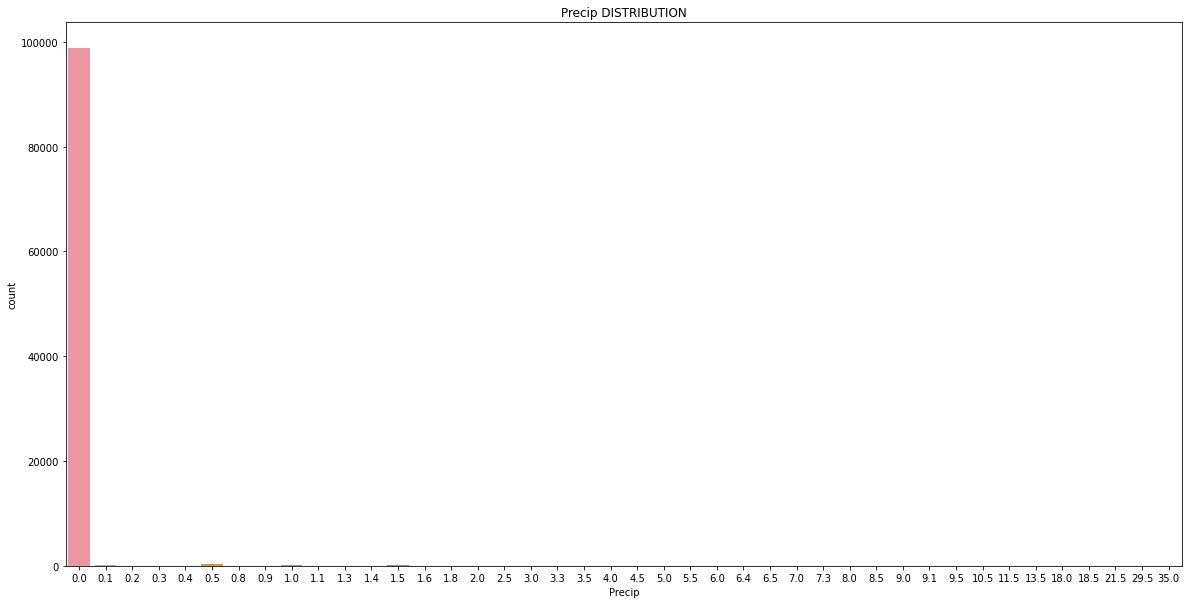

In [ ]:
# Perform the countplot on the Precip data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Precip']).set_title("Precip DISTRIBUTION")

the distribution of data is skewed towards left

no trips are planned during rainy or snowy wheather

Text(0.5, 1.0, 'Wind DISTRIBUTION')

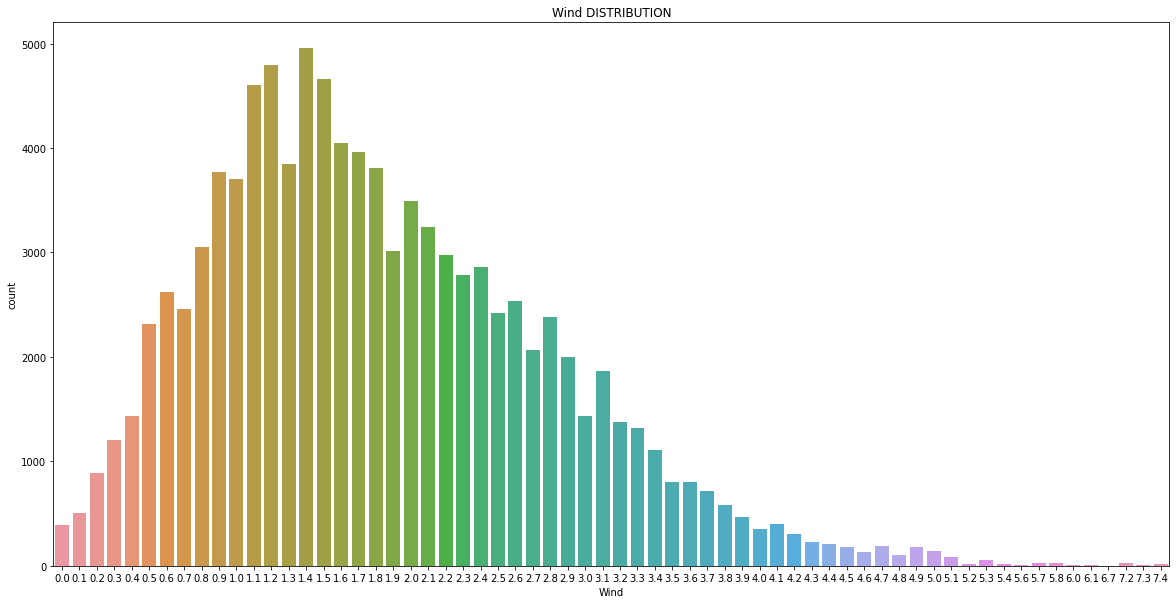

In [ ]:
# Perform the countplot on the wind data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Wind']).set_title("Wind DISTRIBUTION")

the distribution of data is skewed towards left

trips are mostly avoided in windy wheather

Text(0.5, 1.0, 'Humid DISTRIBUTION')

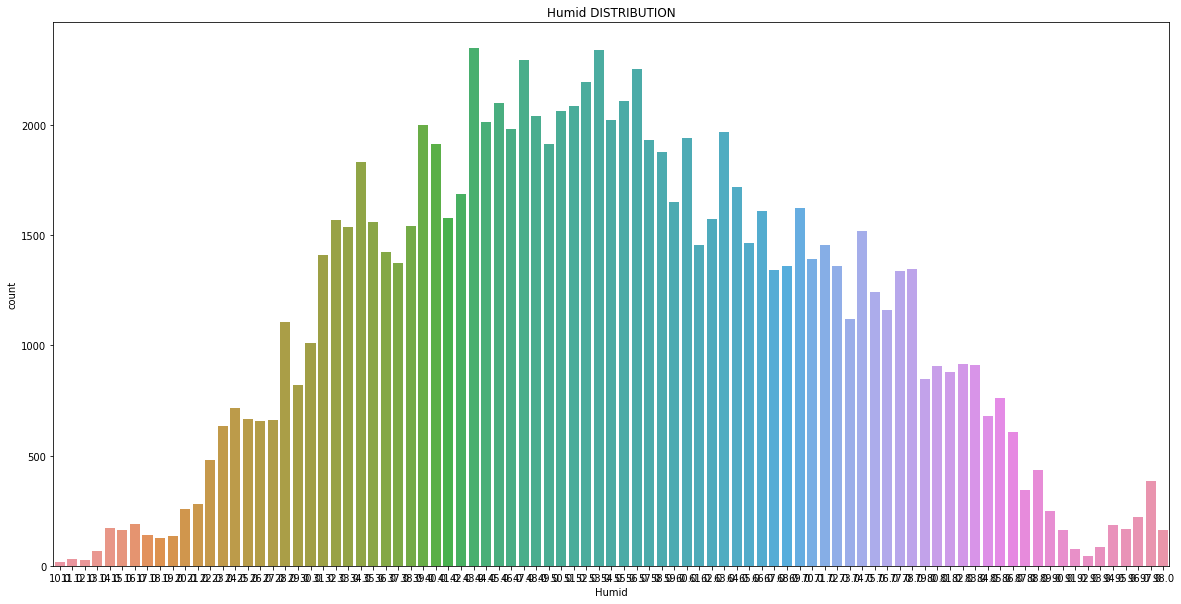

In [ ]:
# Perform the countplot on the himid hour data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Humid']).set_title("Humid DISTRIBUTION")

people mostly avoid to go on trips on less humid or in extra humid wheather

Text(0.5, 1.0, 'Snow DISTRIBUTION')

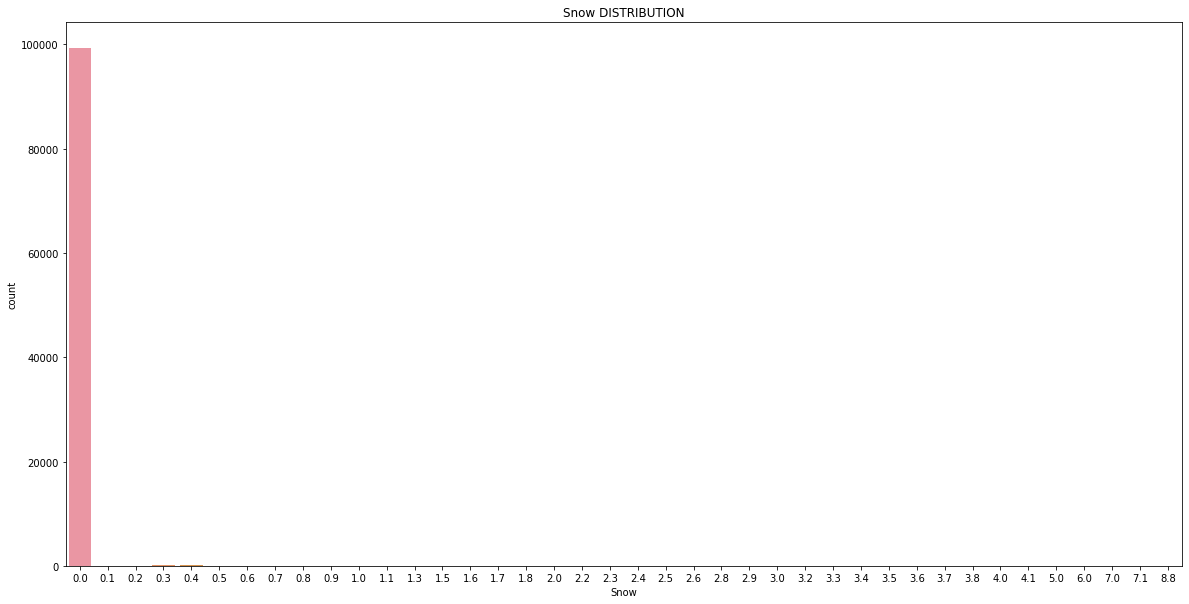

In [ ]:
# Perform the countplot on the snow data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Snow']).set_title("Snow DISTRIBUTION")

the data distribution is skewed towards left side

more trips are during  when there is no snowfall.

Text(0.5, 1.0, 'GroundTemp DISTRIBUTION')

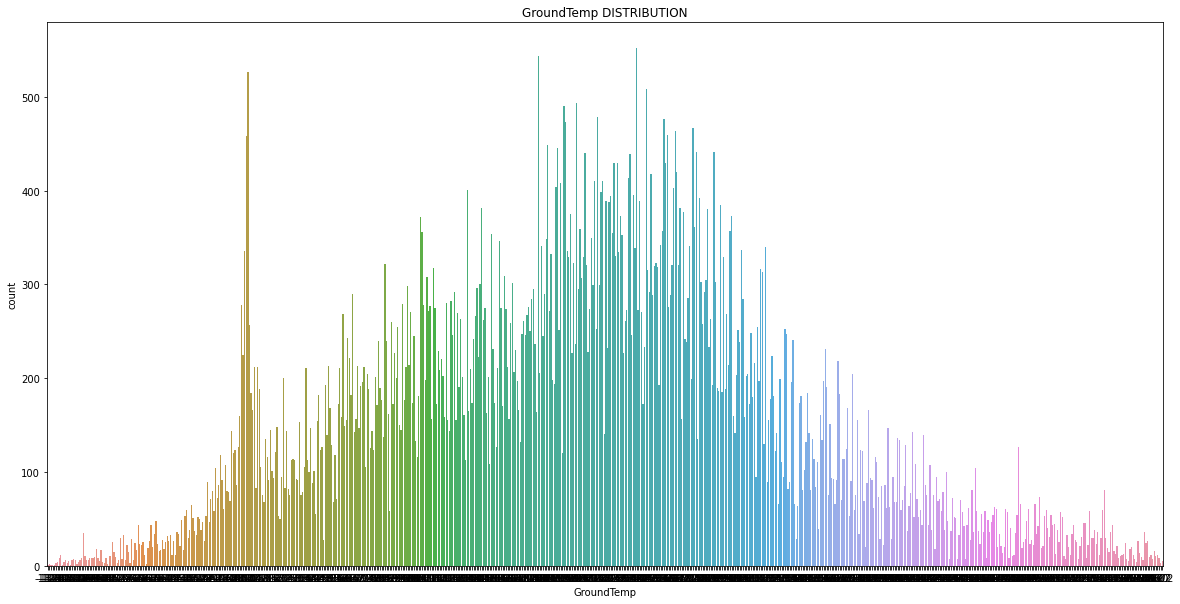

In [ ]:
# Perform the countplot on the GroundTemp data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['GroundTemp']).set_title("GroundTemp DISTRIBUTION")

the distribution of data is multimodel

Text(0.5, 1.0, 'Dust DISTRIBUTION')

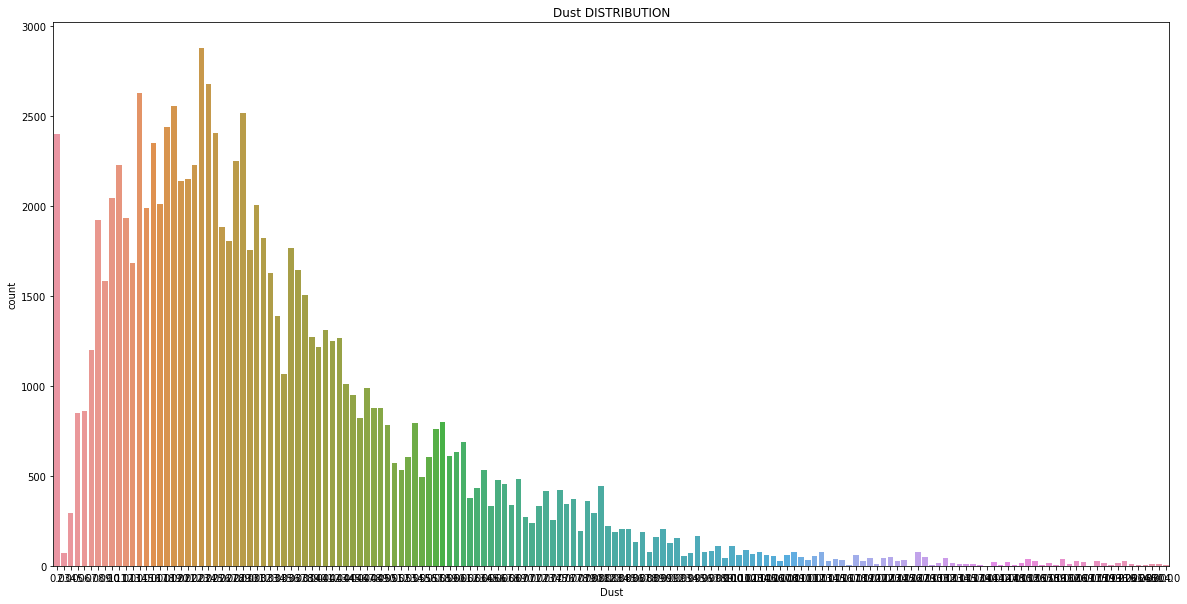

In [ ]:
# Perform the countplot on the dust data
plt.figure(figsize = (20, 10))
sns.countplot(x = df_sample['Dust']).set_title("Dust DISTRIBUTION")

distribution of data is skewed towards left

more trips are done when there is less dust

## DENDOGRAM

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

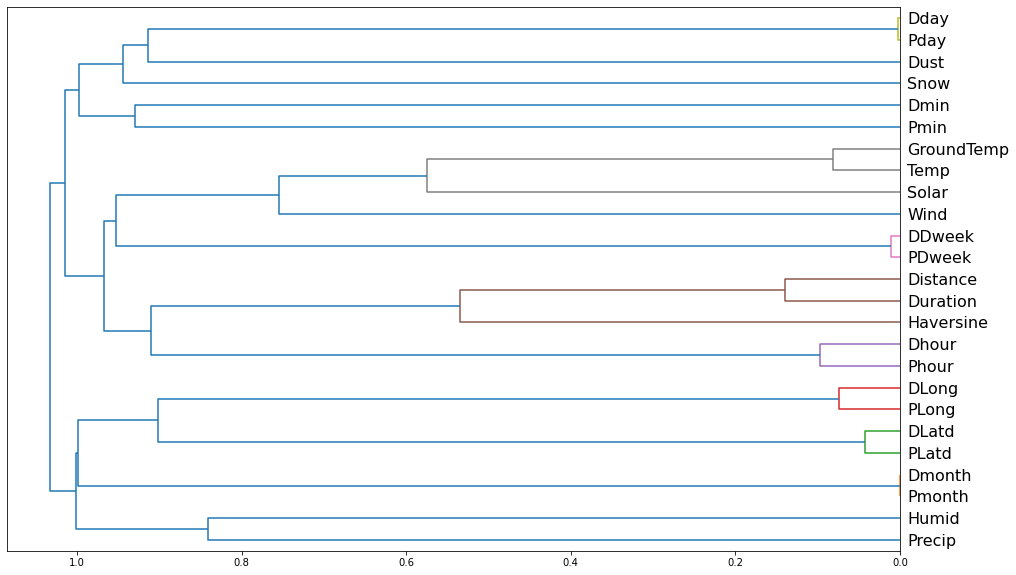

In [ ]:
# Plot a Dendrogram on the columns of the dataset
x = df_sample

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1 - corr)
z = hc.linkage(corr_condensed, method = 'average')
fig = plt.figure(figsize = (16,10))
dendogram = hc.dendrogram(z, labels = X.columns, orientation = 'left', leaf_font_size = 16)
plt.show()


Observation: All connected are compoundly related to each other like latitudes to longitudes, distance to duration and many more.

# Modelling

NOTE:
The dataset has 9.6 million samples.

We have used only 100000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

## prework

In [ ]:
# Splitting data into Labels and target
def proc_df(df, y_fld=None):
    df = df.copy()
    if y_fld is None: 
        y = None
    else:
        y = df[y_fld].values
    res = [df, y]
    return res   

In [ ]:
# Processing the whole dataframe
df, y = proc_df(df_sample, 'Duration')

In [ ]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
 
X = df.drop(['Duration'], axis = 1)
y = y

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
# Check the shape of all the splitted dataset
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((75000, 24), (25000, 24), (75000,), (25000,))

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x, y): 
    return math.sqrt(((x-y)**2).mean())

# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(X_train), Y_train),
           rmse(m.predict(X_test), Y_test),
           m.score(X_train, Y_train),
           m.score(X_test, Y_test),
           median_absolute_error(m.predict(X_train), Y_train),
           median_absolute_error(m.predict(X_test), Y_test),
           metrics.mean_absolute_error(m.predict(X_train), Y_train),
           metrics.mean_absolute_error(m.predict(X_test), Y_test),
           metrics.r2_score(m.predict(X_train), Y_train),
           metrics.r2_score(m.predict(X_test), Y_test)
          ]

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + 
          "\nScore-Test: " + str(res[3]) + "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + 
          "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]) + 
          "\nR2-Train: " + str(res[8]) + "\nR2-Test: " + str(res[9]))

In [ ]:
# Visualize importance of all the features in the dataset for the prediction
def visualize_importance(feature_importances, feat_train_df):
    feature_importance_df = pd.DataFrame()
     # creating dataframe for feature name and feature importance
    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], axis=0, ignore_index=True)
    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
    .sum()[['feature_importance']]\
    .sort_values('feature_importance', ascending=False).index[:50]
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, x='feature_importance', y='column', order=order, ax=ax, 
                  palette='viridis', orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    # return fig, ax
    return fig, ax


## Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

In [ ]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression()

# Fit the model to the data
lModel.fit(X_train, Y_train)

# print score of the model
print_score(lModel)

# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_, X_train)

RMSE-Train: 16.473716385094296
RMSE-Test: 16.204351908039005
Score-Train: 0.567833871186963
Score-Test: 0.578418962861383
MedAE-Train: 6.856575587865272
MedAE-Test: 6.824050038595743
MeanAE-Train: 10.073015807662816
MeanAE-Test: 10.010842481342928
R2-Train: 0.2389215389535415
R2-Test: 0.23715710728323747
Wall time: 796 ms


## Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 4.918717616479591
RMSE-Test: 12.988664588478677
Score-Train: 0.9614724549322149
Score-Test: 0.7291388365308833
MedAE-Train: 1.3299999999999983
MedAE-Test: 3.66
MeanAE-Train: 2.7960297333333335
MeanAE-Test: 7.499914400000001
R2-Train: 0.9537685387563639
R2-Test: 0.6244923268083225
Wall time: 2min 19s


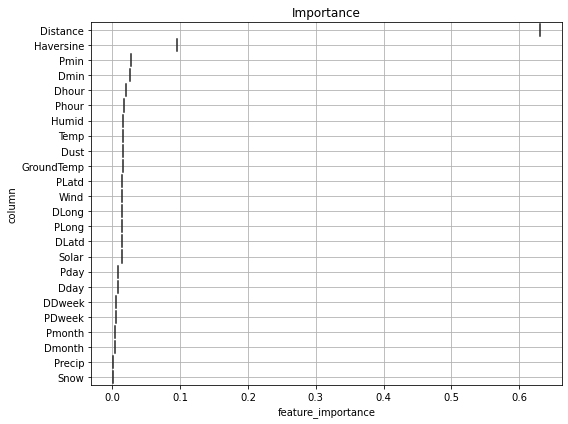

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor()

# Fit the model to the data
rf.fit(X_train, Y_train)

# print score of the model
print_score(rf)

# visualizing the importance of features.
fig, ax = visualize_importance(rf.feature_importances_, X_train)

## Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error. it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 12.56569561259724
RMSE-Test: 12.708780891377248
Score-Train: 0.7485563763377527
Score-Test: 0.7406862652754143
MedAE-Train: 3.7933676282440985
MedAE-Test: 3.859636318642294
MeanAE-Train: 7.373782017727065
MeanAE-Test: 7.466109388825655
R2-Train: 0.6454778743023514
R2-Test: 0.634804900645756
Wall time: 20.3 s


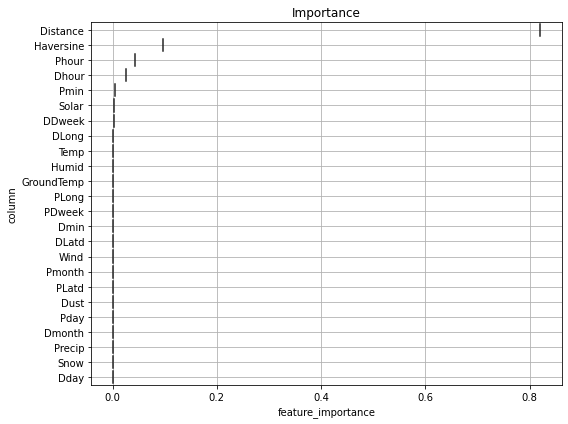

In [ ]:
%%time

# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()

# Fit the model to the data
GBR.fit(X_train, Y_train)

# print score of the model
print_score(GBR)

# visualizing the importance of features.
fig, ax = visualize_importance(GBR.feature_importances_, X_train)

## AdaBoostRegressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.

RMSE-Train: 18.40238935692241
RMSE-Test: 18.356919631428475
Score-Train: 0.46071792302935755
Score-Test: 0.458974981296138
MedAE-Train: 13.264931233046212
MedAE-Test: 13.661550971919151
MeanAE-Train: 15.462163918159263
MeanAE-Test: 15.465721684647361
R2-Train: -0.12280197836773121
R2-Test: -0.11857673982116324
Wall time: 4.38 s


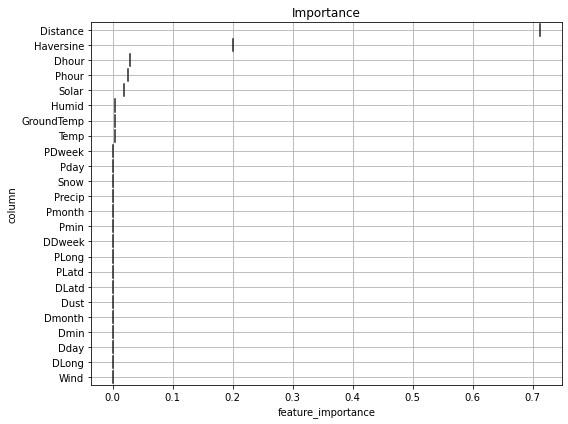

In [ ]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
adaboost = AdaBoostRegressor()

# Fit the model to the data
adaboost.fit(X_train, Y_train)

# print score of the model
print_score(adaboost)

# visualizing the importance of features.
fig, ax = visualize_importance(adaboost.feature_importances_, X_train)

## XGB Regressor

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [ ]:
!pip install xgboost

RMSE-Train: 5.251589408689545
RMSE-Test: 6.980711339196207
Score-Train: 0.9560813397050629
Score-Test: 0.9217621161657326
MedAE-Train: 1.8233375549316406
MedAE-Test: 2.0186195373535156
MeanAE-Train: 3.069491936595788
MeanAE-Test: 3.7896209375829994
R2-Train: 0.951841925851674
R2-Test: 0.9115528059745481
Wall time: 3.24 s


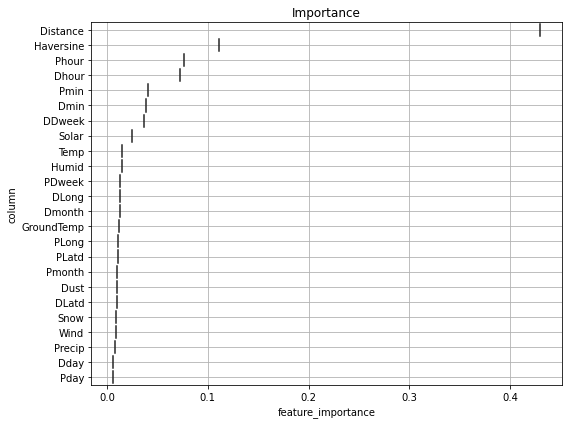

In [ ]:
%%time
# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()

# Fit the model to the data
xgbr.fit(X_train, Y_train)

# print score of the model
print_score(xgbr)

# visualizing the importance of features.
fig, ax = visualize_importance(xgbr.feature_importances_, X_train)

# Comparing all the model based on metric

In [ ]:
# Helper function for comparing models metrics
def compare_models(model,name,X_train,y_train,X_test,y_test):
  # the libraries we need
  import sklearn.metrics as metrics
  from sklearn.model_selection import train_test_split

  # now, create a list with the objects 
  data = {'Metric':['rmse','MedAE','MAE','R-squared']}
  df_train = pd.DataFrame(data)
  df_test = pd.DataFrame(data)

  def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
  #for (model,name) in zip(models,names):
  for i in range(1):
    y_pred= model.predict(X_test) # then predict on the test set
    res = [rmse(model.predict(X_train), y_train),
           rmse(model.predict(X_test), y_test),
           metrics.median_absolute_error(model.predict(X_train), y_train),
           metrics.median_absolute_error(model.predict(X_test), y_test),
           metrics.mean_absolute_error(model.predict(X_train), y_train),
           metrics.mean_absolute_error(model.predict(X_test), y_test),
           metrics.r2_score(model.predict(X_train), y_train),
           metrics.r2_score(model.predict(X_test), y_test)
           ]
    # get metrics of each model, and add to dataframe 
  df_train[name] = [res[0], res[2], res[4], res[6]]
  df_test[name] = [res[1], res[3], res[5], res[7]]
  return df_train,df_test   

In [ ]:
# list of models object
models = [lModel, rf, xgbr, adaboost]

# list of models name
names = ['LinearReg', 'RF', 'Xboost', 'AdaBoost']

# use function for comparing models by passing list of models object, names, train and test data
for i in range(4):
    comp_model_train, comp_model_test = compare_models(models[i], names[i], X_train, Y_train, X_test, Y_test)
    print("Results on Train data")
    print(comp_model_train)
    print()
    print("Results on Test data")
    print(comp_model_test)
    print()

Results on Train data
      Metric  LinearReg
0       rmse  16.473716
1      MedAE   6.856576
2        MAE  10.073016
3  R-squared   0.238922

Results on Test data
      Metric  LinearReg
0       rmse  16.204352
1      MedAE   6.824050
2        MAE  10.010842
3  R-squared   0.237157

Results on Train data
      Metric        RF
0       rmse  4.918718
1      MedAE  1.330000
2        MAE  2.796030
3  R-squared  0.953769

Results on Test data
      Metric         RF
0       rmse  12.988665
1      MedAE   3.660000
2        MAE   7.499914
3  R-squared   0.624492

Results on Train data
      Metric    Xboost
0       rmse  5.251589
1      MedAE  1.823338
2        MAE  3.069492
3  R-squared  0.951842

Results on Test data
      Metric    Xboost
0       rmse  6.980711
1      MedAE  2.018620
2        MAE  3.789621
3  R-squared  0.911553

Results on Train data
      Metric   AdaBoost
0       rmse  18.402389
1      MedAE  13.264931
2        MAE  15.462164
3  R-squared  -0.122802

Results on Test d

# Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

## RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X[:5000],y[:5000],test_size=0.25,random_state=123)

In [ ]:
X_train.shape, X_test.shape

((3750, 24), (1250, 24))

In [ ]:
# Use the random grid to search for best hyperparameters
def random_search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
  random.fit(X_train, Y_train)
  print("\n Best parameters: ",random.best_params_)

In [ ]:
%%time
# create parameters dict in list for tunning
rf_param_grid = {
    # Number of trees in random forest
    "n_estimators" : [int(x) for x in np.linspace(start = 300, stop = 500, num = 10)],
    # Number of features to consider at every split
    "max_features" : ['auto', 'sqrt'],
    # Maximum number of levels in tree
    "max_depth" : [int(x) for x in np.linspace(10, 110, num = 11)],
    # Minimum number of samples required to split a node
    "min_samples_split" : [2, 5],
    # Minimum number of samples required at each leaf node
    "min_samples_leaf" : [1, 2],
    # Method of selecting samples for training each tree
    "bootstrap" : [True, False]
}

# passing data for hyper parameter tunning with RandomSearchCV
random_search(RandomForestRegressor(), X_train, Y_train, param_grid = rf_param_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits

 Best parameters:  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}
Wall time: 5min 48s


In [ ]:
%%time
# create parameters dict in list for tunning
ada_param_grid = {
    "n_estimators" : [10, 50, 100],
    "learning_rate" : [ 0.0001, 0.001, 0.01 ]
}

# passing data for hyper parameter tunning with RandomSearchCV
random_search(AdaBoostRegressor(), X_train, Y_train, param_grid = ada_param_grid)

Fitting 3 folds for each of 9 candidates, totalling 27 fits

 Best parameters:  {'n_estimators': 100, 'learning_rate': 0.01}
Wall time: 3.06 s


In [ ]:
%%time
# create parameters dict in list for tunning
XGB_param_grid = {
    'learning_rate' : [0.05, 0.1, 0.15],
    'max_depth' : [3, 4, 5],
    'min_child_weight' : [1, 3],
    'gamma' : [0.0, 0.1],
    'colsample_bytree' : [0.3, 0.4]
}
# passing data for hyper parameter tunning with RandomSearchCV
random_search(XGBRegressor(), X_train, Y_train, param_grid = XGB_param_grid)

Fitting 3 folds for each of 72 candidates, totalling 216 fits

 Best parameters:  {'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.4}
Wall time: 6.85 s


# Using best hyperparameters

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=123)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((75000, 24), (25000, 24), (75000,), (25000,))

## RandomForest Model

RMSE-Train: 6.4658383744447745
RMSE-Test: 12.909879587019732
Score-Train: 0.9334240694960312
Score-Test: 0.7324147817815665
MedAE-Train: 1.5387871212121116
MedAE-Test: 3.546732900432901
MeanAE-Train: 3.3945846360185494
MeanAE-Test: 7.36483719162305
R2-Train: 0.9161760960374362
R2-Test: 0.6255912706872195
Wall time: 8min 36s


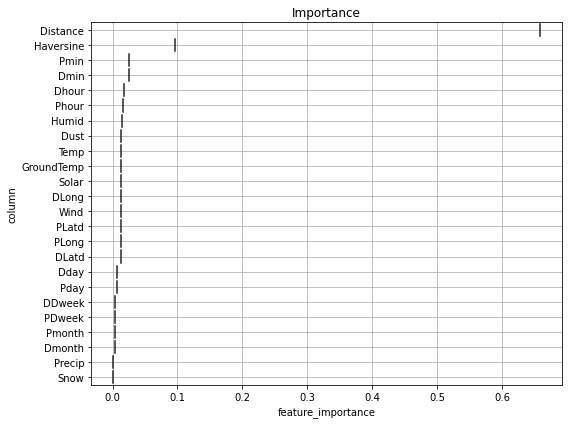

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor( **{  'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 
                               'max_features': 'auto', 'max_depth': 80, 'bootstrap': True } )

# Fit the model to the data
rf.fit(X_train, Y_train)

# print score of the model
print_score(rf)

# visualizing the importance of features.
fig, ax = visualize_importance(rf.feature_importances_, X_train)

## Adaboost Regressor

RMSE-Train: 15.131869559427248
RMSE-Test: 15.111088985771215
Score-Train: 0.635369717363911
Score-Test: 0.633385817435064
MedAE-Train: 5.688590033048657
MedAE-Test: 5.688590033048657
MeanAE-Train: 9.554810421643747
MeanAE-Test: 9.57728870753619
R2-Train: 0.4056978621117747
R2-Test: 0.4085790396080694
Wall time: 34.1 s


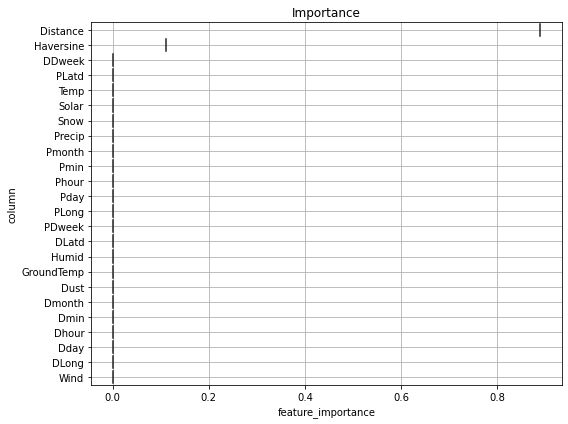

In [ ]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
adaboost = AdaBoostRegressor(**{  'n_estimators': 100, 'learning_rate': 0.01 })

# Fit the model to the data
adaboost.fit(X_train, Y_train)

# print score of the model
print_score(adaboost)

# visualizing the importance of features.
fig, ax = visualize_importance(adaboost.feature_importances_, X_train)

## XGBoost Regressor

[10:07:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsamplebytree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE-Train: 8.656984115968761
RMSE-Test: 9.255410750482671
Score-Train: 0.8806559428998957
Score-Test: 0.8624662988996321
MedAE-Train: 2.828565835952759
MedAE-Test: 2.9482316970825195
MeanAE-Train: 5.125266313040207
MeanAE-Test: 5.429401455509961
R2-Train: 0.8518402566263406
R2-Test: 0.8275008624356389
Wall time: 2.39 s


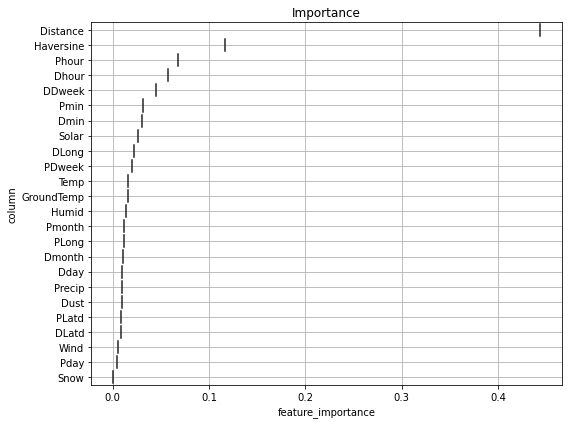

In [ ]:
%%time
# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor(**{ 'min_child_weight':1, 'max_depth':5, 'learning_rate':0.15, 'gamma':0.0, 'colsamplebytree':0.4})

# Fit the model to the data
xgbr.fit(X_train, Y_train)

# print score of the model
print_score(xgbr)

# visualizing the importance of features.
fig, ax = visualize_importance(xgbr.feature_importances_, X_train)

## Comparison of model on train and test

In [ ]:
# list of models object
models = [lModel, rf, xgbr, adaboost]

# list of models name
names = ['LinearReg', 'RF', 'Xboost', 'AdaBoost']

# use function for comparing models by passing list of models object, names, train and test data
for i in range(4):
    comp_model_train, comp_model_test = compare_models(models[i], names[i], X_train, Y_train, X_test, Y_test)
    print("Results on Train data")
    print(comp_model_train)
    print()
    print("Results on Test data")
    print(comp_model_test)
    print()

Results on Train data
      Metric  LinearReg
0       rmse  16.473716
1      MedAE   6.856576
2        MAE  10.073016
3  R-squared   0.238922

Results on Test data
      Metric  LinearReg
0       rmse  16.204352
1      MedAE   6.824050
2        MAE  10.010842
3  R-squared   0.237157

Results on Train data
      Metric        RF
0       rmse  6.465838
1      MedAE  1.538787
2        MAE  3.394585
3  R-squared  0.916176

Results on Test data
      Metric         RF
0       rmse  12.909880
1      MedAE   3.546733
2        MAE   7.364837
3  R-squared   0.625591

Results on Train data
      Metric    Xboost
0       rmse  8.656984
1      MedAE  2.828566
2        MAE  5.125266
3  R-squared  0.851840

Results on Test data
      Metric    Xboost
0       rmse  9.255411
1      MedAE  2.948232
2        MAE  5.429401
3  R-squared  0.827501

Results on Train data
      Metric   AdaBoost
0       rmse  15.131870
1      MedAE   5.688590
2        MAE   9.554810
3  R-squared   0.405698

Results on Test d

# CONCLUSION

In this project I have done an extensive Exploratory Data Analysis, visualized the data with amazing plots, build different models, visualized feature importance, did hyper parameter tunning of each model. Finally I found out that, from all the columns in the data Distance is the most important feature of them all and after Hyperparameter Tuning Adaboost Regressor performed much better when compared to remaining models.
